In [1]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.preprocessing import StandardScaler
from __future__ import division
from sklearn.decomposition import PCA
import custom_function as cf
from saxpy import SAX
from sklearn.metrics import confusion_matrix
from statsmodels.robust import mad
import pywt
from wavelet import waveletDenoising
# coding=utf-8
from time import sleep
import os
import numpy as np
import useful_functions as uf

def parser(x):
    return pd.datetime.strptime('2015'+x, '%Y%d/%m/%H %M')

data = read_csv('./BATADAL_dataset03.csv', header=0, parse_dates=[0] ,squeeze=True,\
                  date_parser=parser)
data.drop(['ATT_FLAG'],axis=1)

data2 = read_csv('./BATADAL_dataset04.csv', header=0, parse_dates=[0] ,squeeze=True,\
                  date_parser=parser)
data3 = read_csv('./BATADAL_test_dataset.csv', header=0, parse_dates=[0], index_col=0, squeeze=True,\
                  date_parser=parser)

series = data.copy()

/usr/local/lib/python2.7/dist-packages/pyemma/__init__.py:134: UserWarning: Python 2.7 usage is deprecated. Future versions of PyEMMA will not support it. Please upgrade your Python installation.
  "Please upgrade your Python installation.", category=UserWarning)


# Discrite model MarkovChain

In [40]:
def evaluation(label,prediction_test):
    cm=confusion_matrix(label.astype(int),prediction_test)

    false_positive = cm[1][1]/(cm[0][1]+cm[1][1])
    recall = cm[1][1]/(cm[1][1]+cm[1][0])
    print cm,false_positive,recall
    return false_positive
def SAX_discritization(signal,n_seq):
    level=np.zeros(len(signal))

    s = SAX(3, 3, 1e-6)
    (x3Strings, x3Indices) = s.sliding_window(signal, n_seq, 0.2)

    sax_data=pd.DataFrame(x3Indices,x3Strings )
    str_set=set(x3Strings)
  #  print str_set
    for i,item in enumerate(str_set):
        start=np.array(sax_data.loc[item][0])
        end=np.array(sax_data.loc[item][1])
        start=start.flatten()
        end=end.flatten()

        for j in range(len(start)):
            level[range(start[j],end[j])]=i
    level=np.array(level).astype(np.int32)
   # level.astype(np.int32)
  #  print level
    #data_['prediction']=level
    return level
def evaluation(label,prediction_test):
    cm=confusion_matrix(label.astype(int),prediction_test)

    precision = cm[1][1]/(cm[0][1]+cm[1][1])
    recall = cm[1][1]/(cm[1][1]+cm[1][0])
    print cm
    print 'precision: '+ str(precision)
    print 'recall: ' + str(recall)
    return precision

# optimization

In [41]:
data2 = read_csv('./BATADAL_dataset04.csv', header=0, parse_dates=[0] ,squeeze=True,\
                  date_parser=parser)
label2=np.array(data2['ATT_FLAG'])

index=np.where(label2==-999)
label2[index[0]]=0
len(data2)

4177

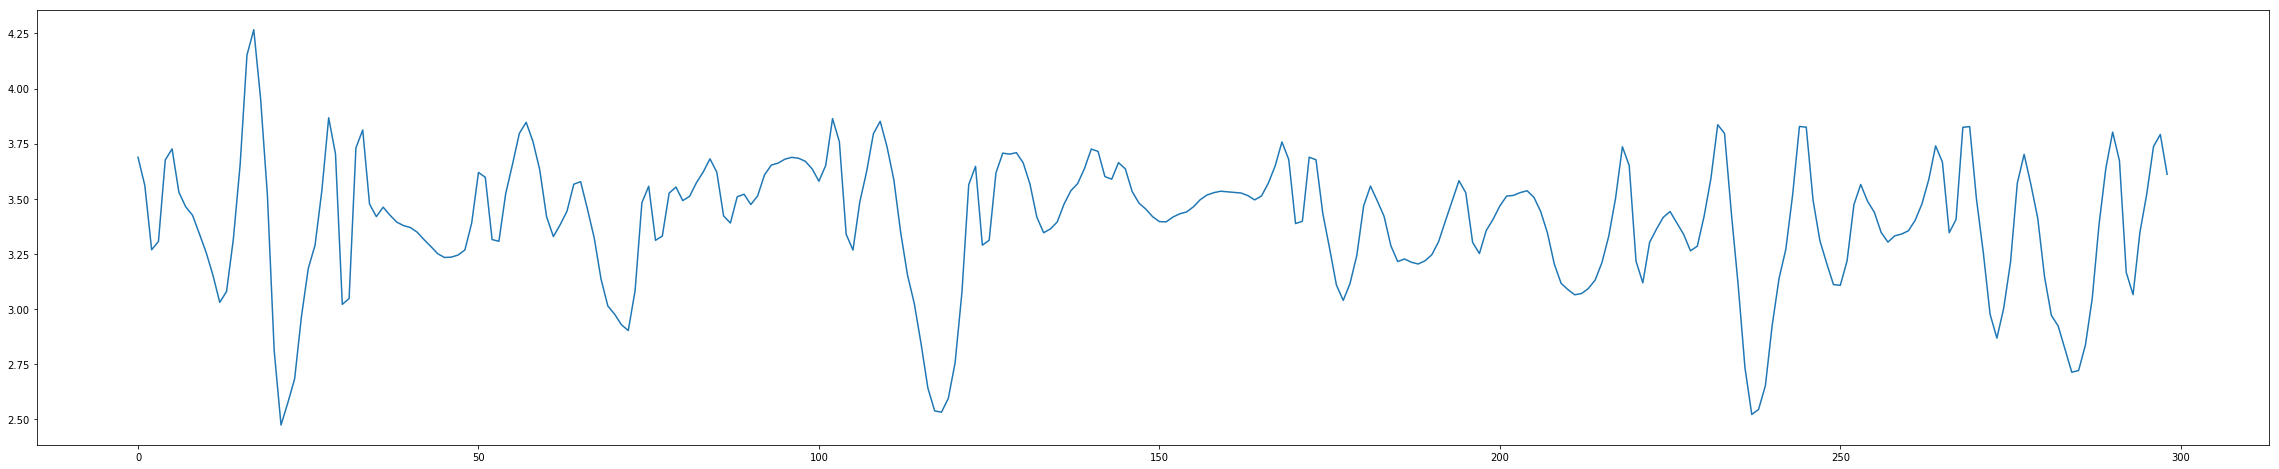

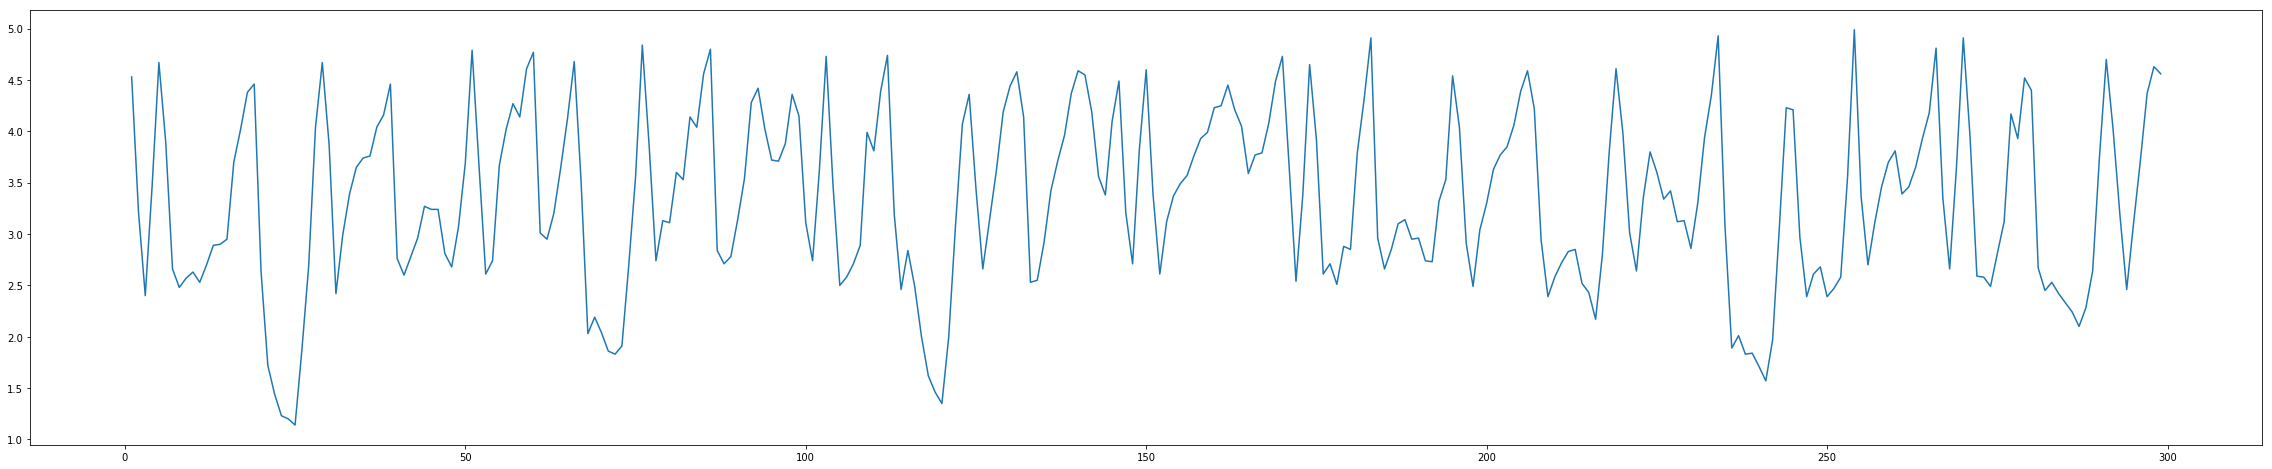

In [42]:
signal=data2['L_T7']
#signal = np.array(signal.flatten())
denoise_signal=waveletDenoising(signal)

plt.figure(figsize=(40,8))
plt.plot(denoise_signal[1:300])
plt.figure(2)
plt.figure(figsize=(40,8))
plt.plot(signal[1:300])


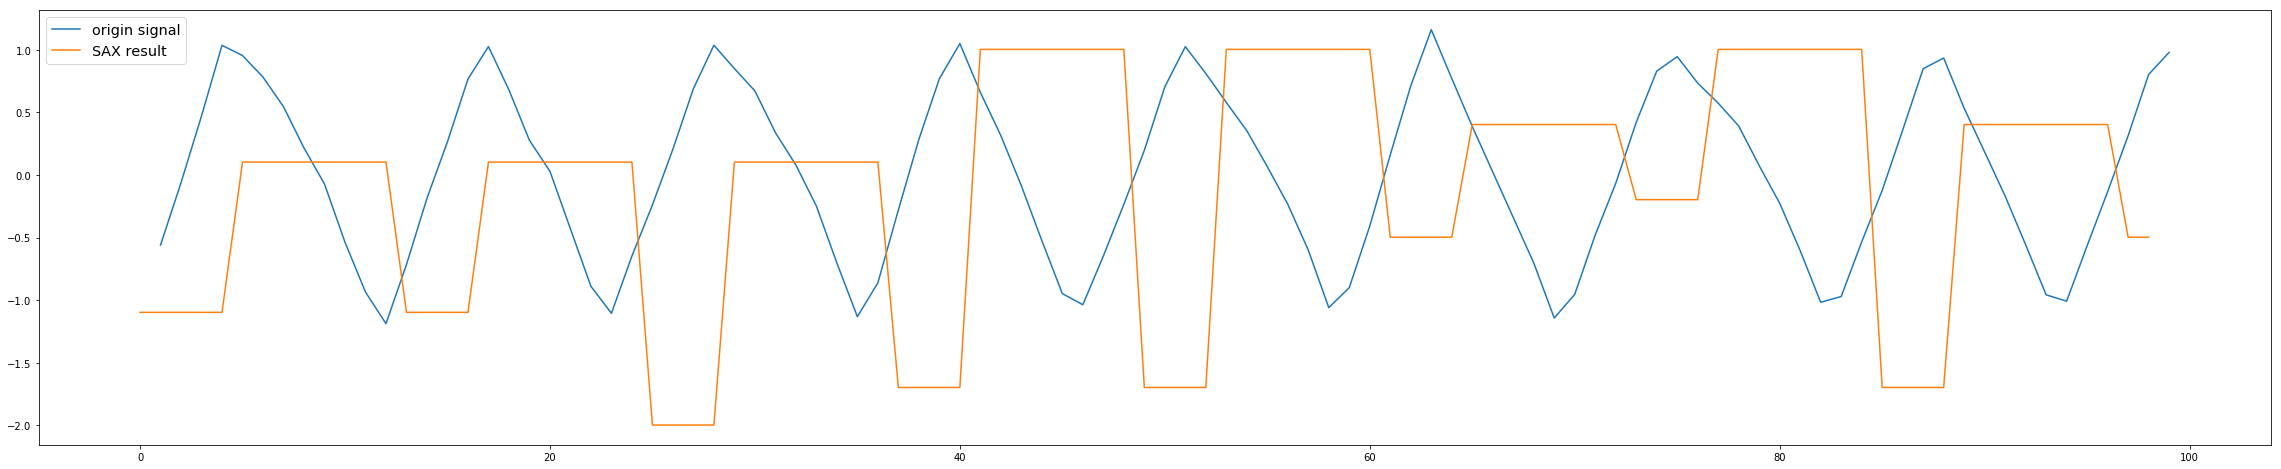

In [5]:
signal=data['L_T3']
d_signal=SAX_discritization(signal,1000)
plt.figure(figsize=(40,8))
plt.plot((signal-signal.mean())[1:100])
plt.plot((d_signal-d_signal.mean())[1:100]*0.3)

plt.legend(['origin signal','SAX result'],fontsize='x-large')
plt.savefig('SAX.png')

In [43]:
np.set_printoptions(threshold=np.nan)

DIM = 100
WINDOWSIZE = 60

def mkv(signal, DIM, WINDOWSIZE):
    a=[]
    prediction=np.zeros(len(signal))
    increments=uf.get_increments(signal)
    TM = uf.get_transition_matrix(DIM, increments) 
    middle = int(TM.shape[1]/2)
    uf.satisfy_condition(TM, DIM)

    THRESHOLD = uf.minimum_likelihood(increments, TM, WINDOWSIZE)

    length = len(increments)
    if length > 1:
        i = 0
        while i < length-(WINDOWSIZE+1):      
            j = 0
            likeli = 1
            while j < WINDOWSIZE:
                likeli *= TM[increments[i+(j-1)]+middle][increments[i+(j-1)+1]+middle]
                j += 1
            if likeli < THRESHOLD*2:
               # a.append(i+2)
                prediction[i+2:i+(j-1)+2]=1
            i += 1
            
    return prediction


def dis_eva(signal,label2,n_seq,WINDOWSIZE):
    d_signal=SAX_discritization(signal,n_seq)

    pre1=mkv(d_signal, DIM,WINDOWSIZE)
    FP=evaluation(label2,pre1)
    print FP
    if (FP>=0.4):
        plt.figure(figsize=(40,8))
        plt.plot(label2)
        plt.plot(pre1)
    return FP,pre1

The transition matrix is formed correctly.
[[3936   22]
 [ 161   58]]
precision: 0.725
recall: 0.2648401826484018
0.725
L_T1
The transition matrix is formed correctly.
[[3918   40]
 [ 219    0]]
precision: 0.0
recall: 0.0
0.0
The transition matrix is formed correctly.
[[3838  120]
 [ 219    0]]
precision: 0.0
recall: 0.0
0.0
The transition matrix is formed correctly.
[[3878   80]
 [ 219    0]]
precision: 0.0
recall: 0.0
0.0
The transition matrix is formed correctly.
[[3880   78]
 [ 219    0]]
precision: 0.0
recall: 0.0
0.0
The transition matrix is formed correctly.
[[3948   10]
 [ 187   32]]
precision: 0.7619047619047619
recall: 0.1461187214611872
0.7619047619047619
L_T6
The transition matrix is formed correctly.
[[3918   40]
 [ 219    0]]
precision: 0.0
recall: 0.0
0.0
The transition matrix is formed correctly.
[[3841  117]
 [ 219    0]]
precision: 0.0
recall: 0.0
0.0
The transition matrix is formed correctly.
[[   4 3954]
 [   0  219]]
precision: 0.052480230050323505
recall: 1.0
0.05

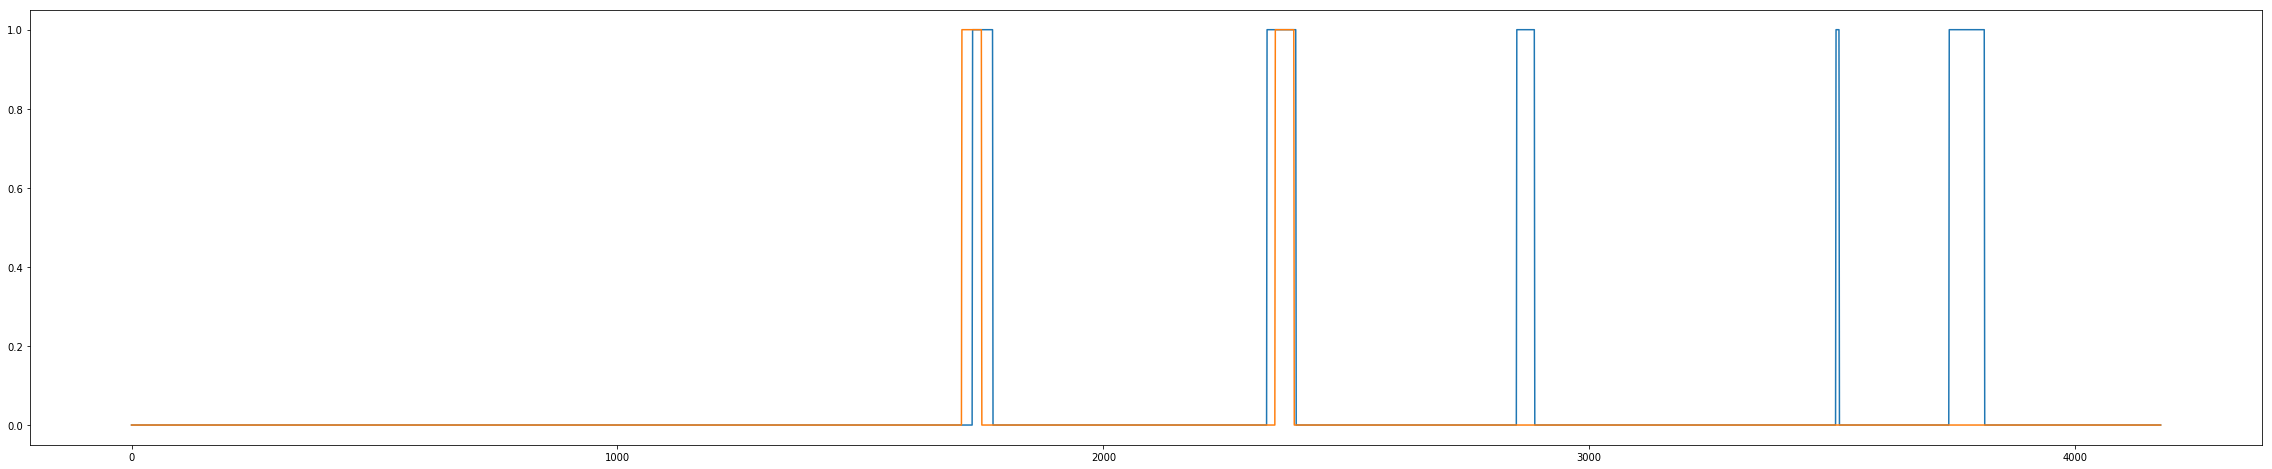

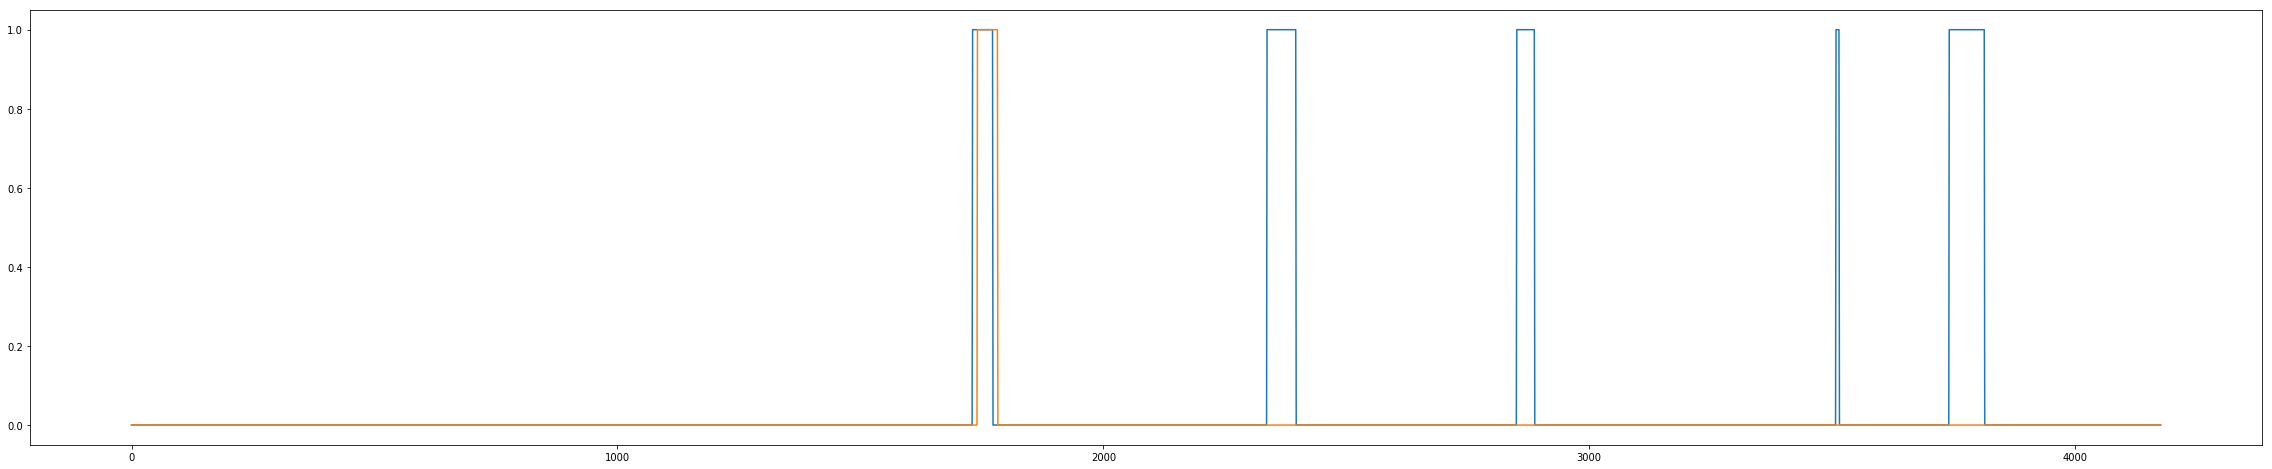

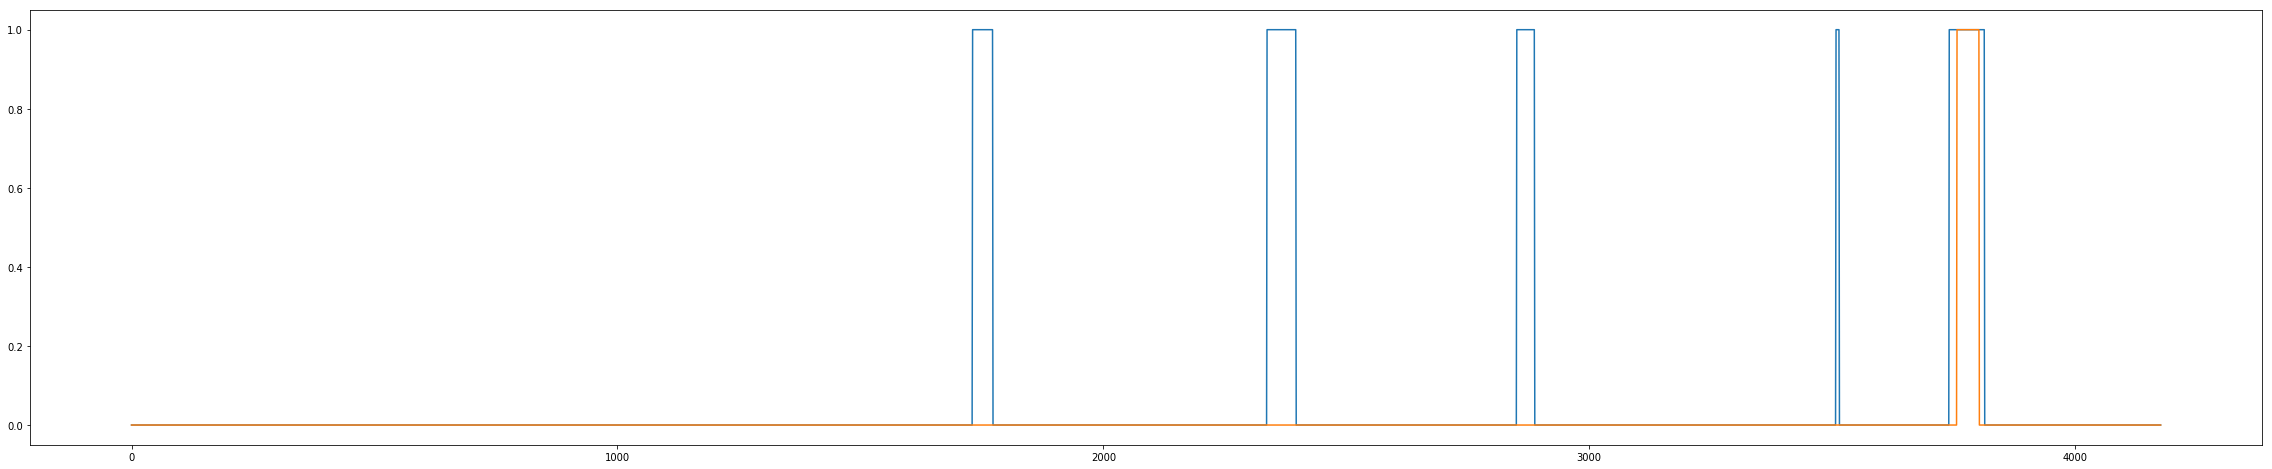

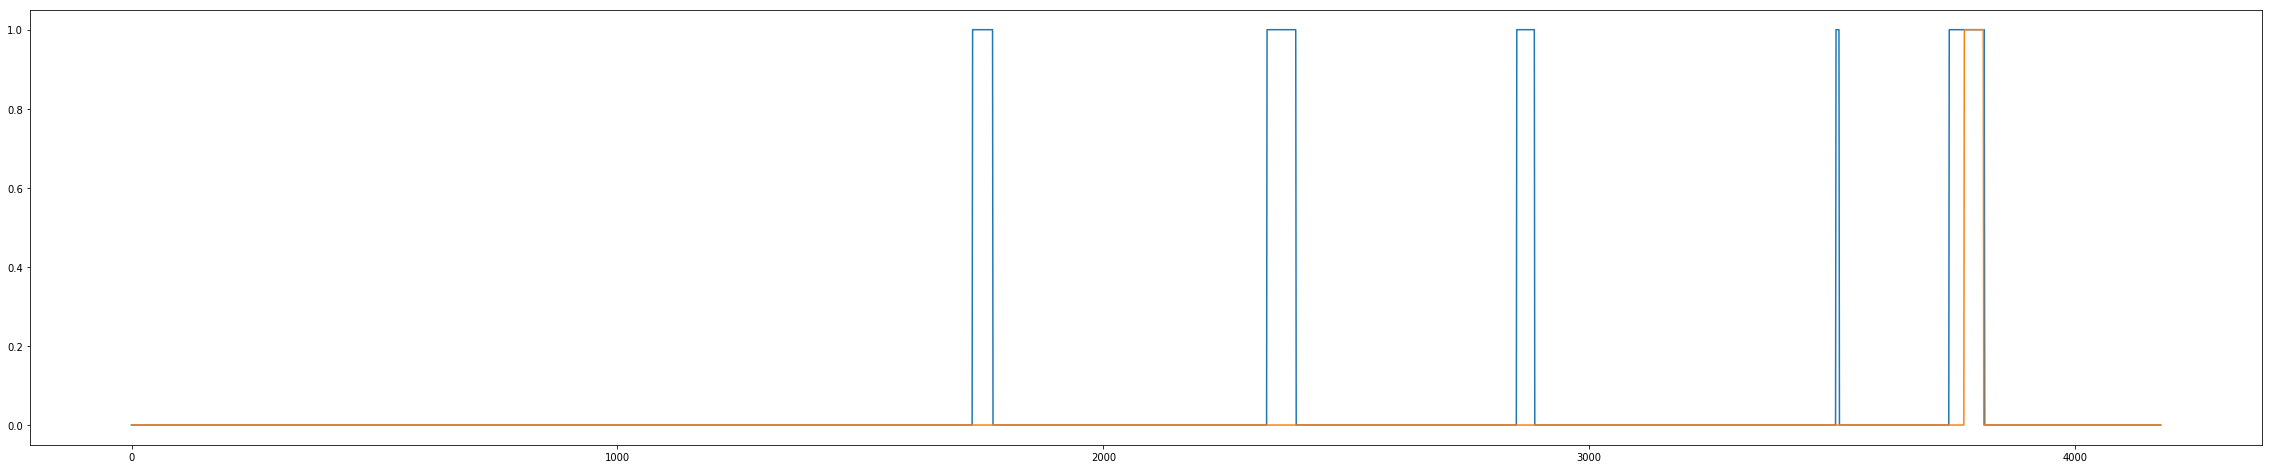

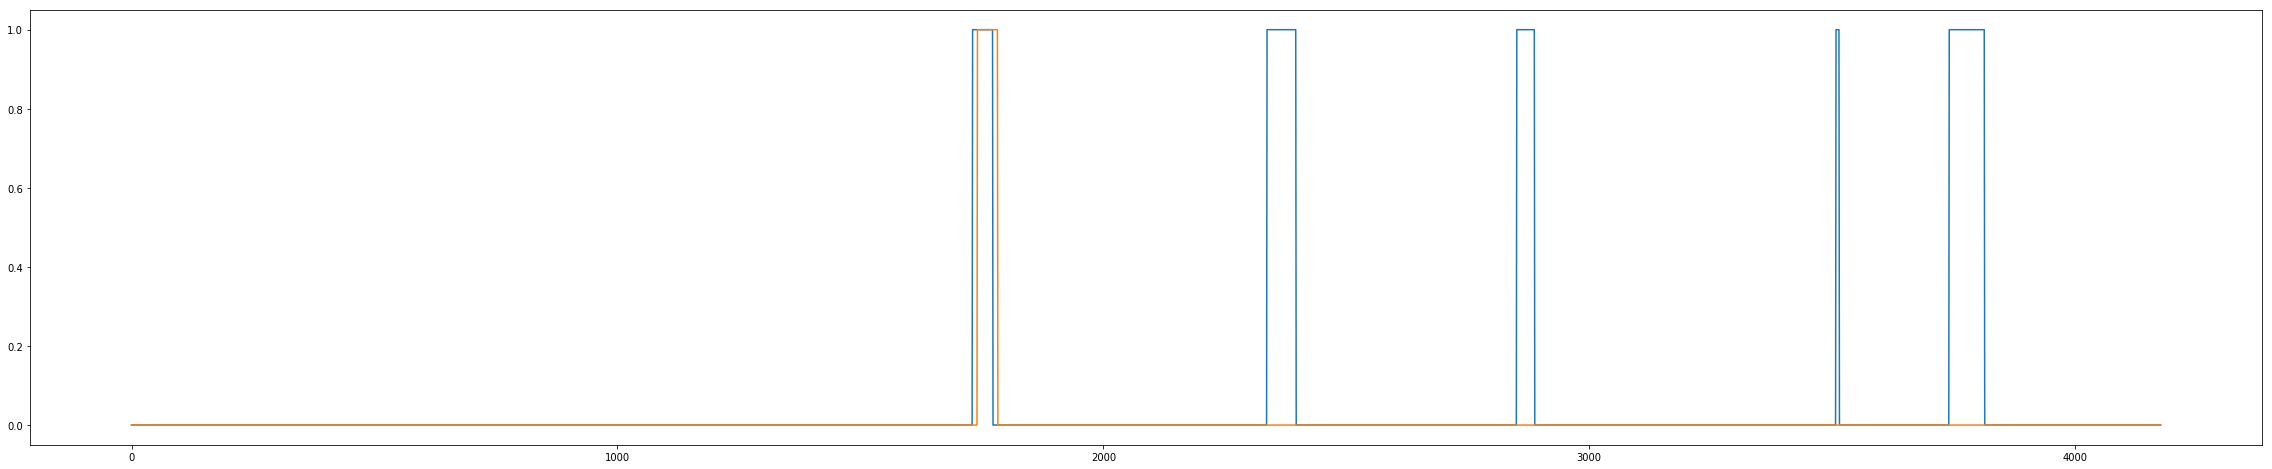

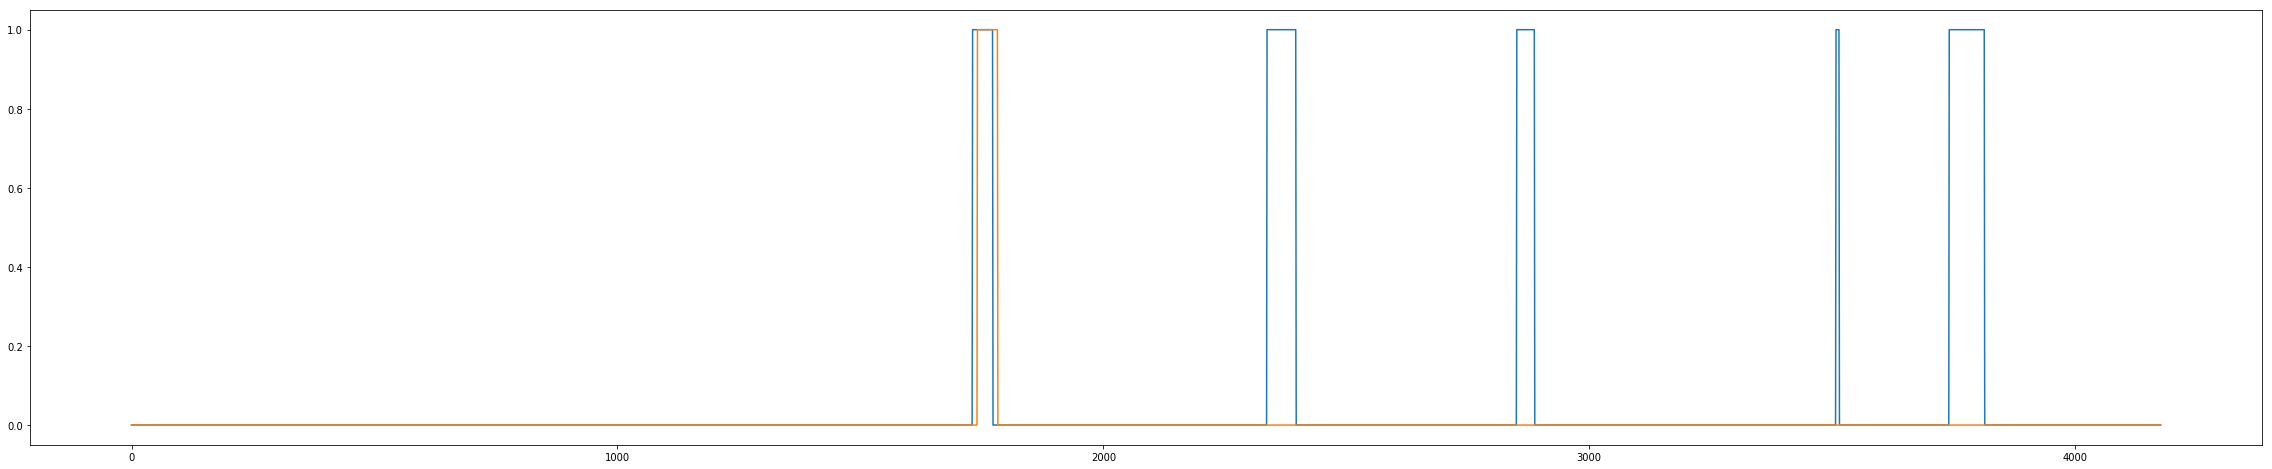

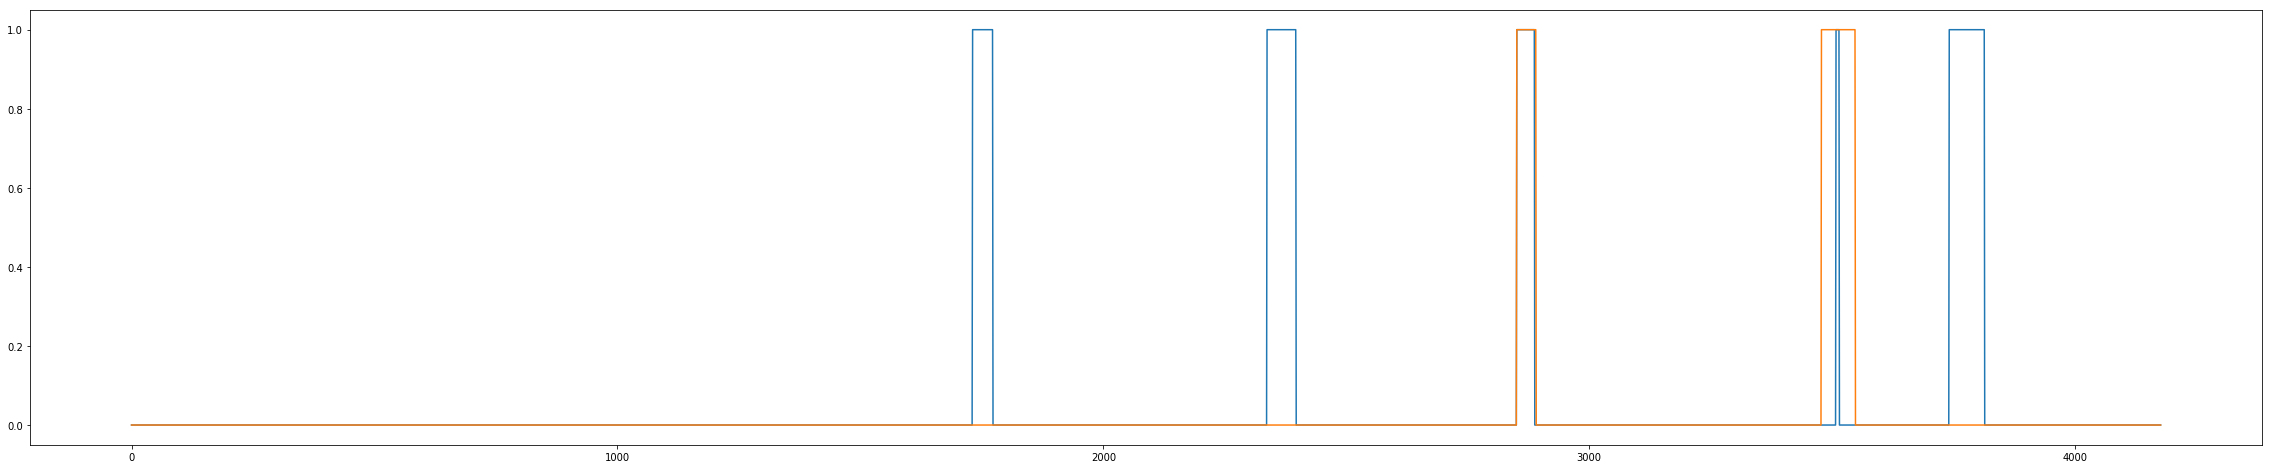

In [44]:
data2 = read_csv('./BATADAL_dataset04.csv', header=0, parse_dates=[0] ,index_col=[0],squeeze=True,\
                  date_parser=parser)
pre=np.zeros(len(data2))
for item in data2: 
    signal=data2[item]
    FP,pre1=dis_eva(signal,label2,1000,40)
    if FP>=0.4:
        print item
        pre=pre+pre1
    

[[3860   98]
 [  39  180]]
precision: 0.6474820143884892
recall: 0.821917808219178


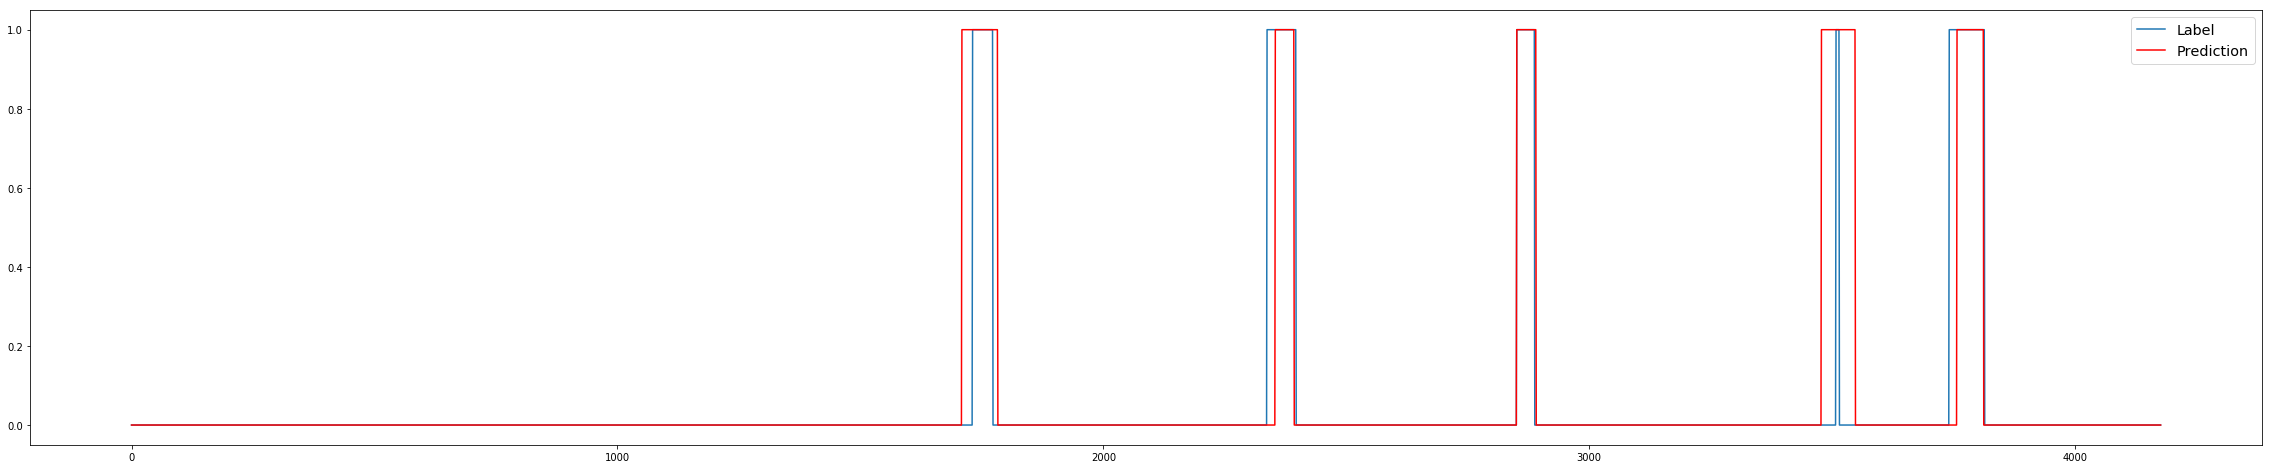

In [49]:
prediction3=(pre!=0)*1
plt.figure(figsize=(40,8))
plt.plot(label2)
plt.plot(prediction3,'r')
evaluation(label2,prediction3)
plt.legend(['Label','Prediction'],fontsize='x-large')

The transition matrix is formed correctly.
[[3939   19]
 [ 187   32]]
precision: 0.6274509803921569
recall: 0.6274509803921569
0.6274509803921569
0.6274509803921569
L_T1
The transition matrix is formed correctly.
[[3908   50]
 [ 219    0]]
precision: 0.0
recall: 0.0
0.0
0.0
L_T2
The transition matrix is formed correctly.
[[   6 3952]
 [   0  219]]
precision: 0.05250539438983457
recall: 0.05250539438983457
0.05250539438983457
0.05250539438983457
L_T3
The transition matrix is formed correctly.
[[3916   42]
 [ 212    7]]
precision: 0.14285714285714285
recall: 0.14285714285714285
0.14285714285714285
0.14285714285714285
L_T4
The transition matrix is formed correctly.
[[3913   45]
 [ 177   42]]
precision: 0.4827586206896552
recall: 0.4827586206896552
0.4827586206896552
0.4827586206896552
L_T5
The transition matrix is formed correctly.
[[3918   40]
 [ 188   31]]
precision: 0.43661971830985913
recall: 0.43661971830985913
0.43661971830985913
0.43661971830985913
L_T6
The transition matrix is for

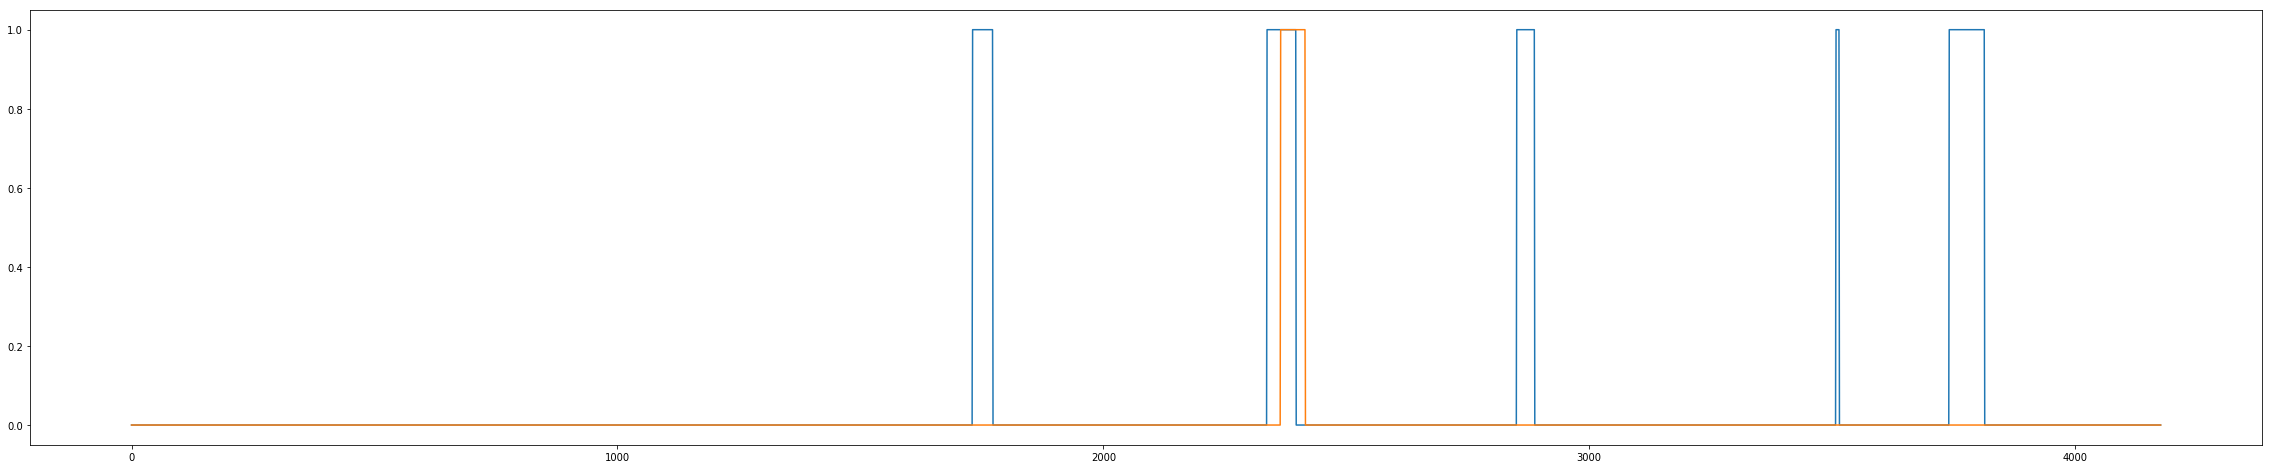

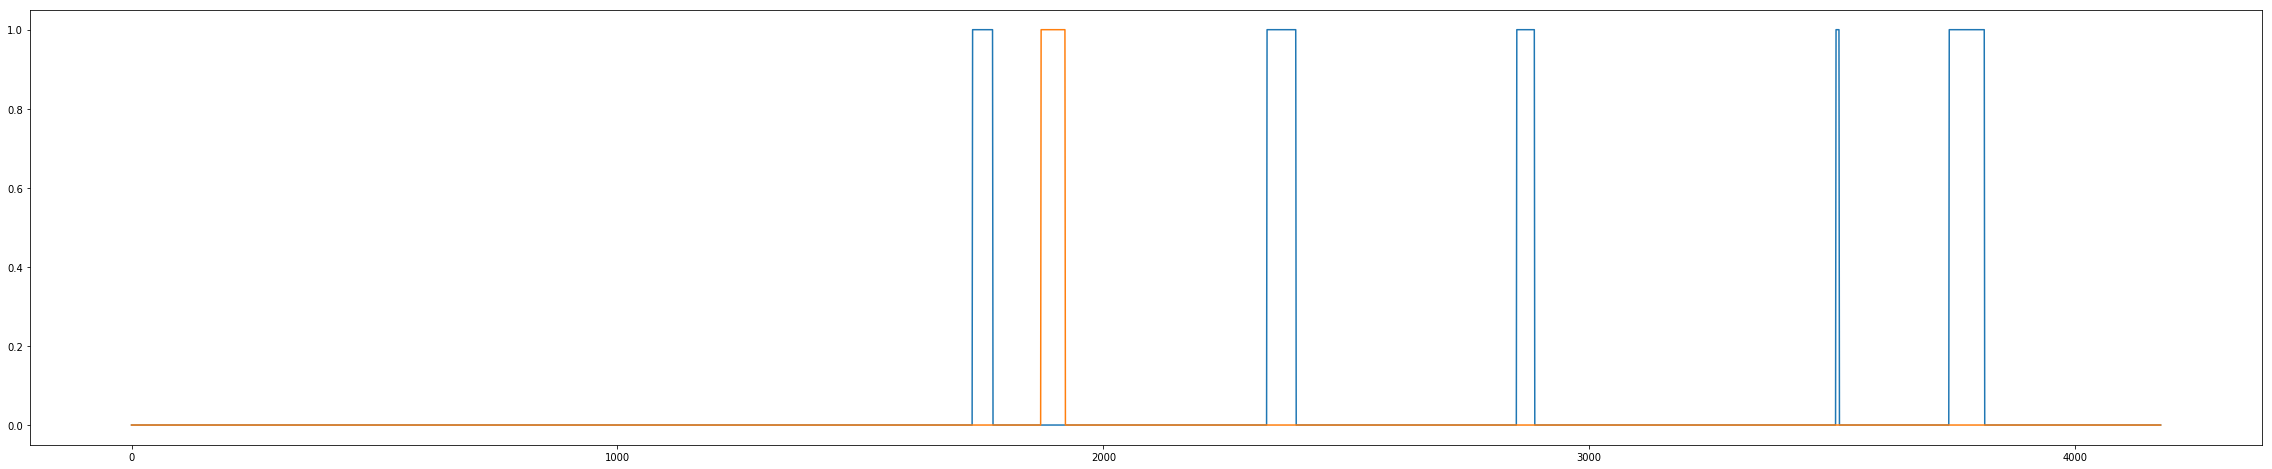

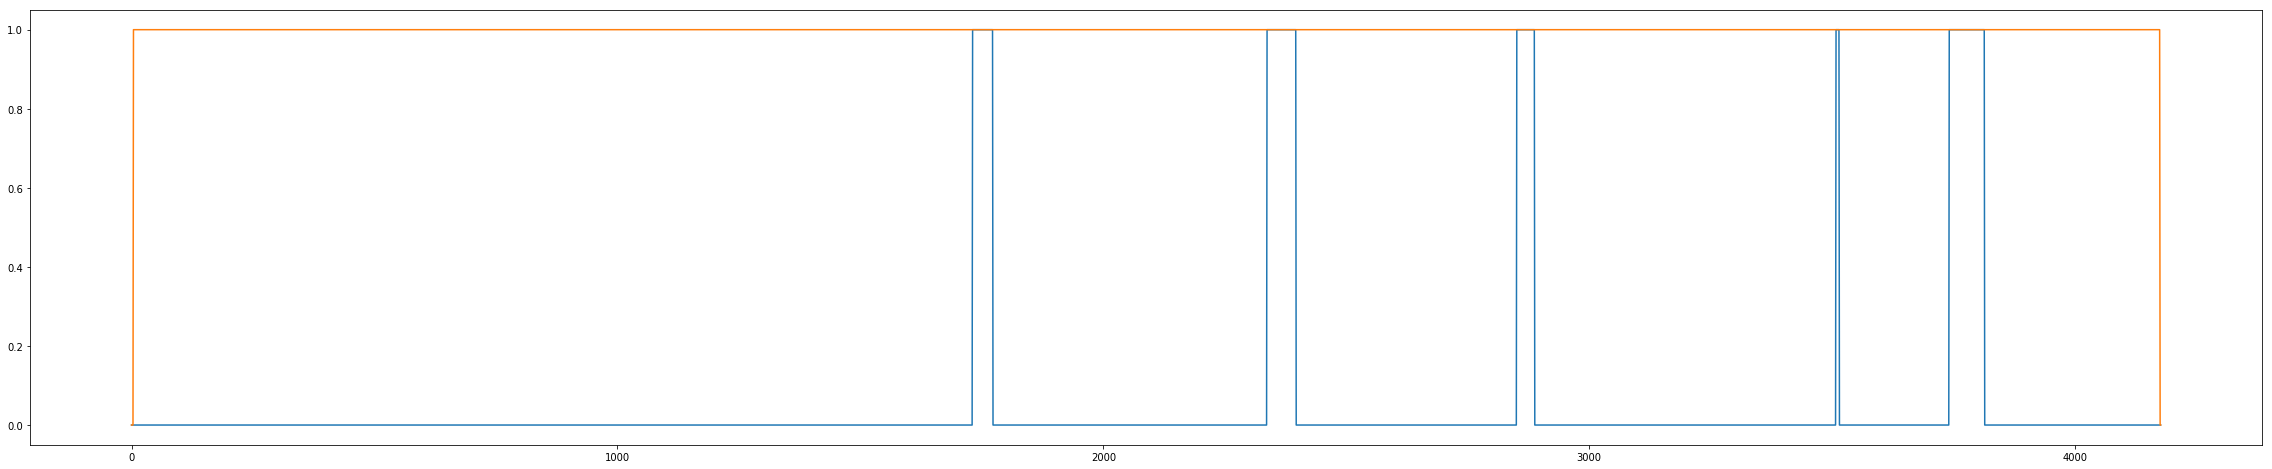

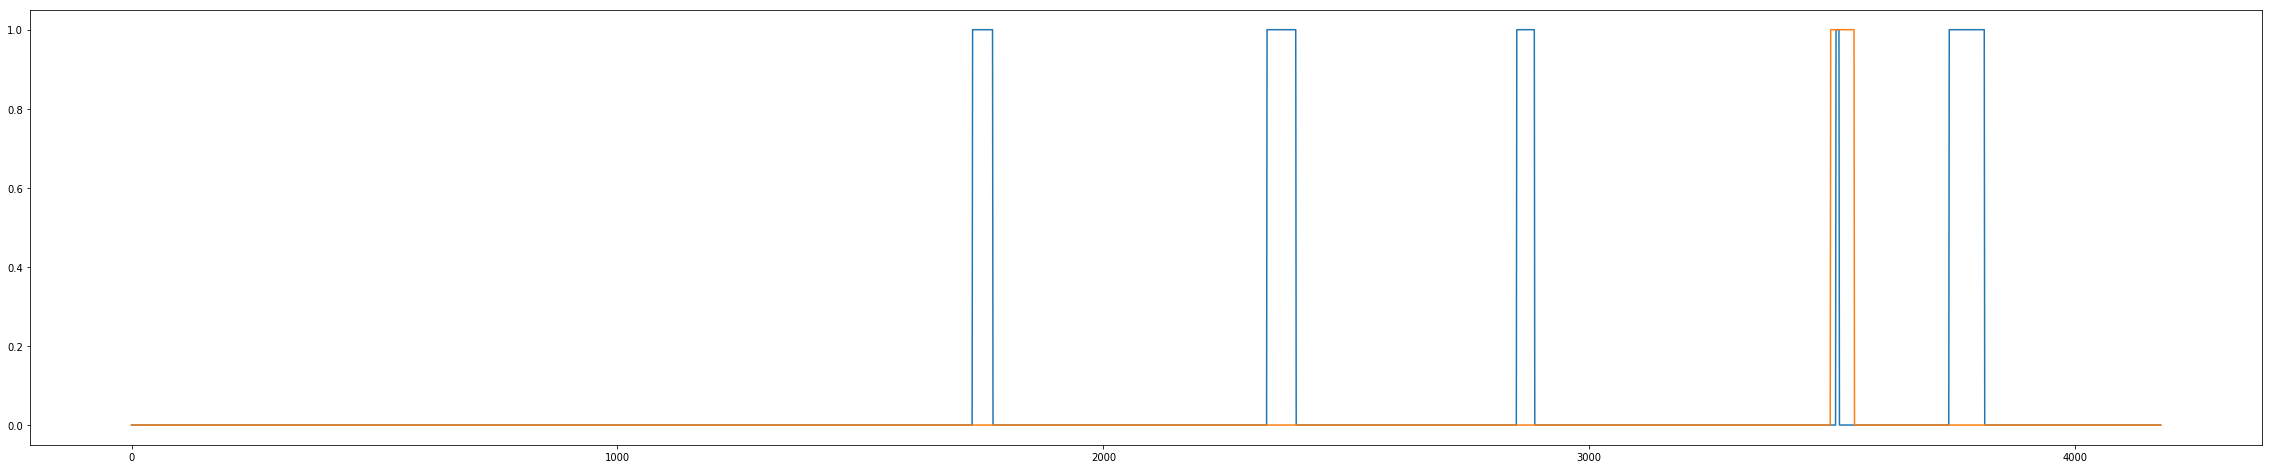

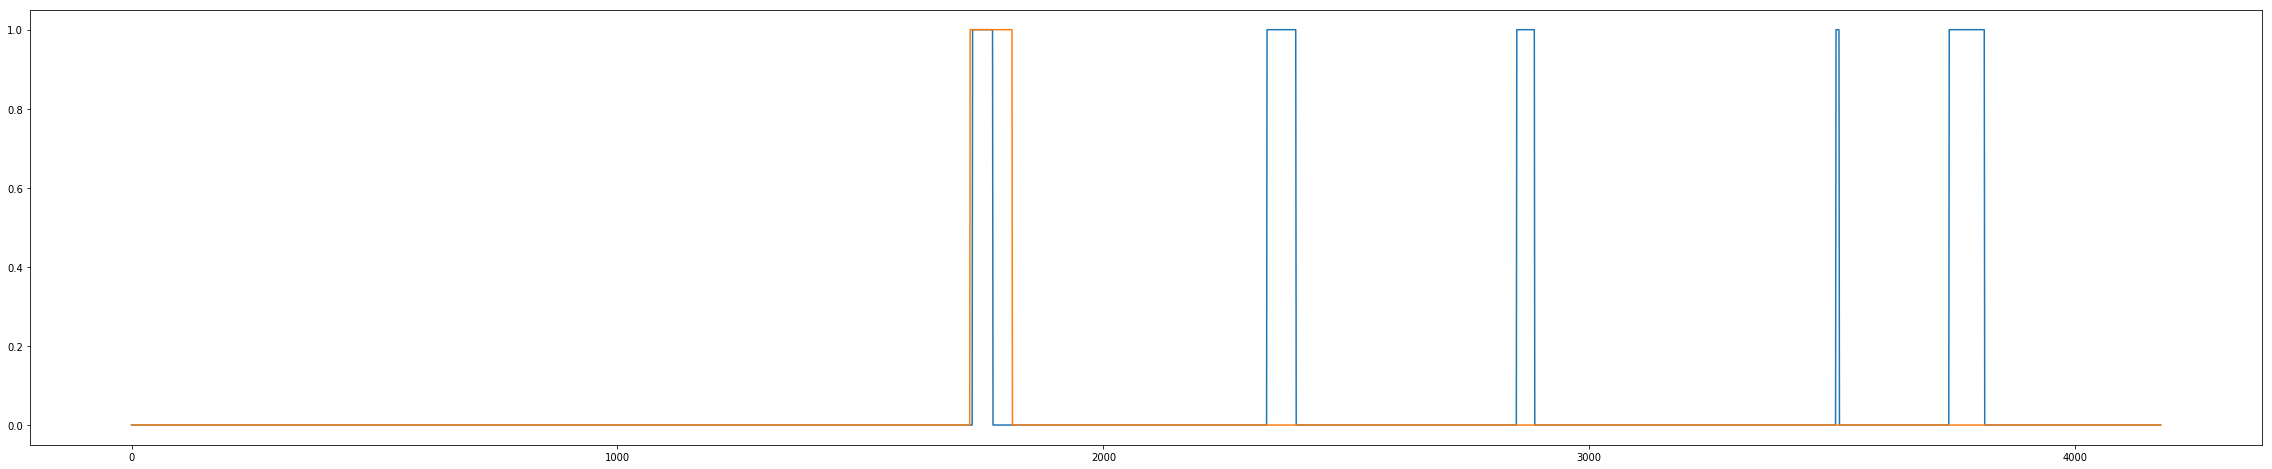

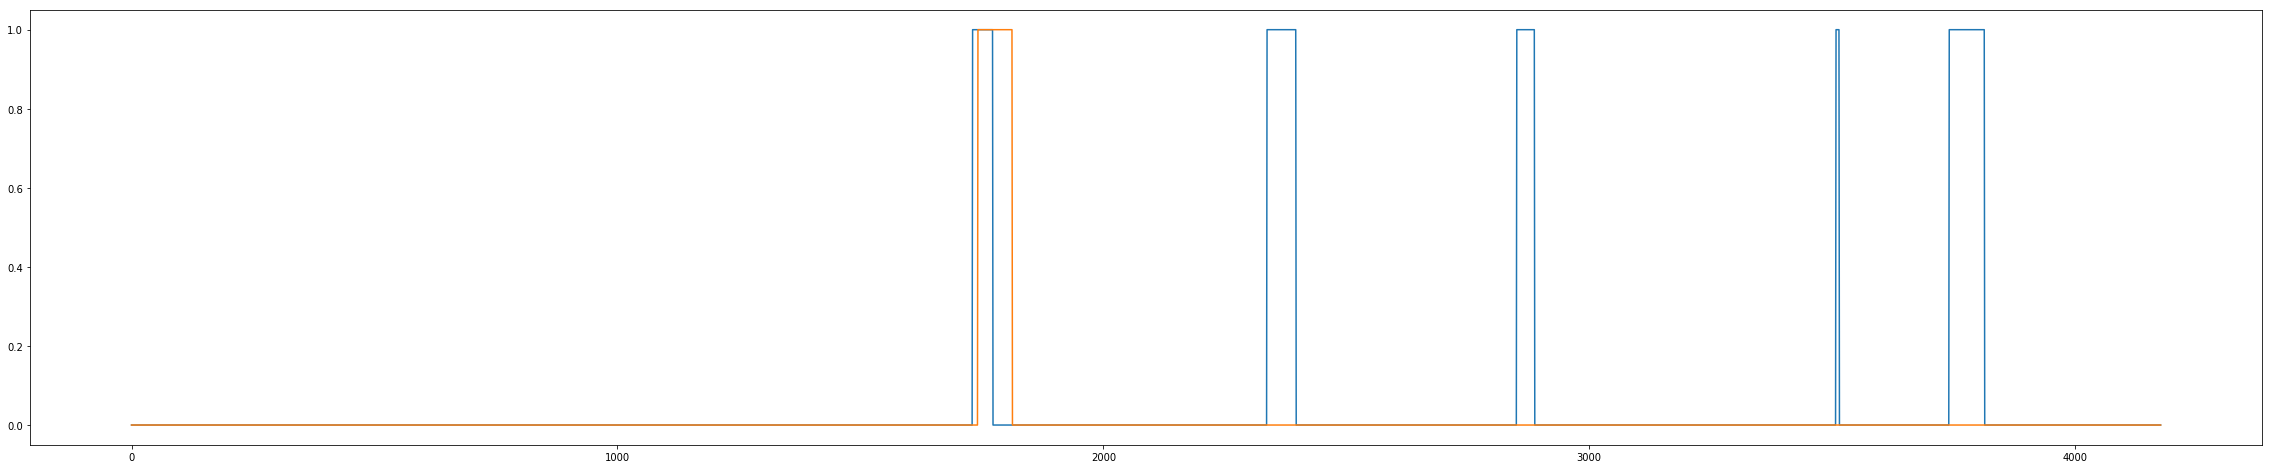

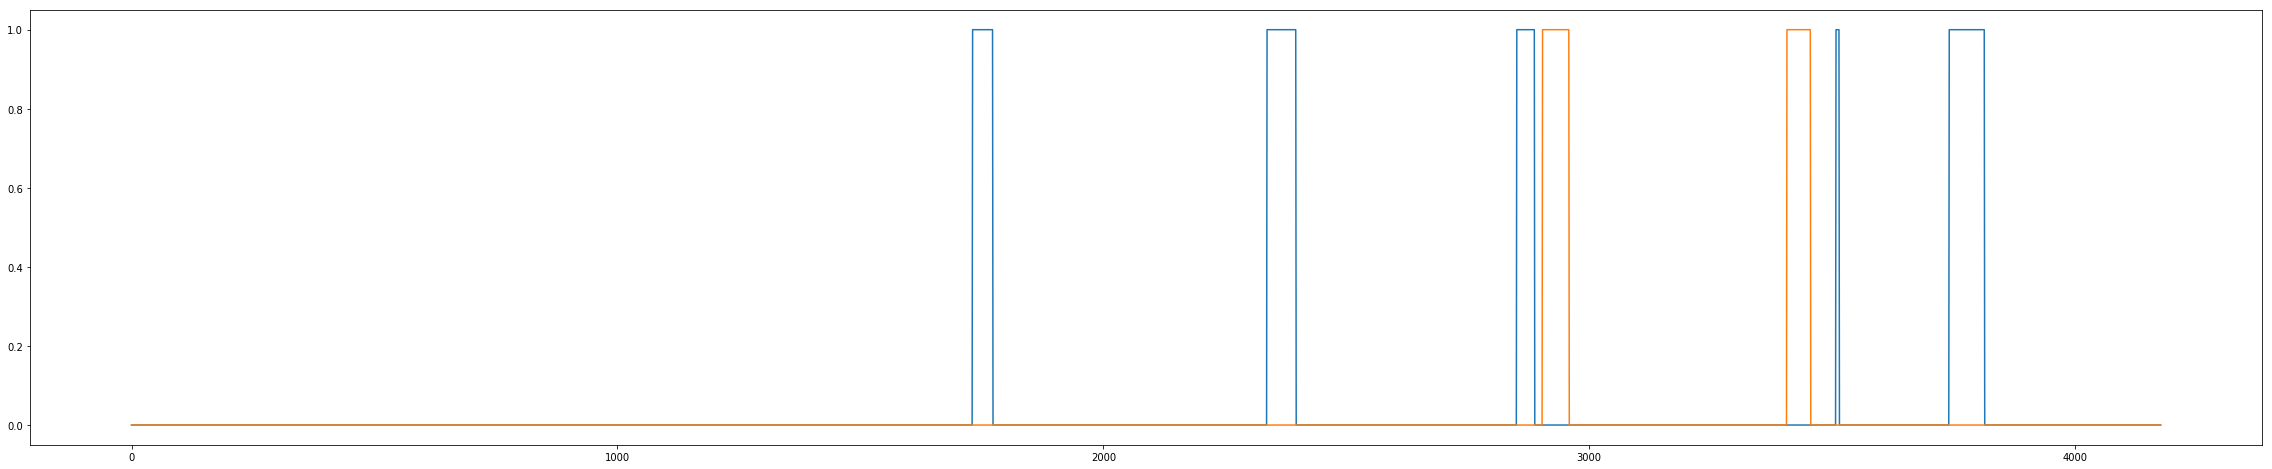

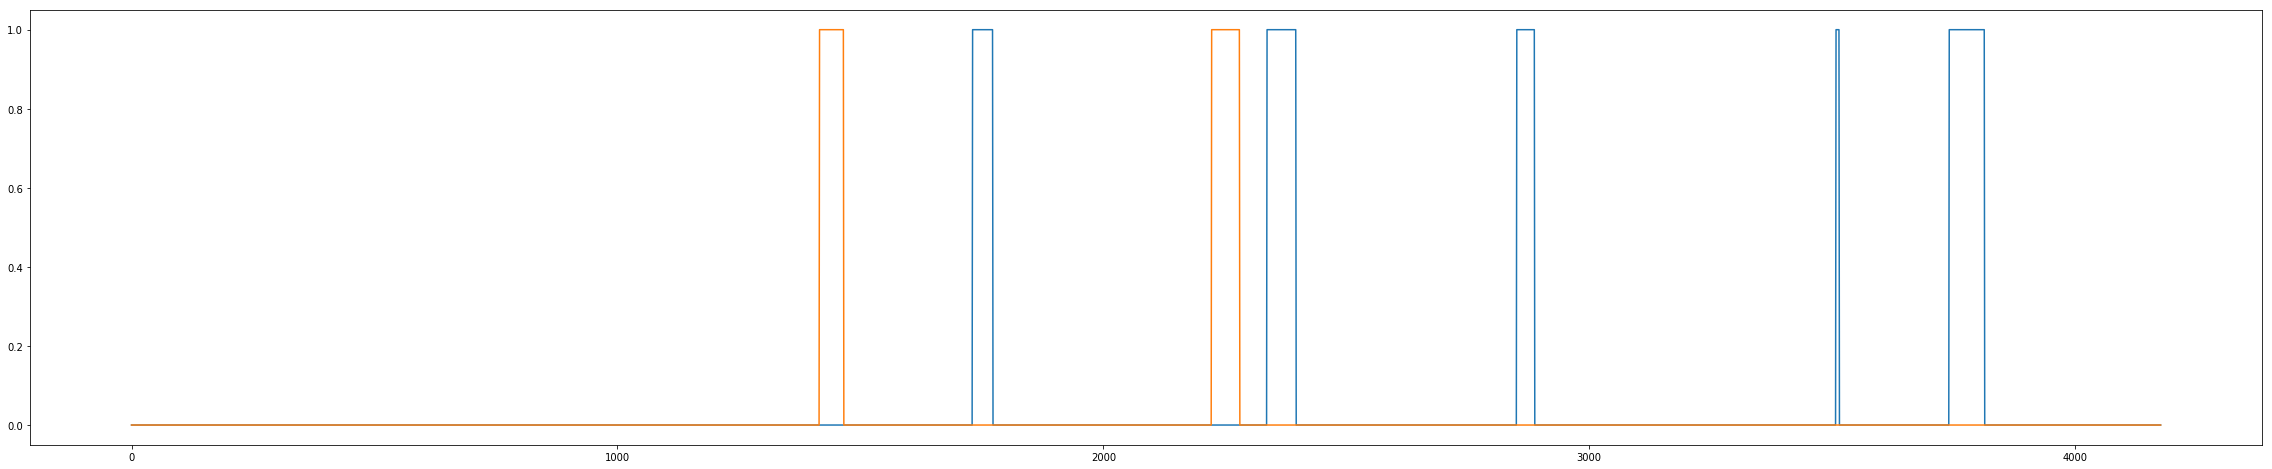

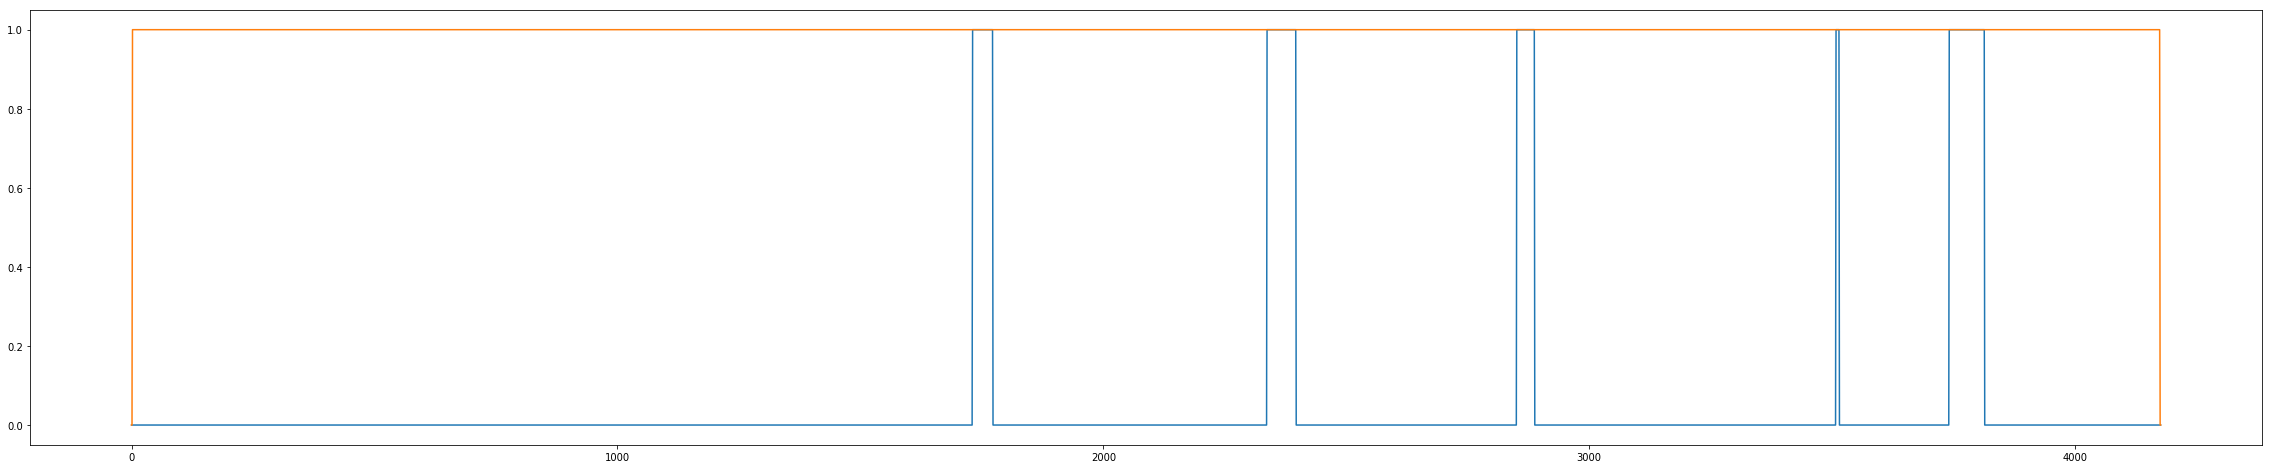

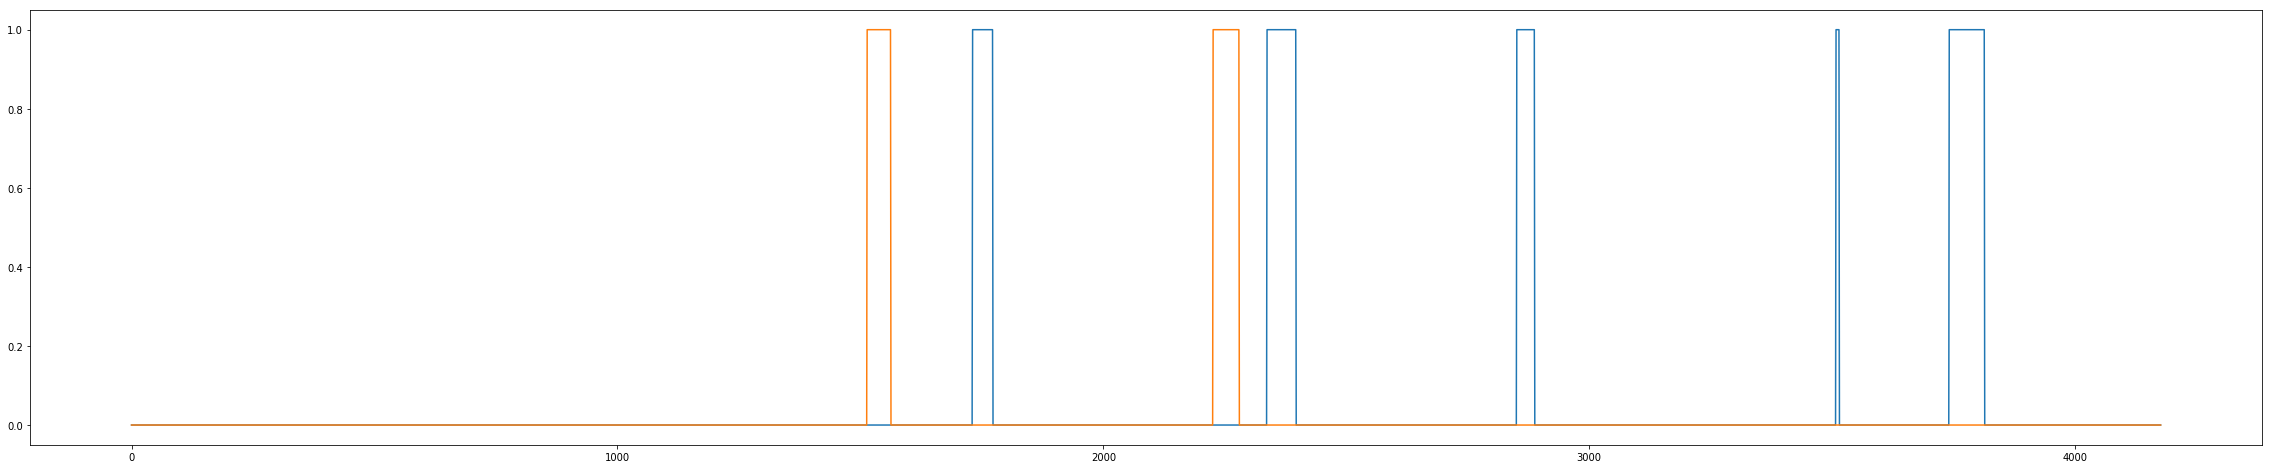

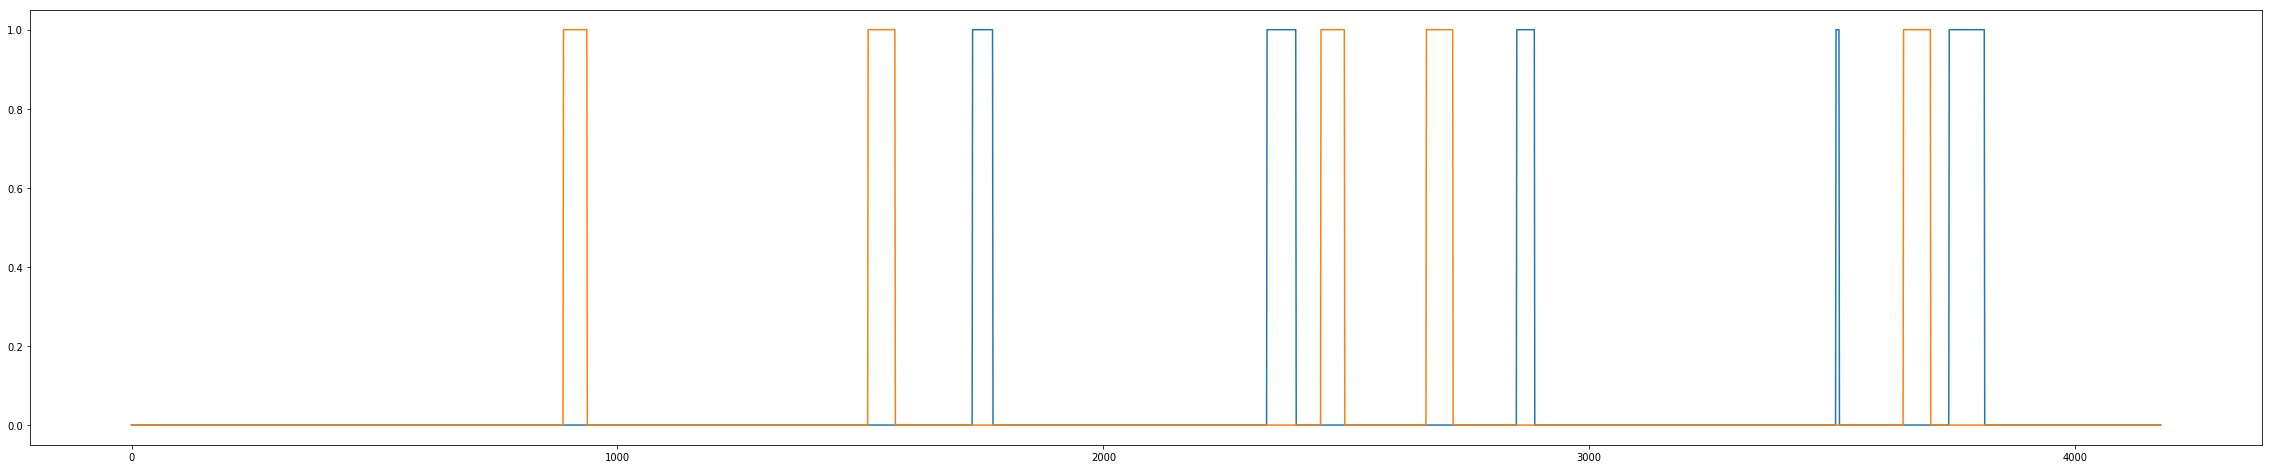

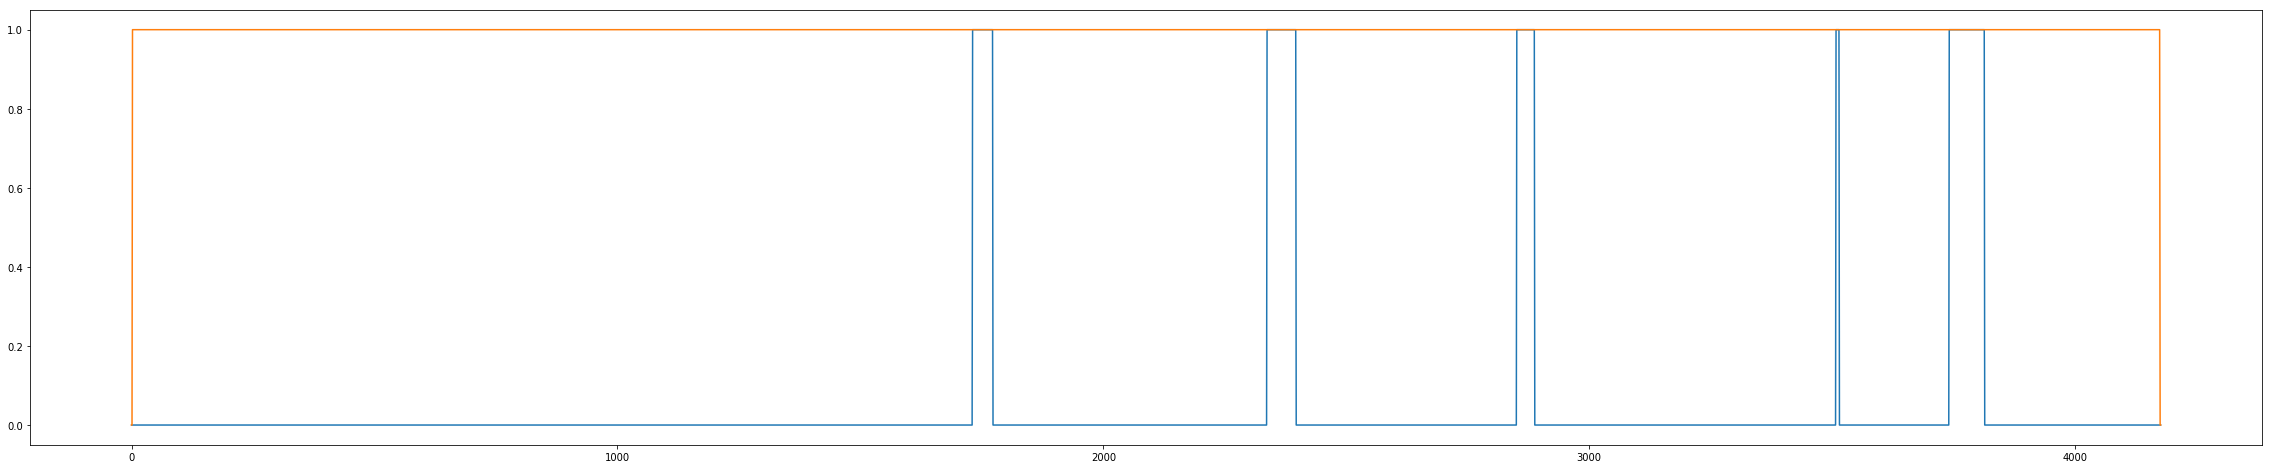

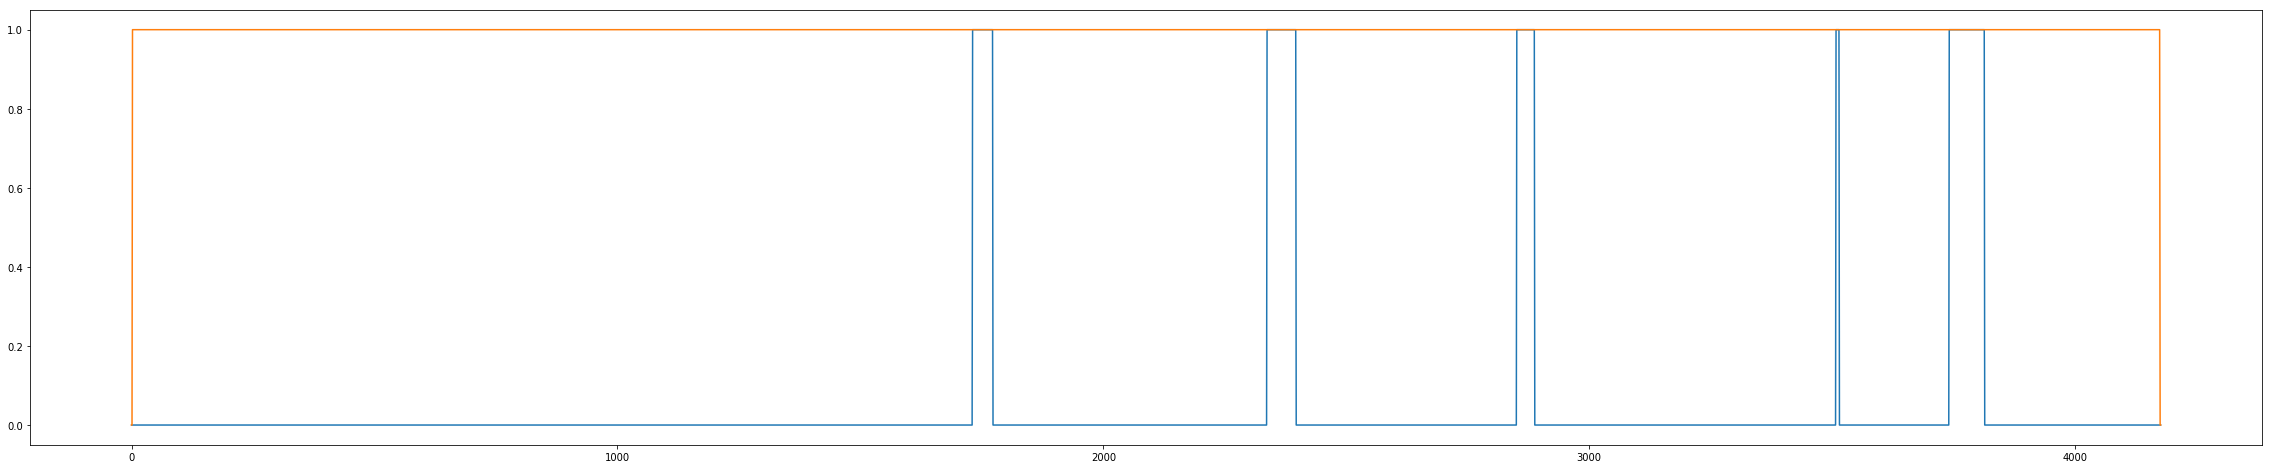

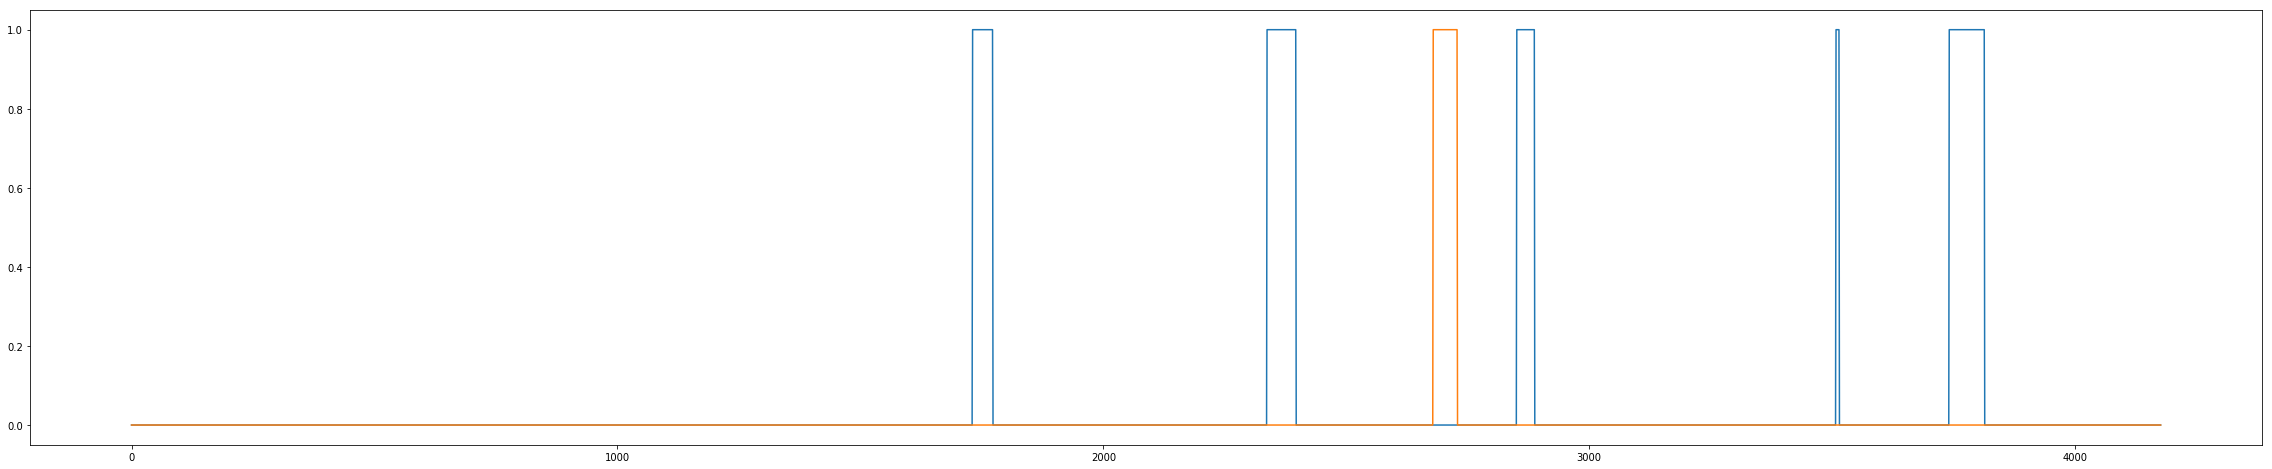

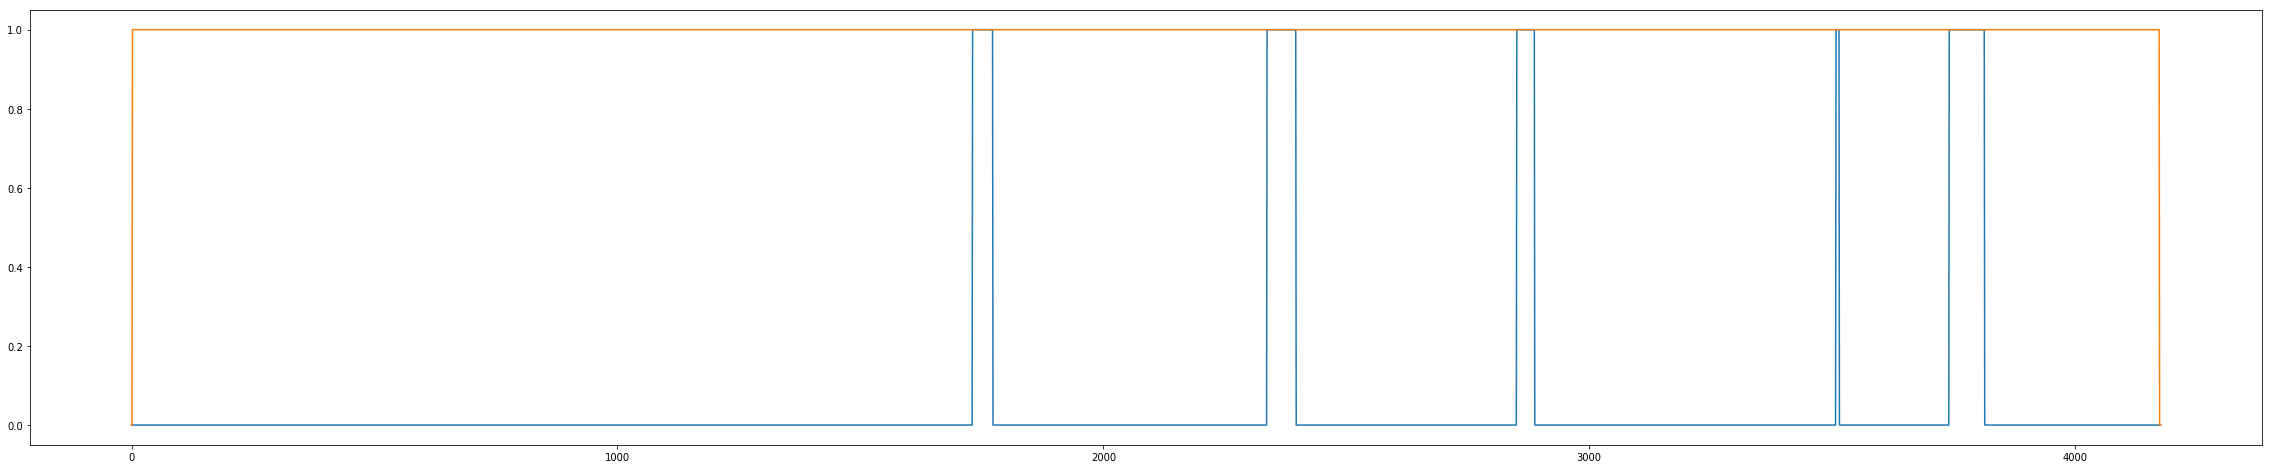

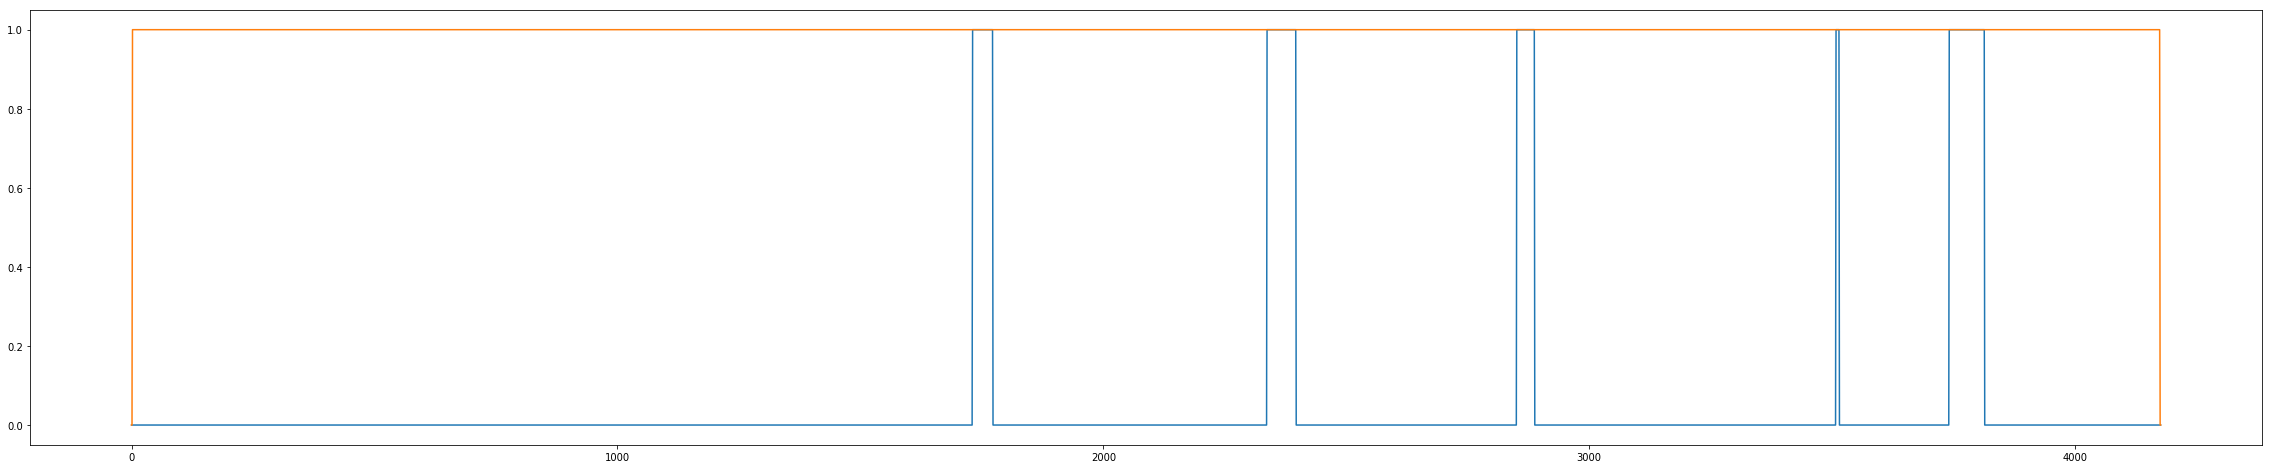

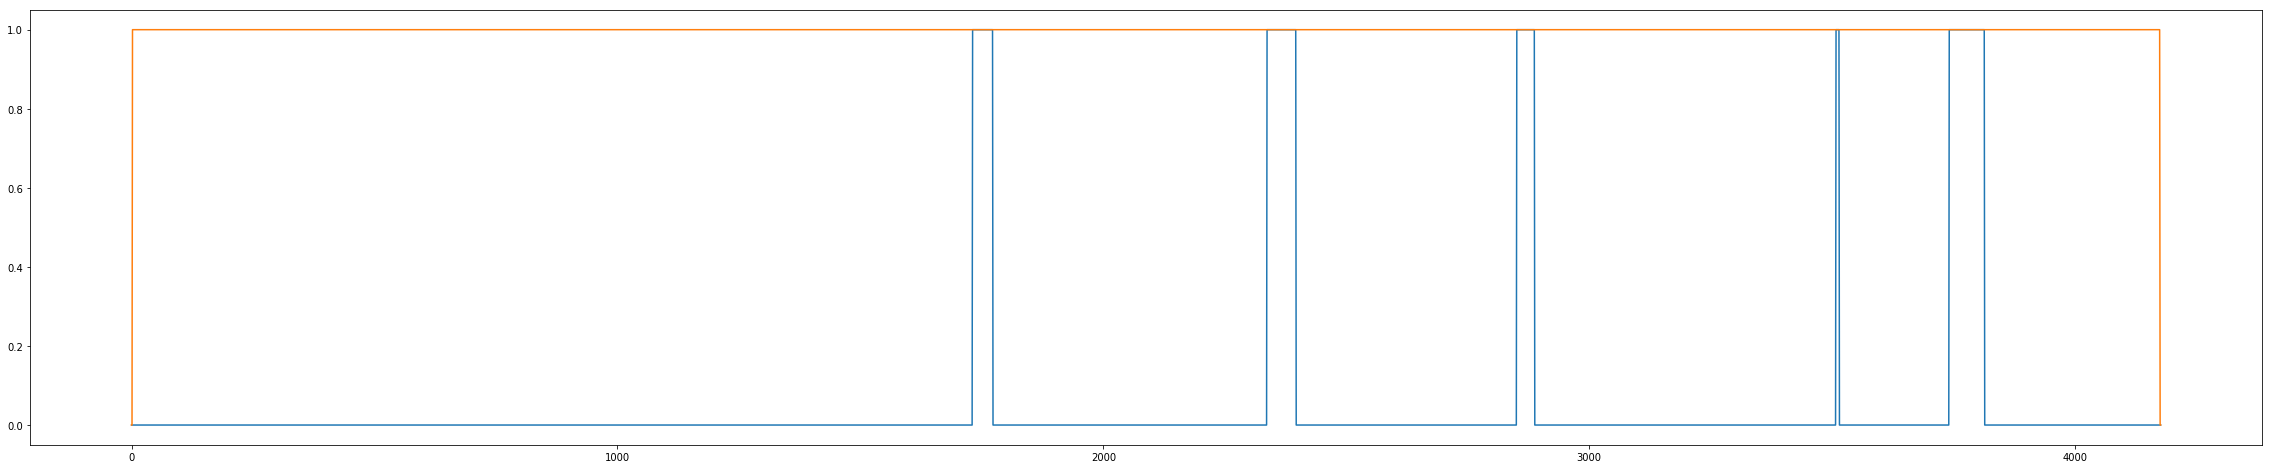

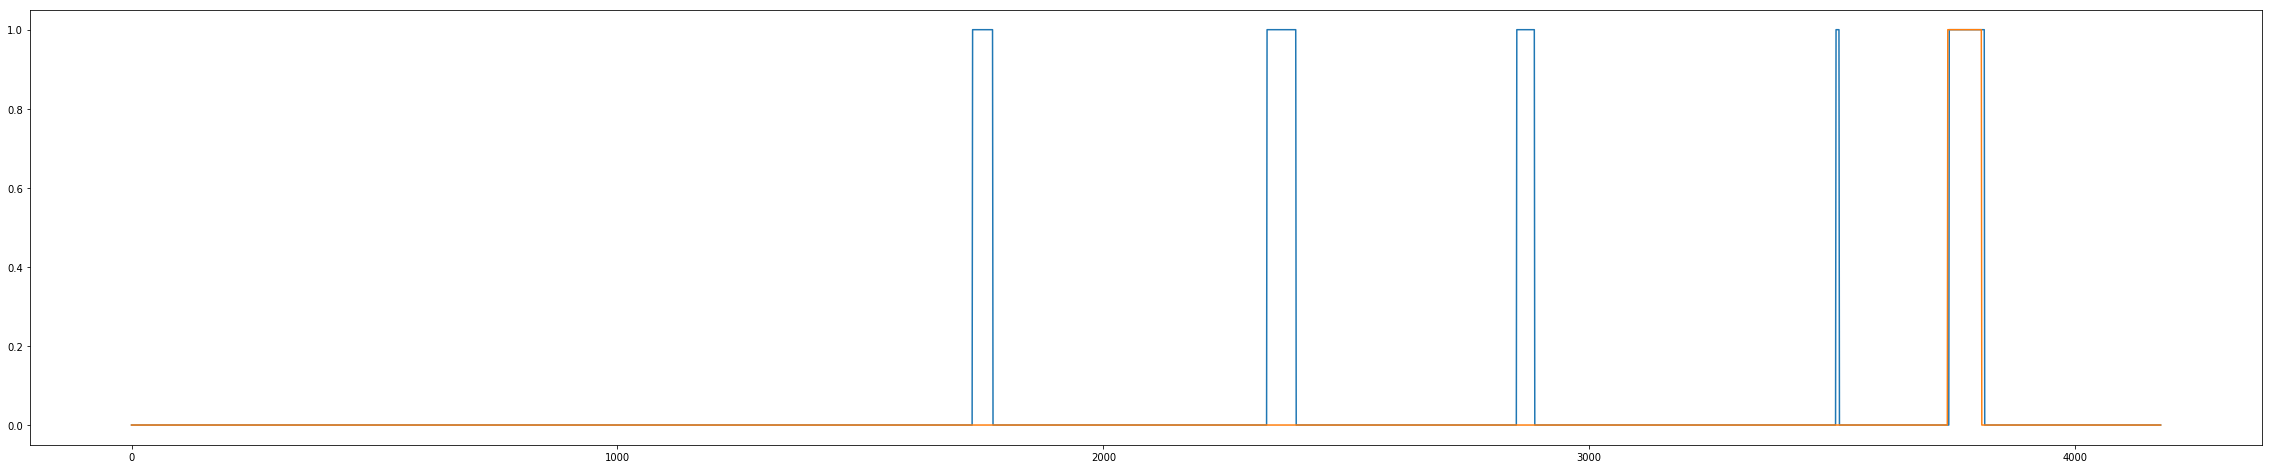

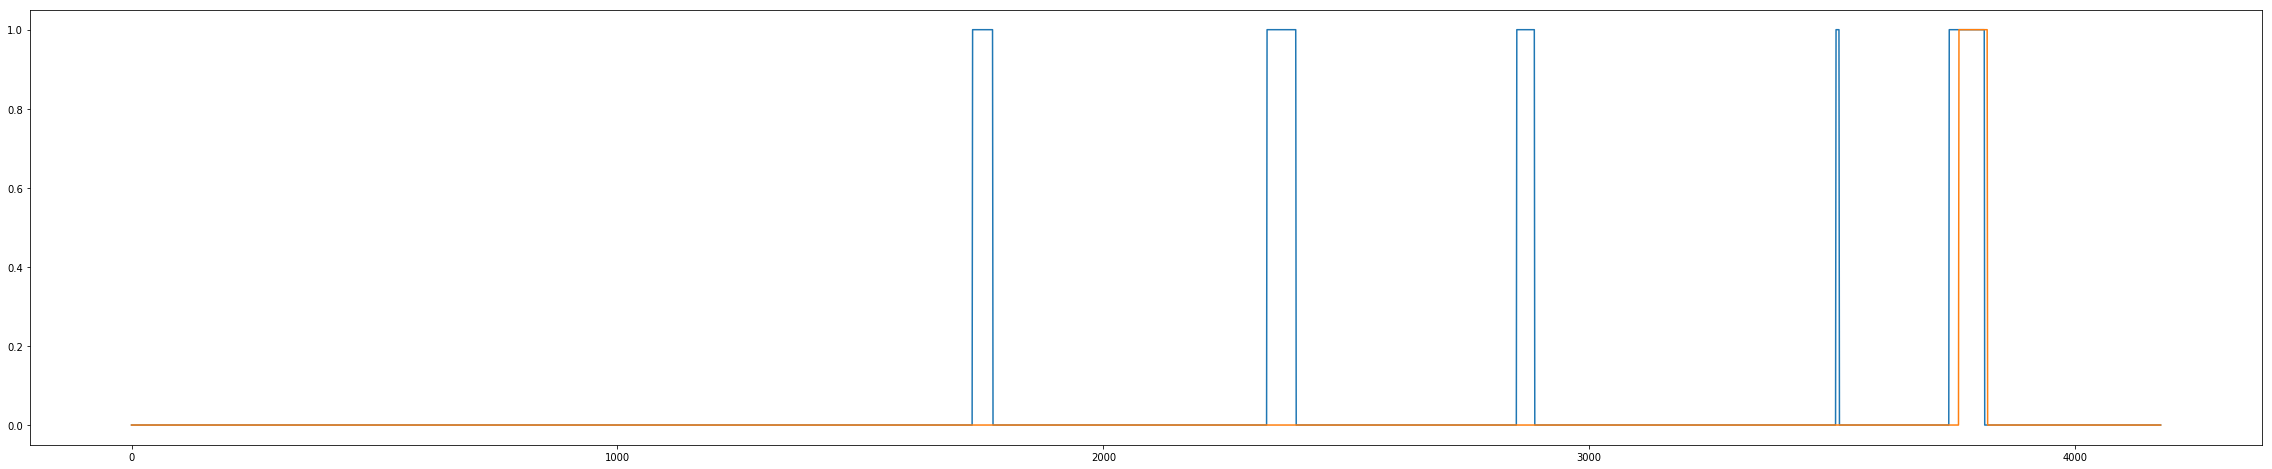

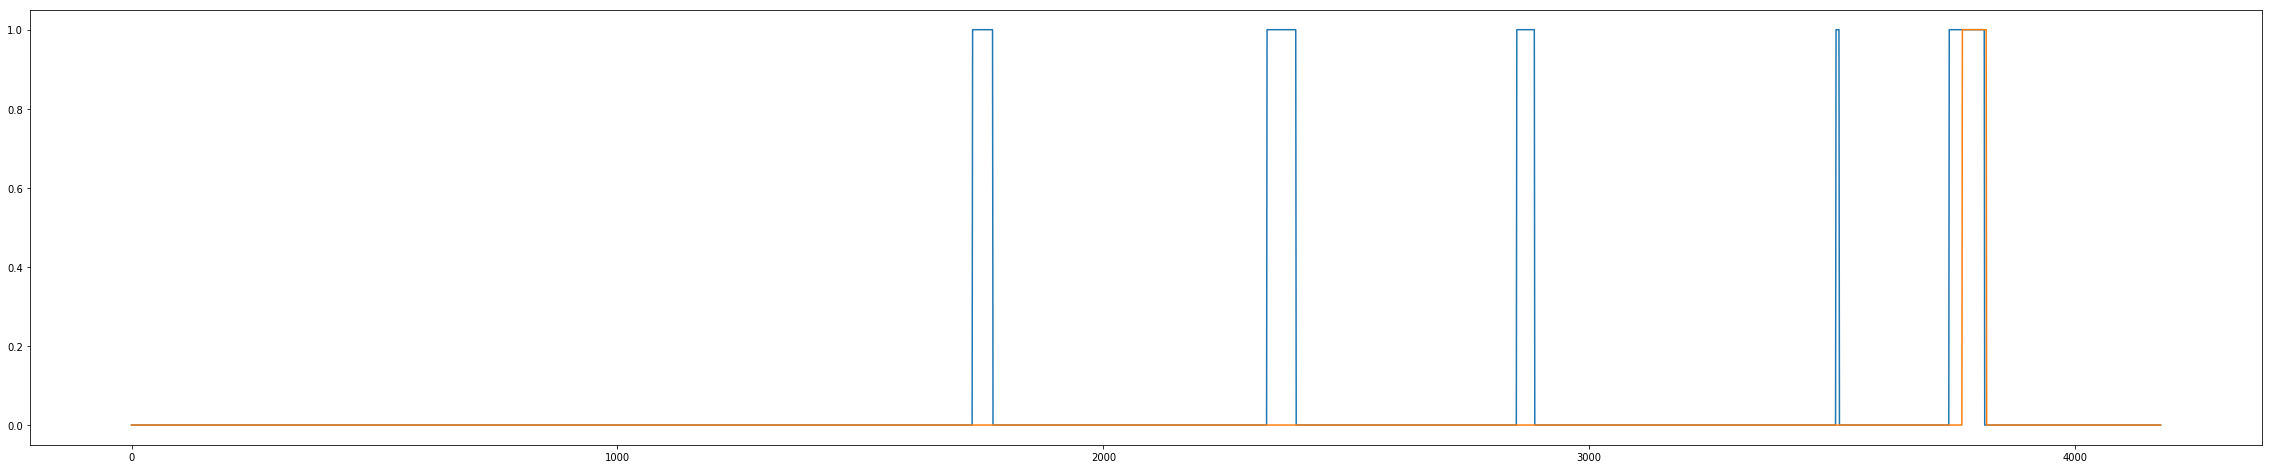

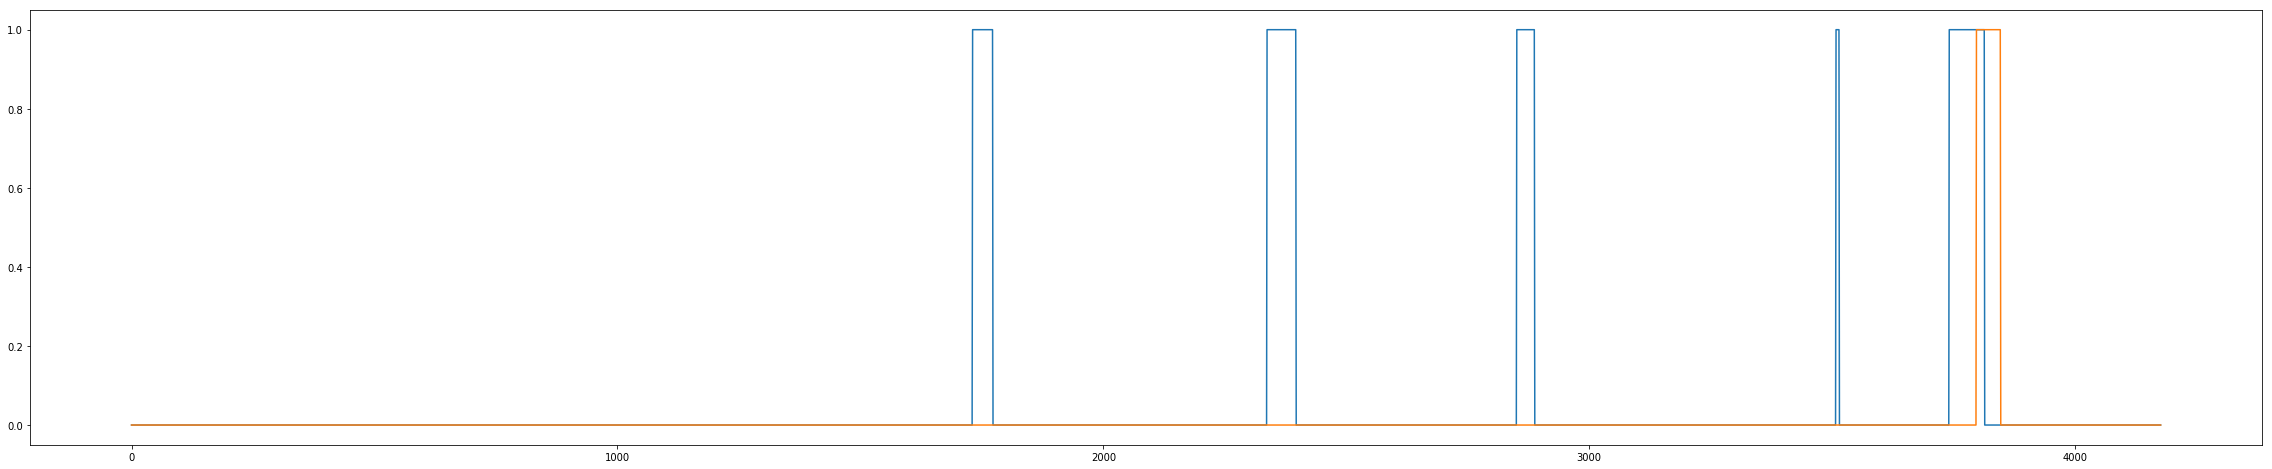

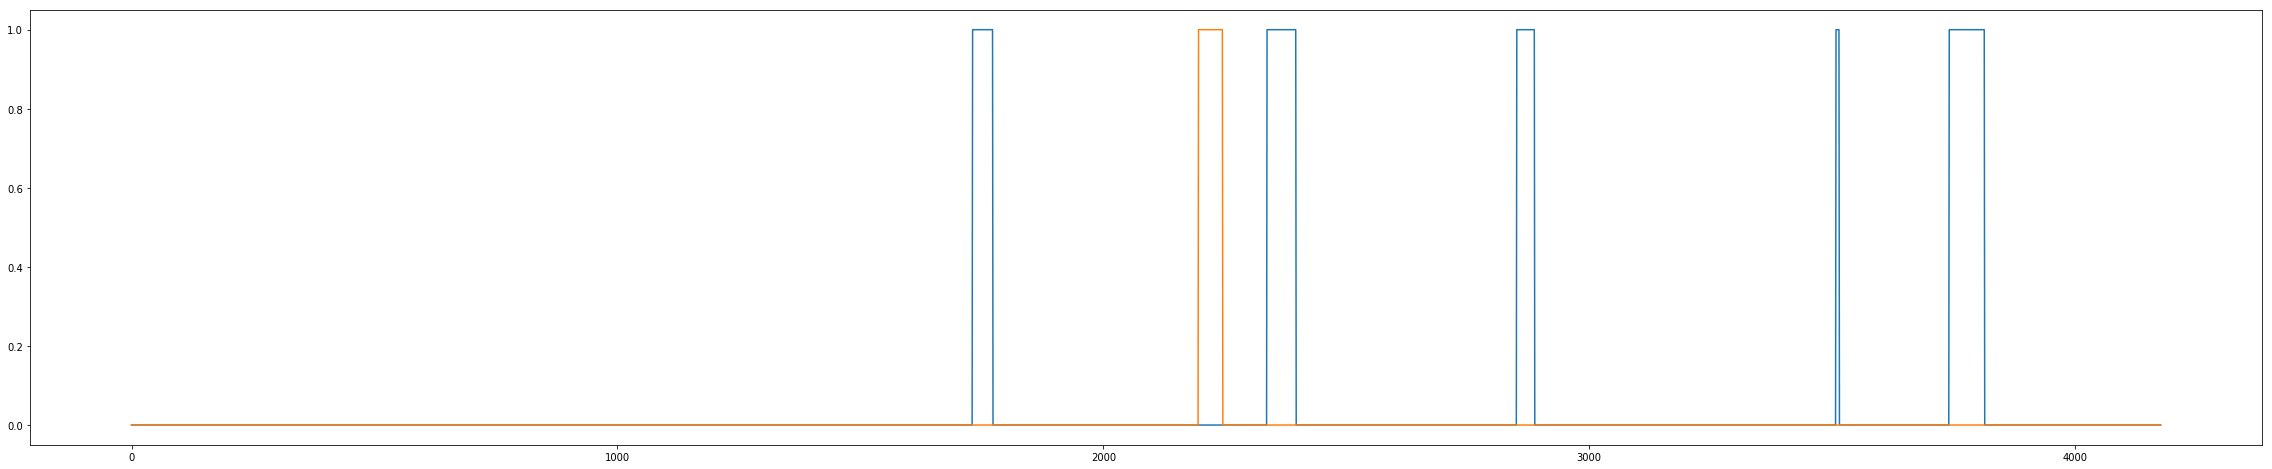

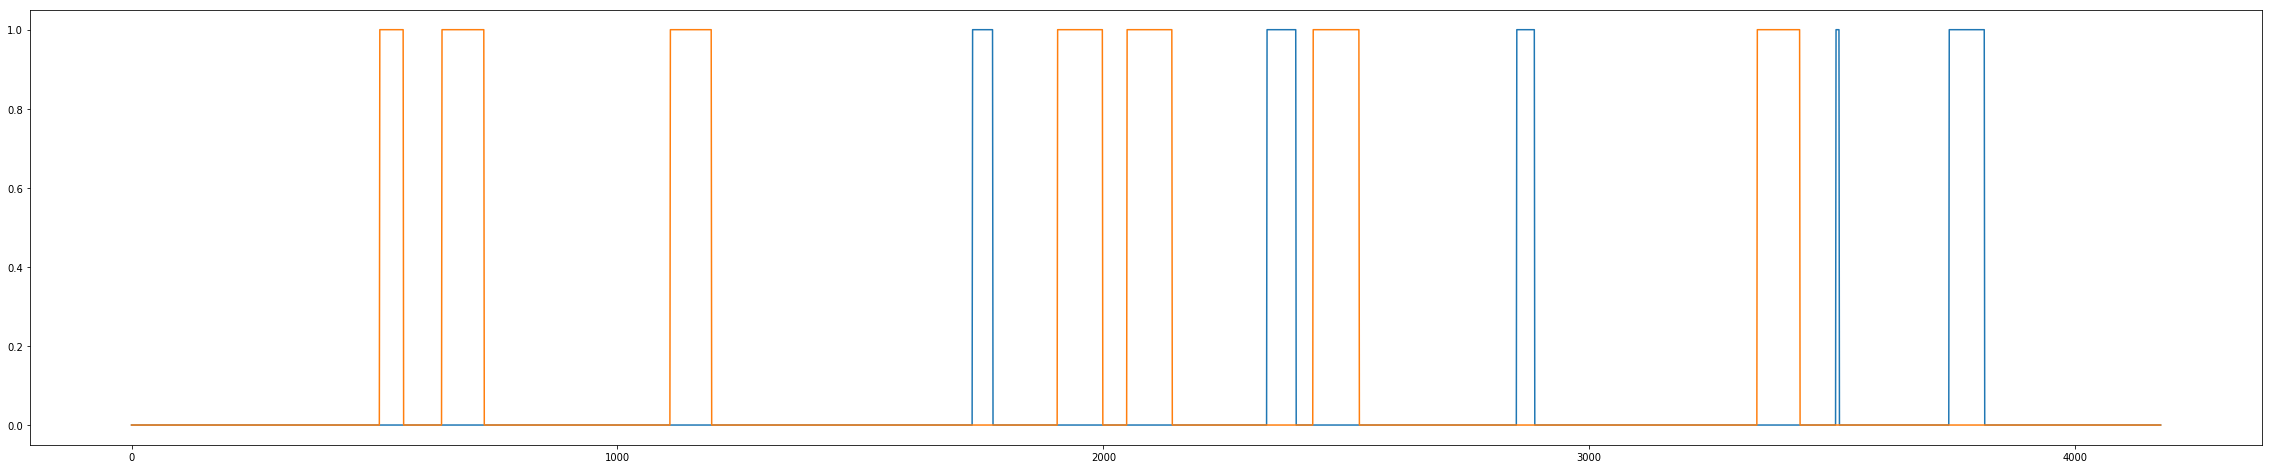

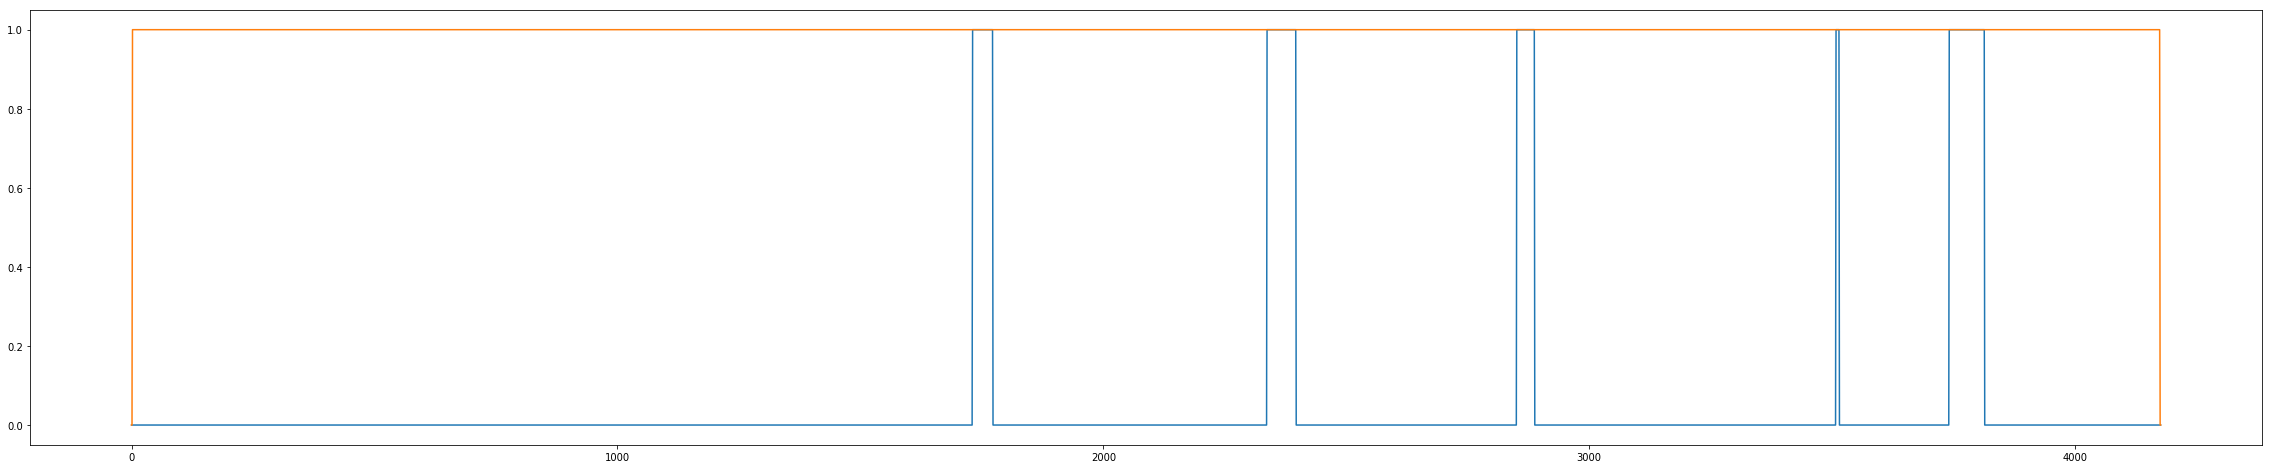

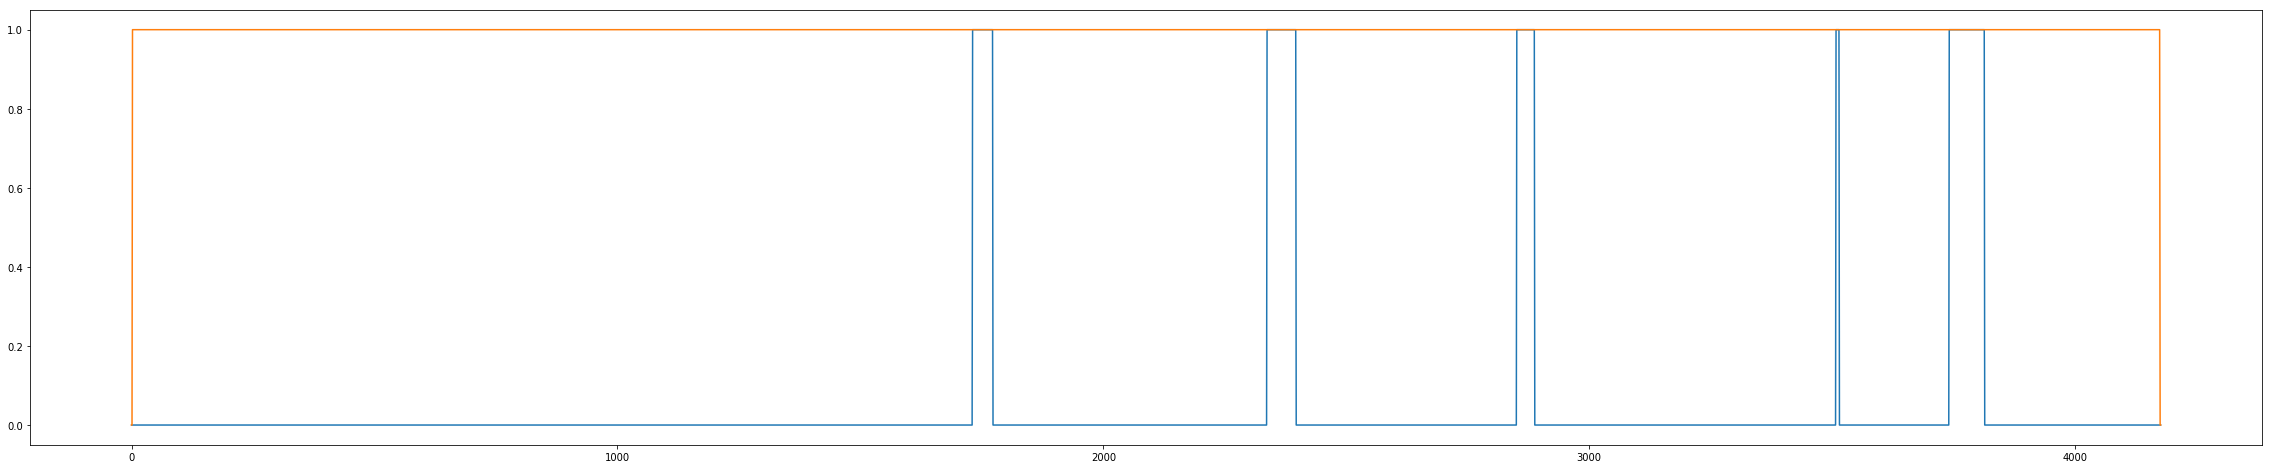

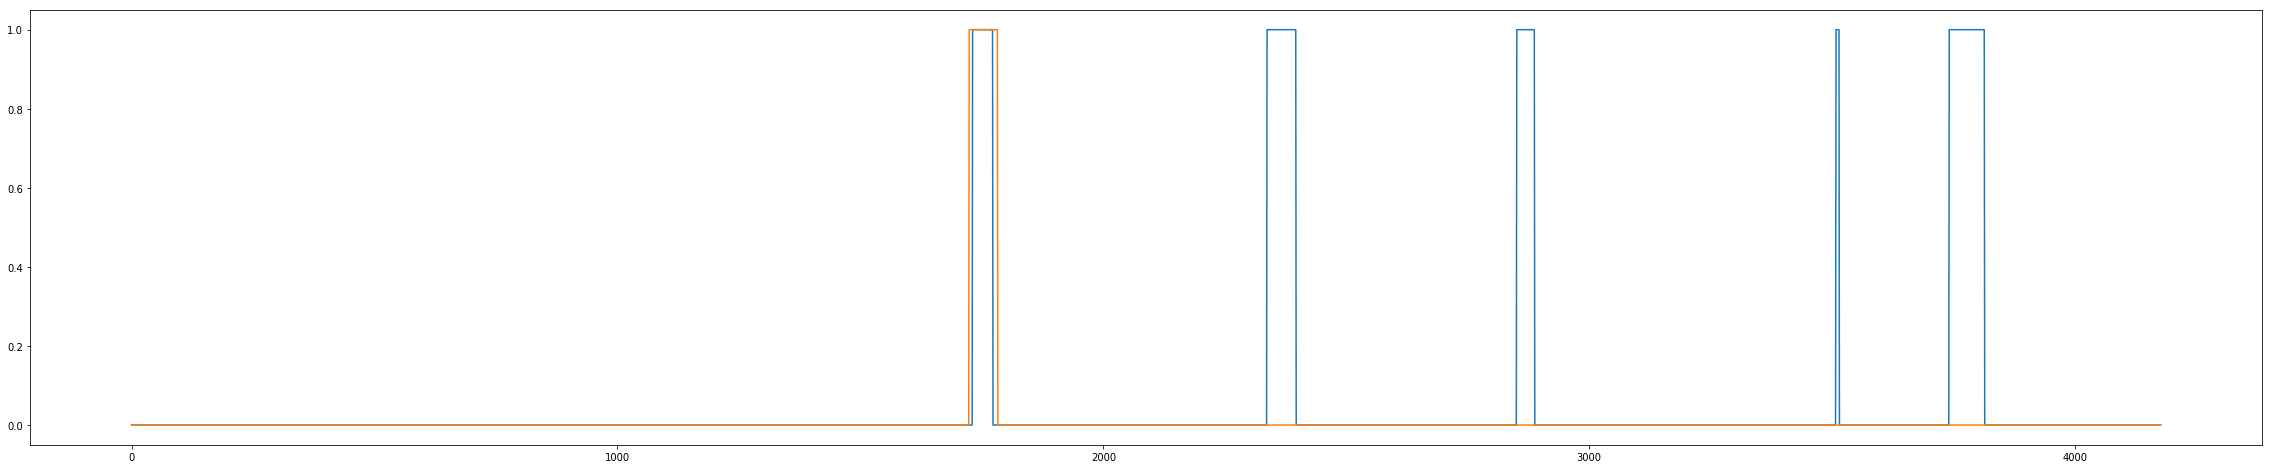

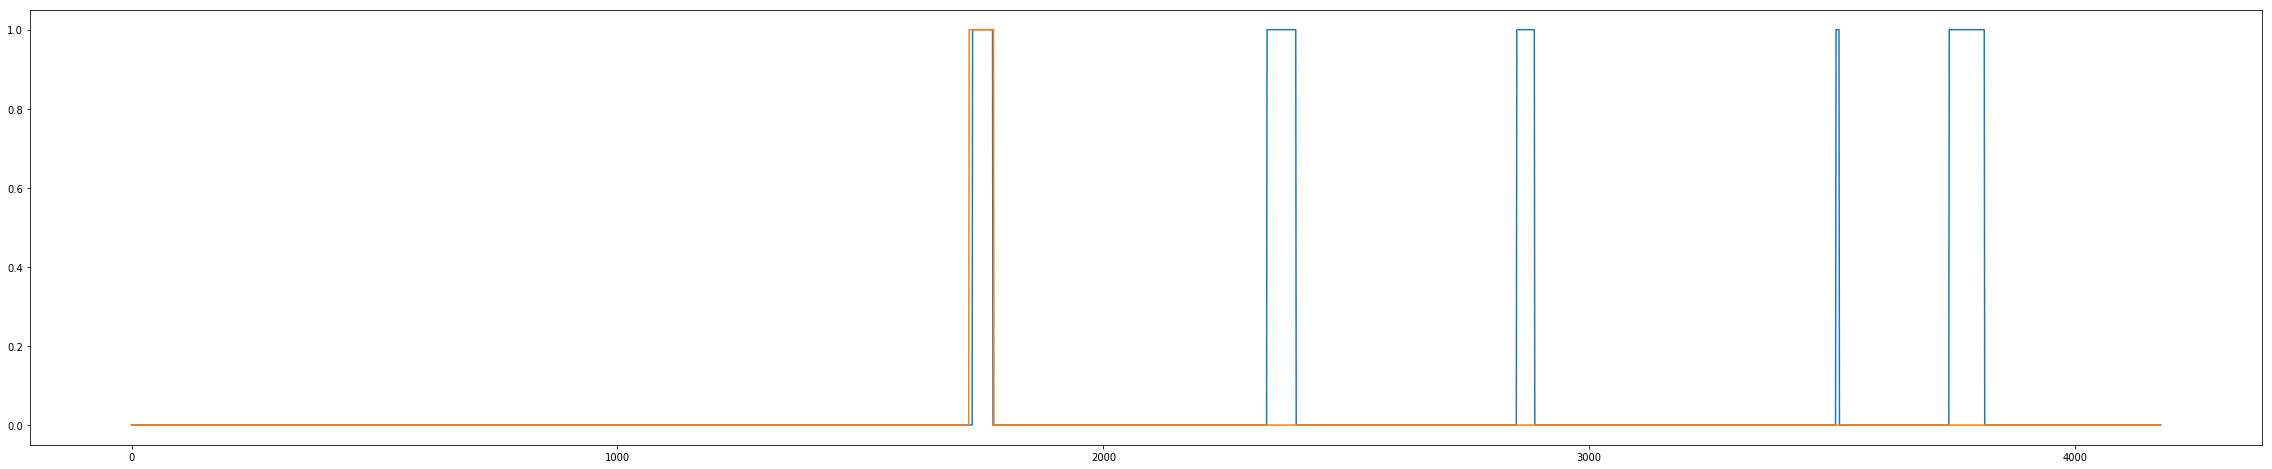

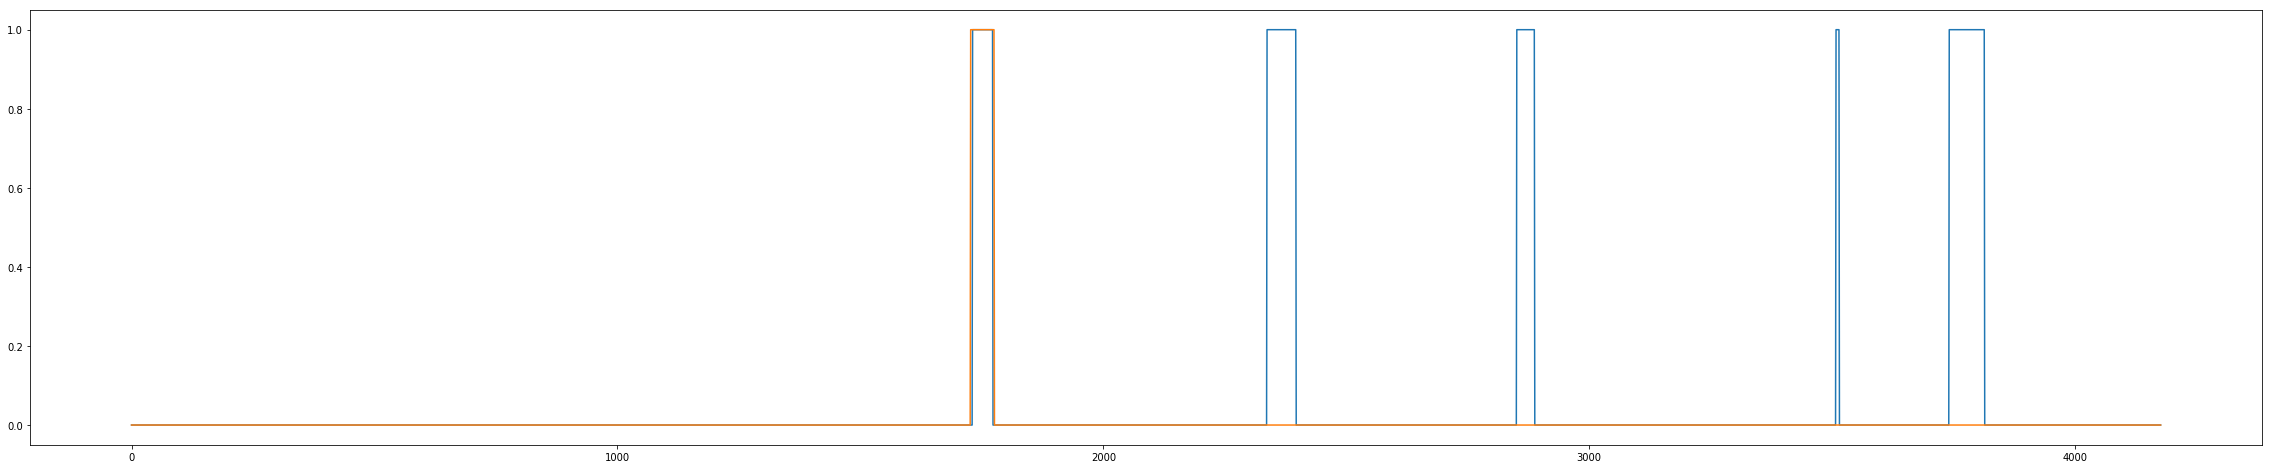

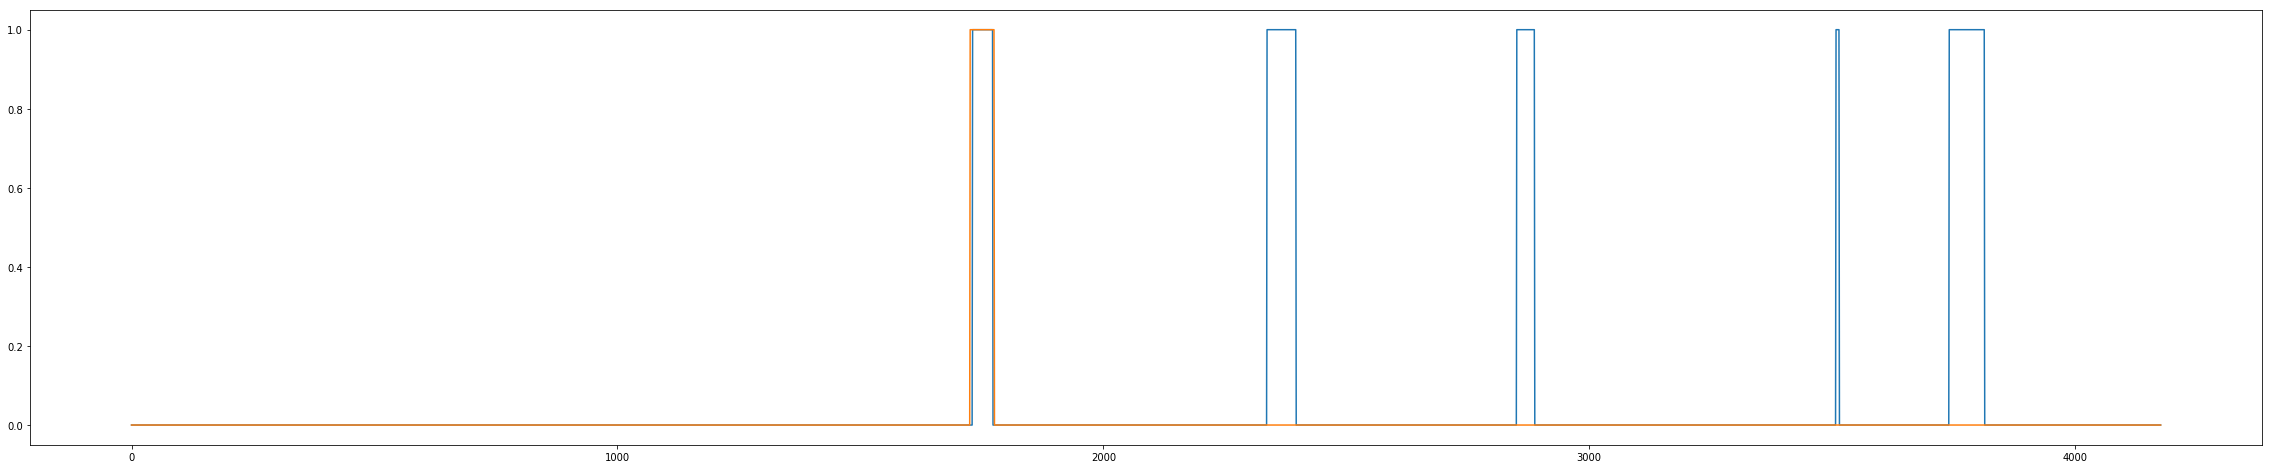

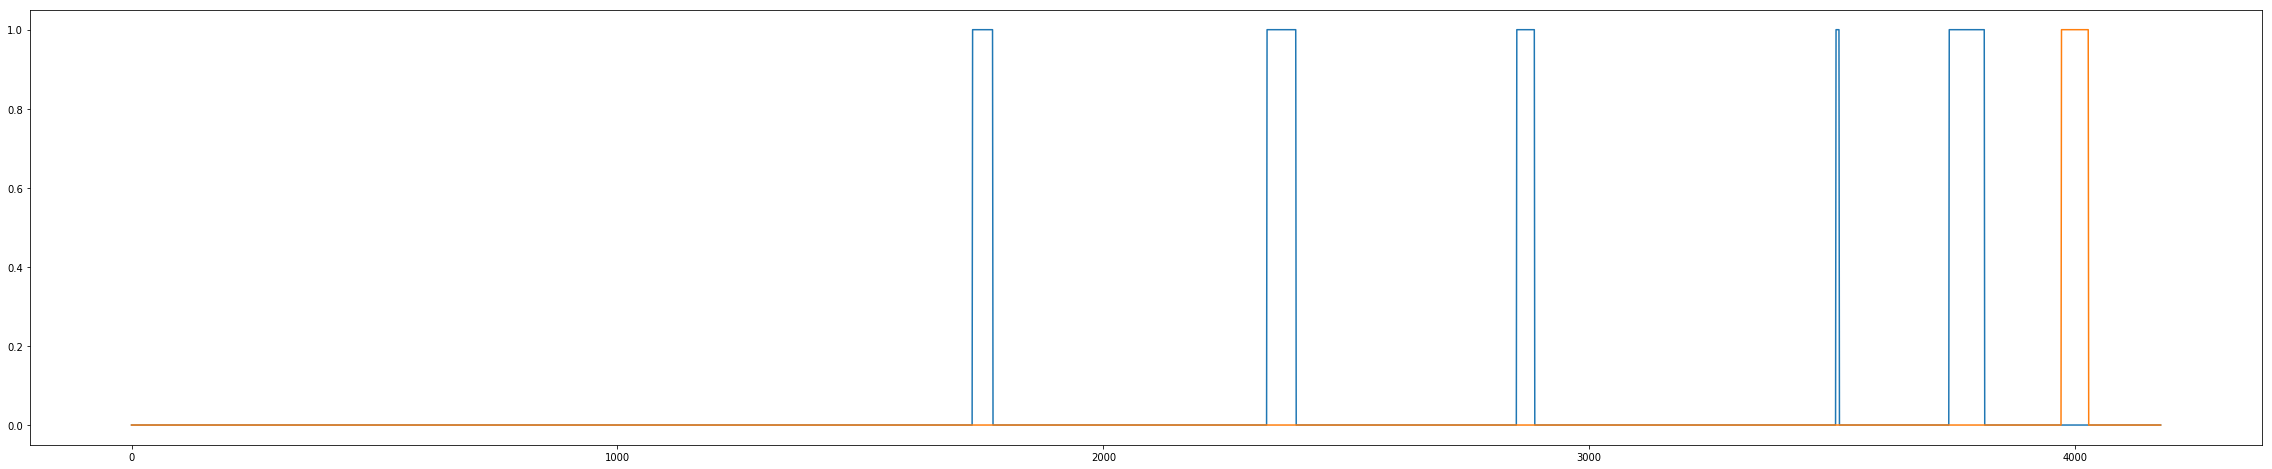

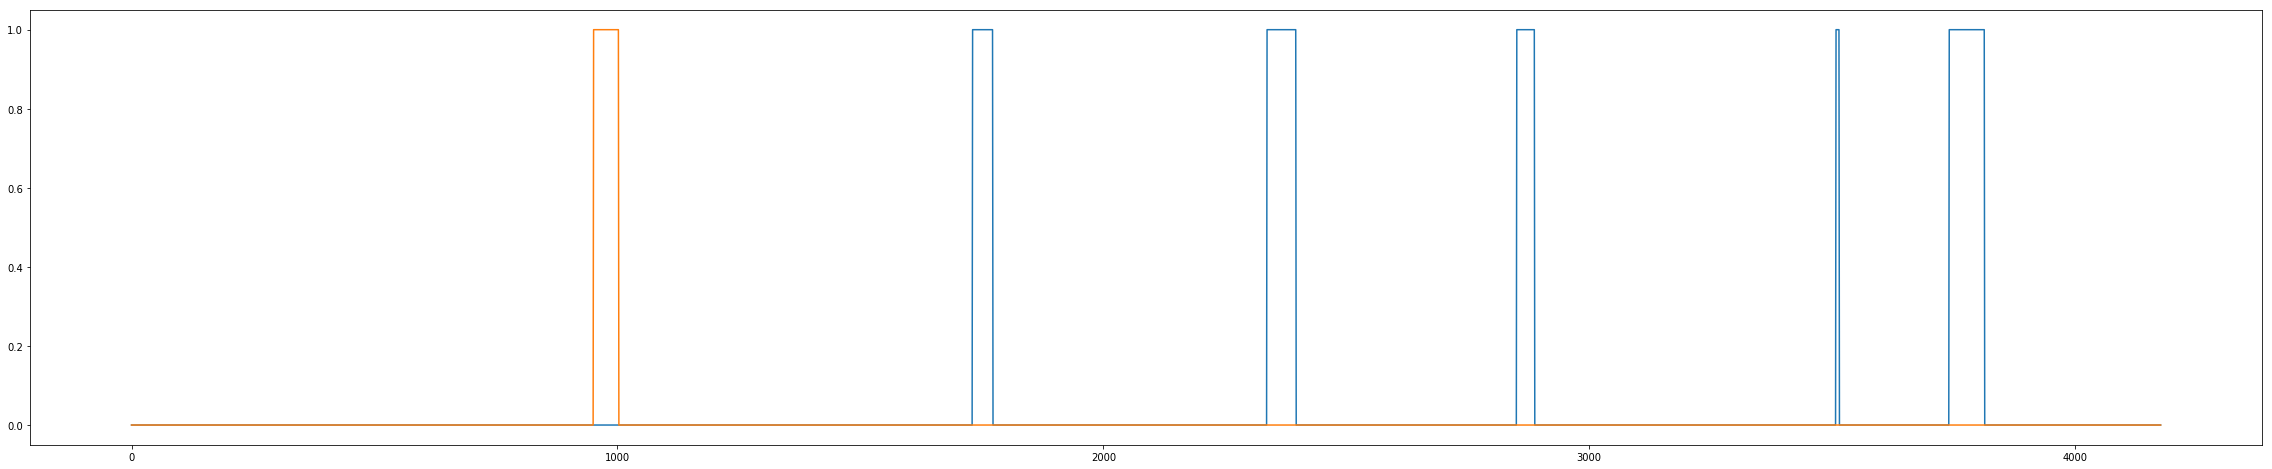

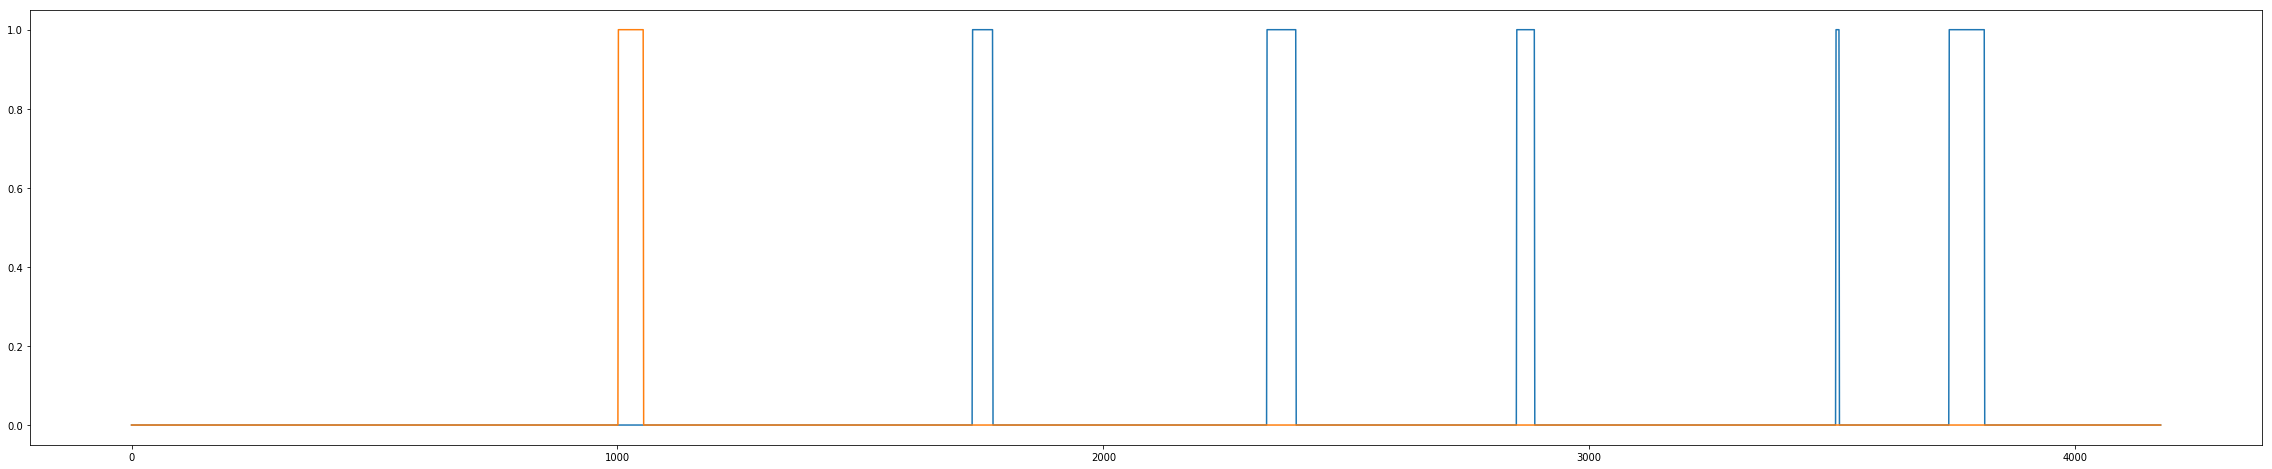

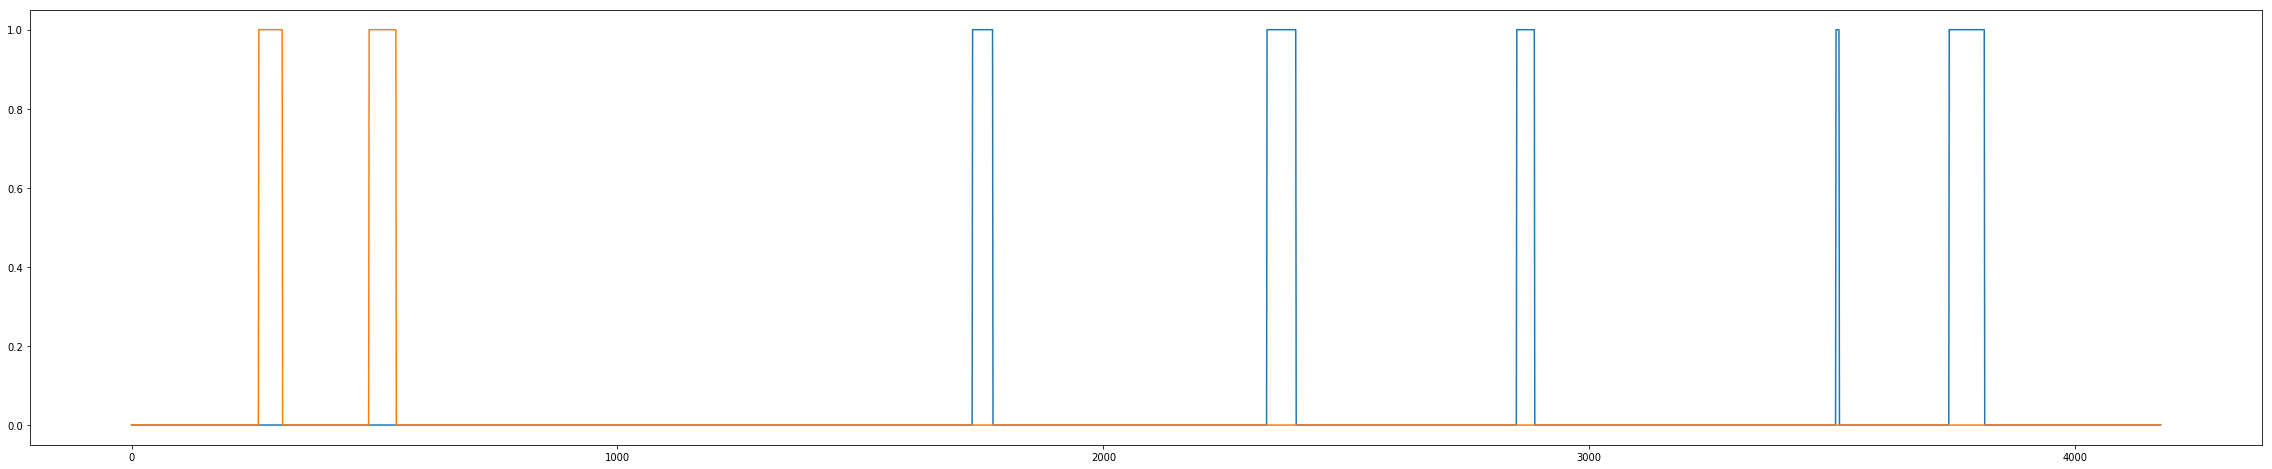

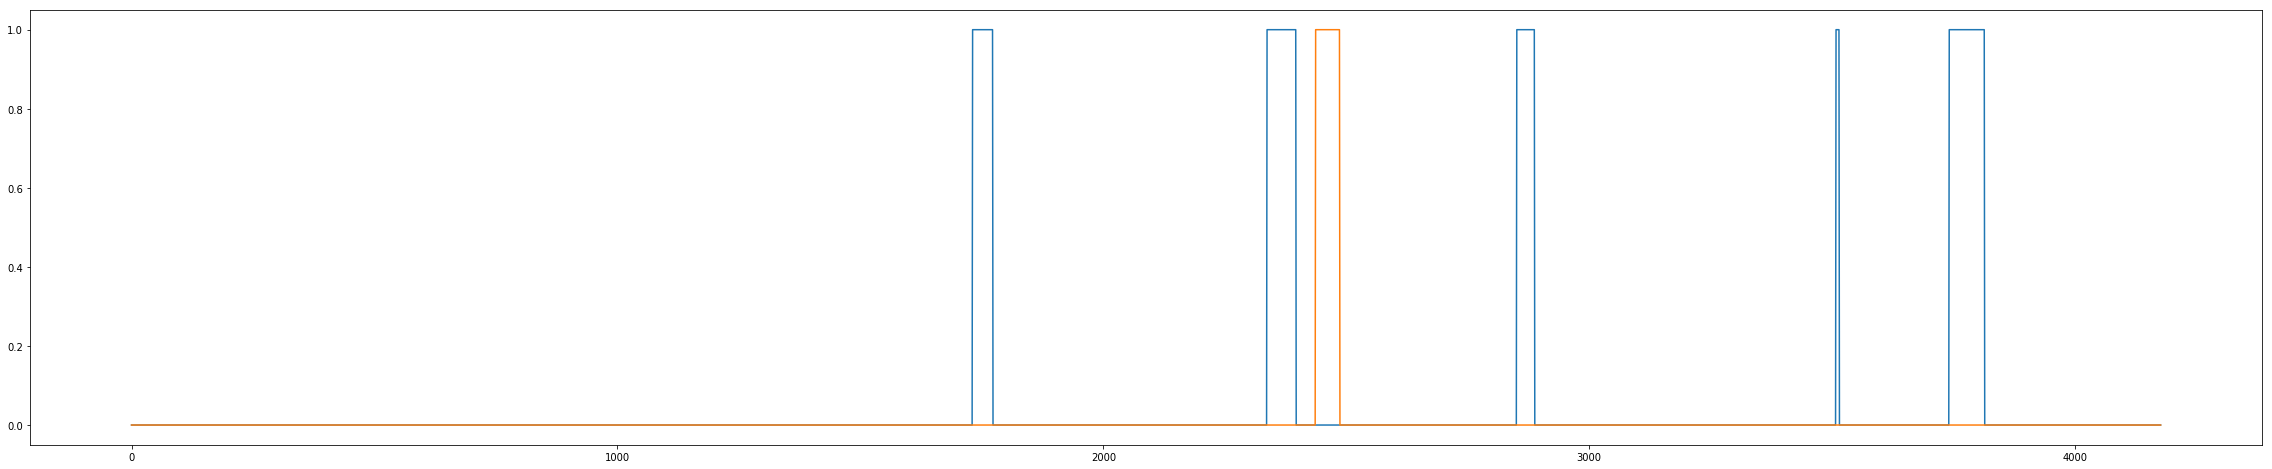

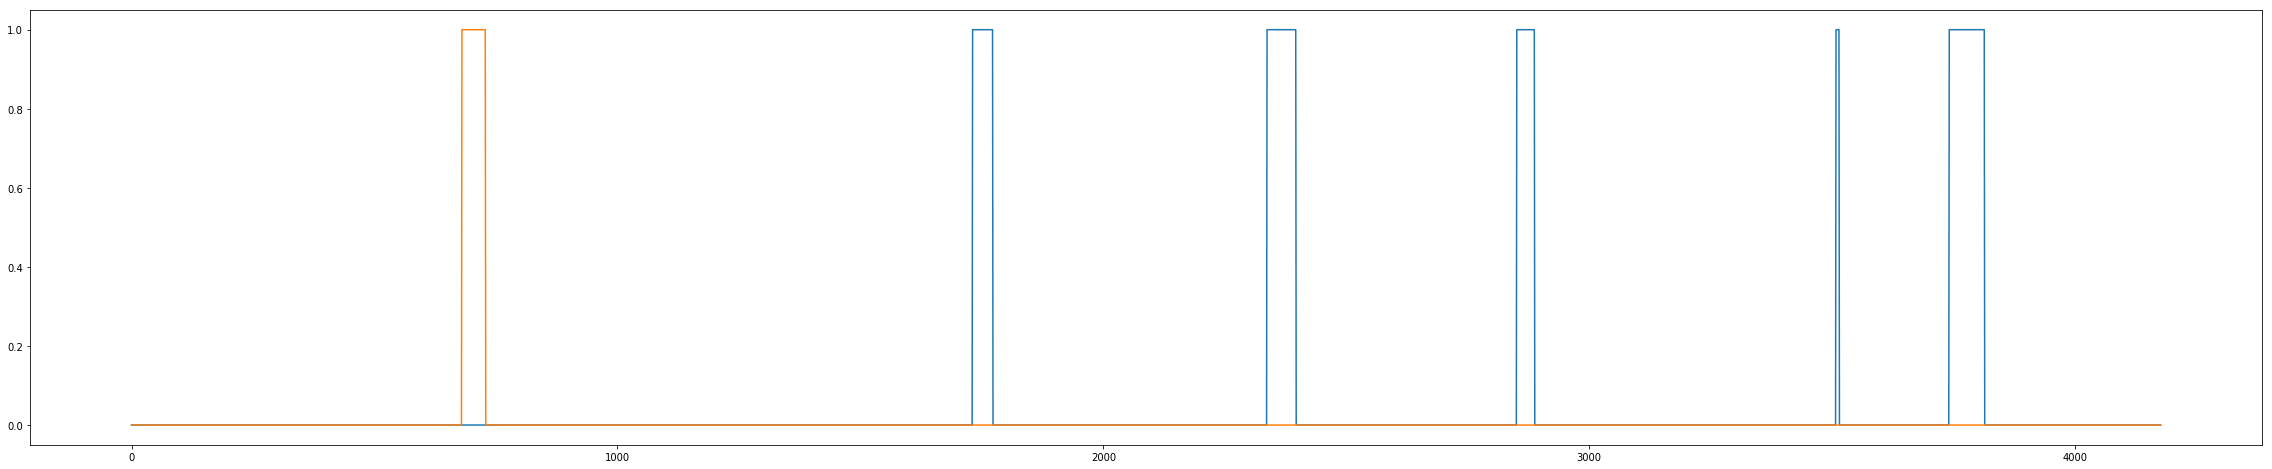

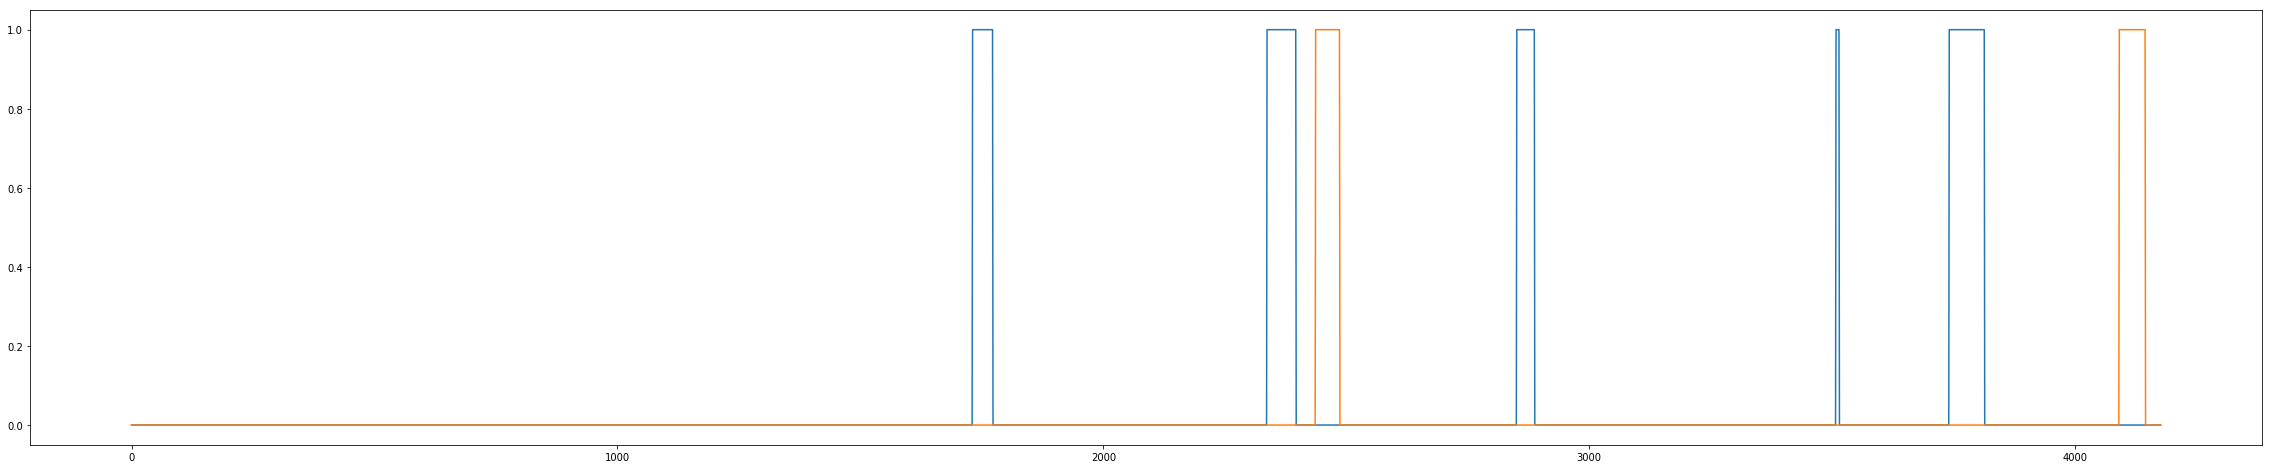

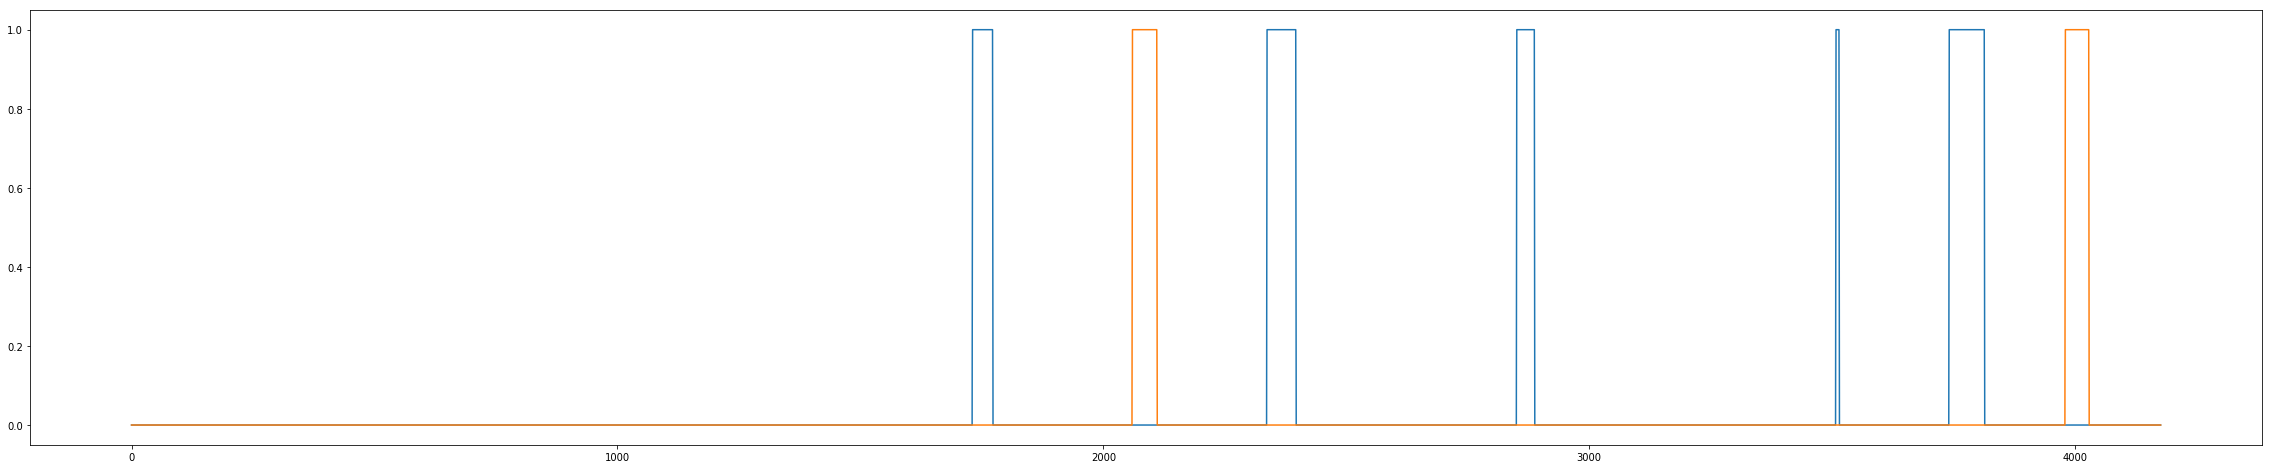

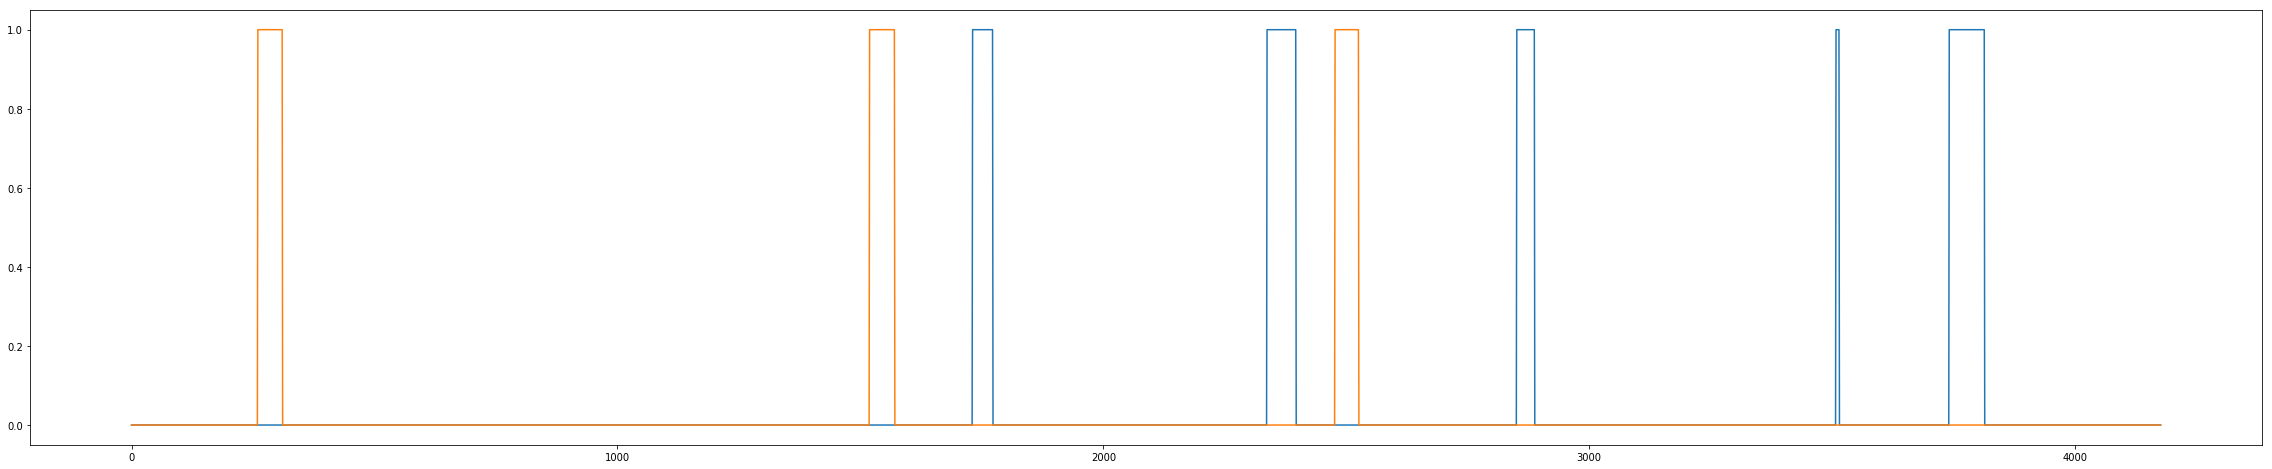

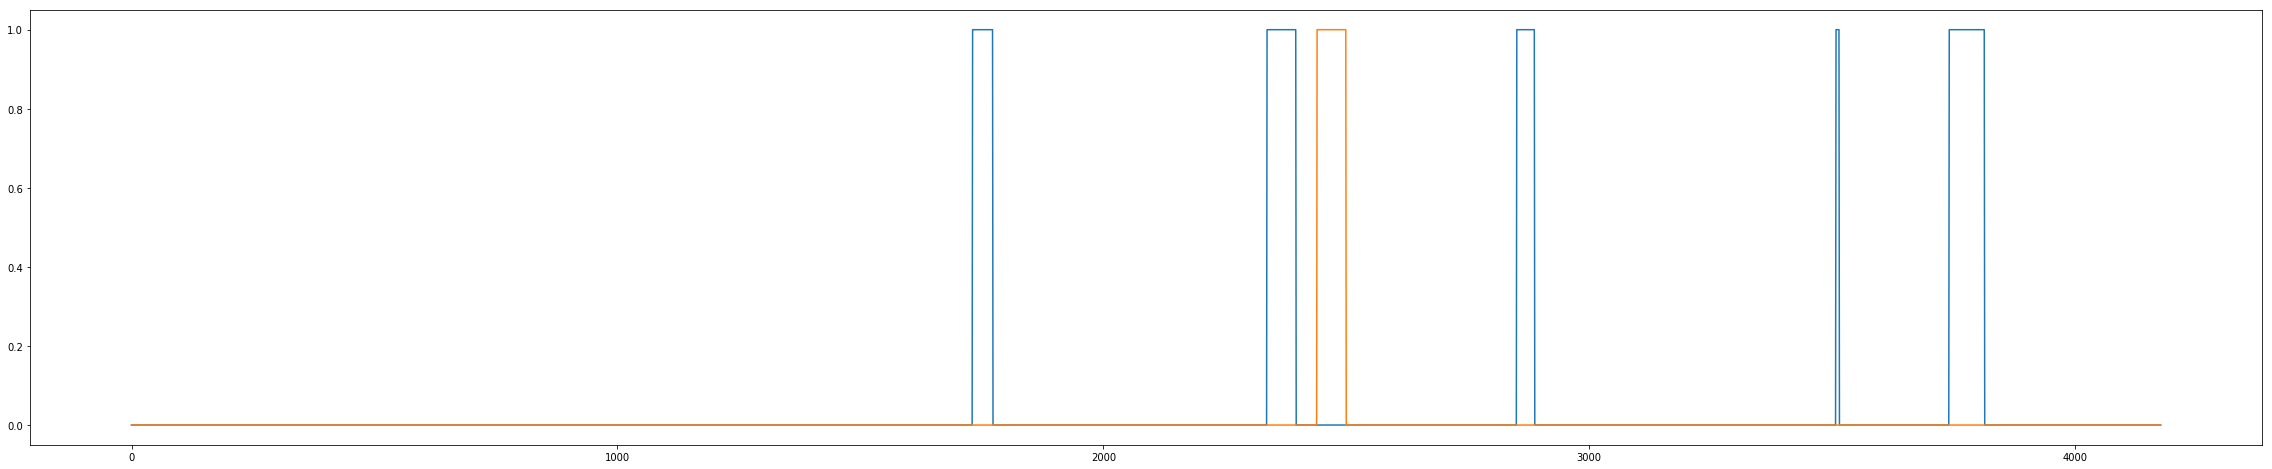

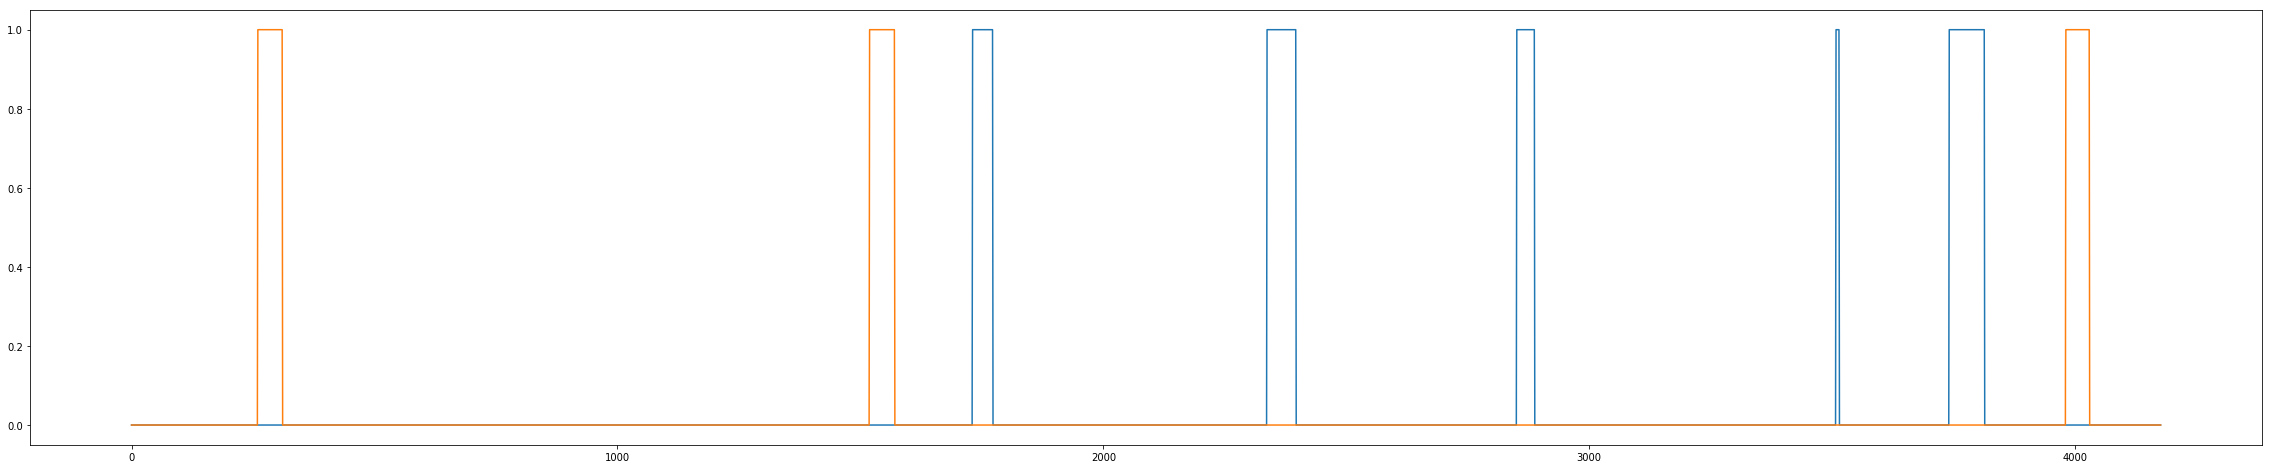

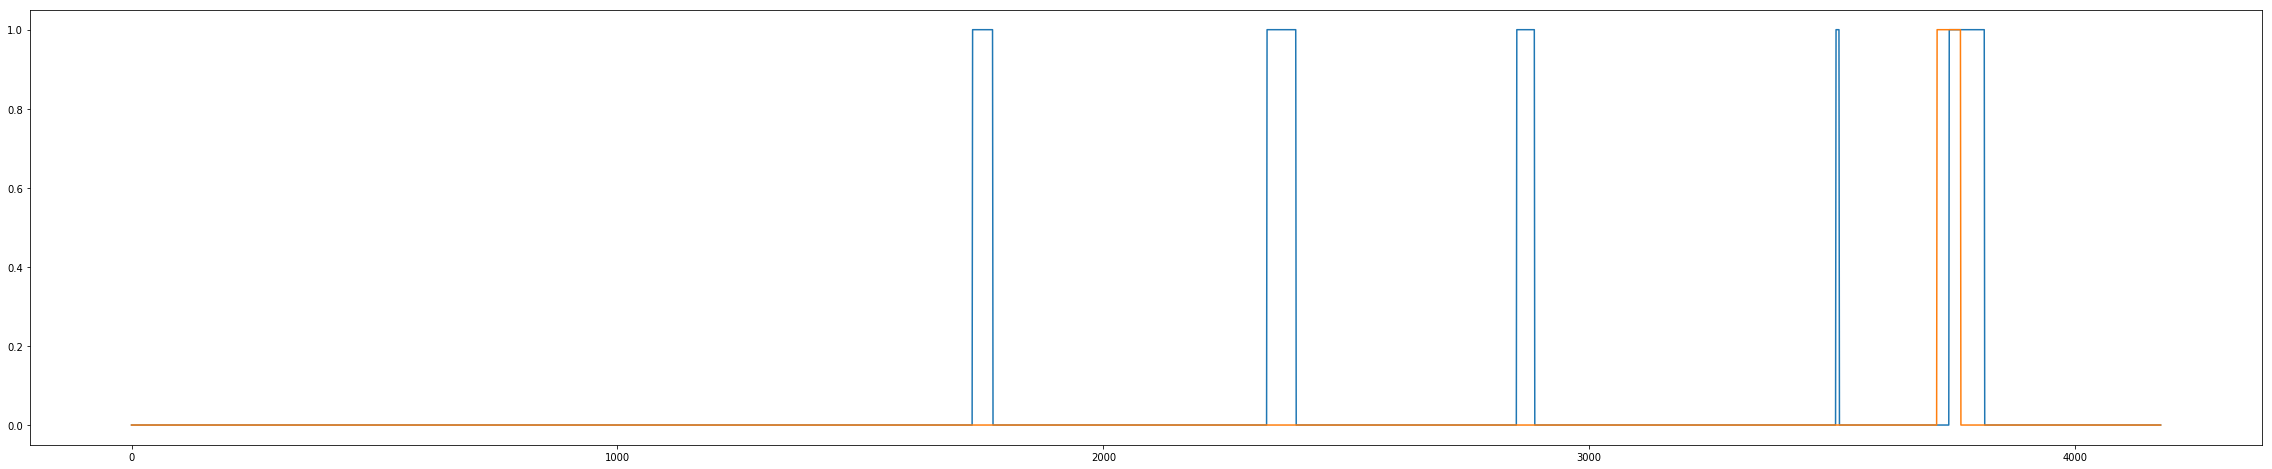

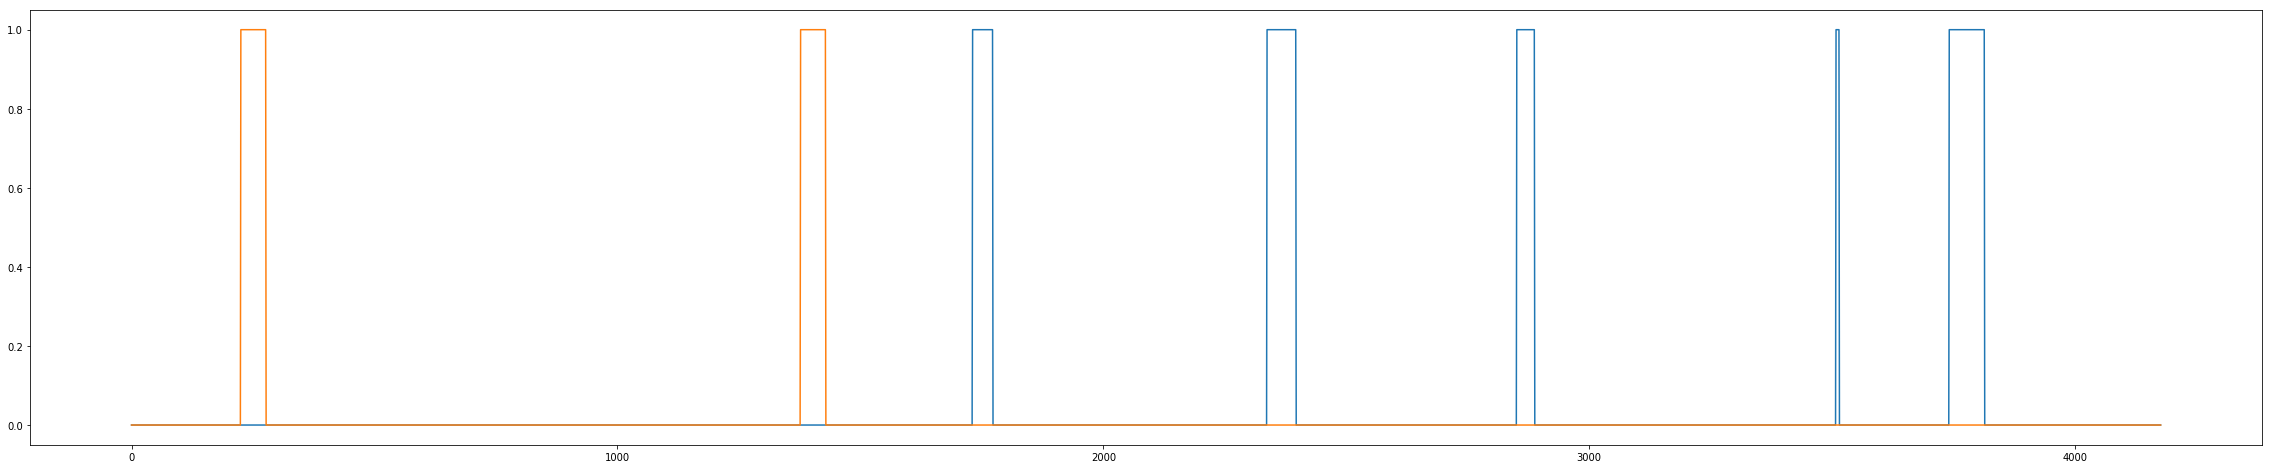

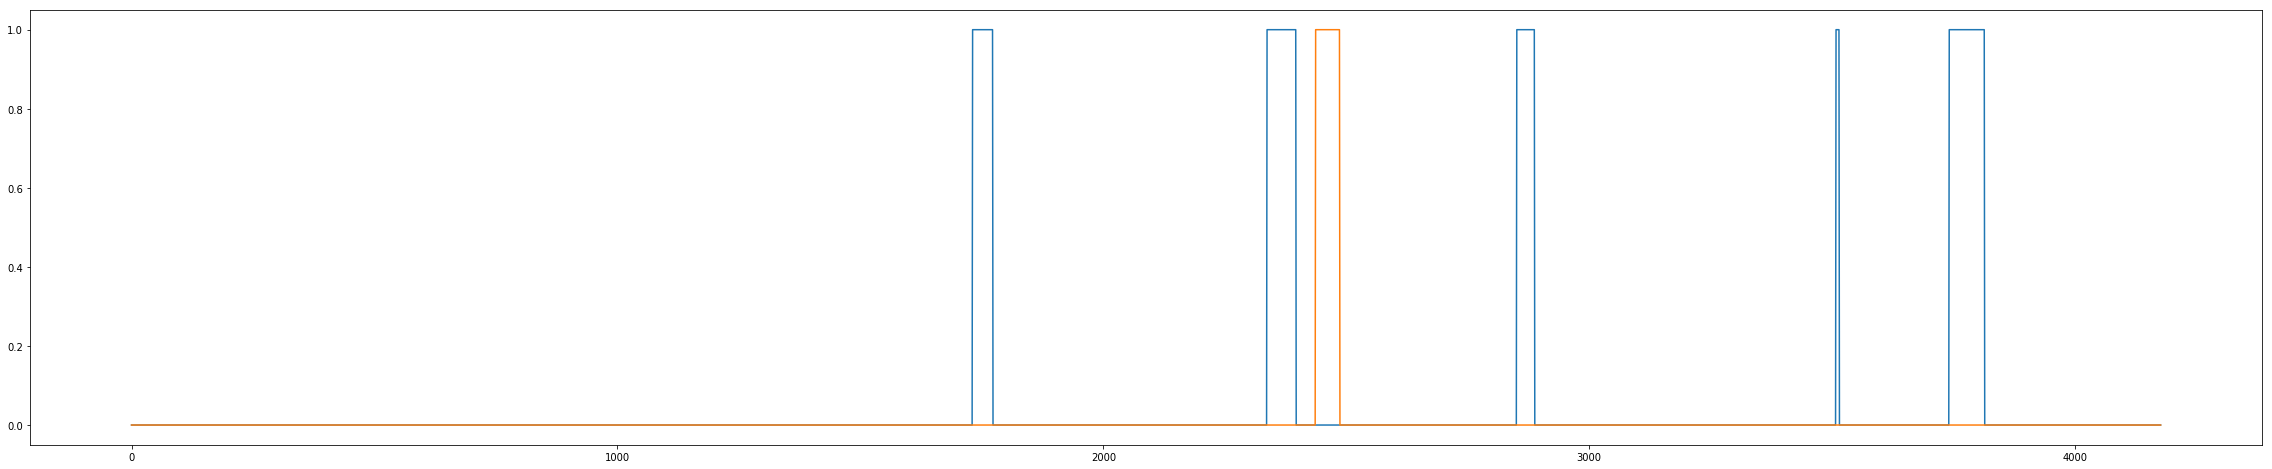

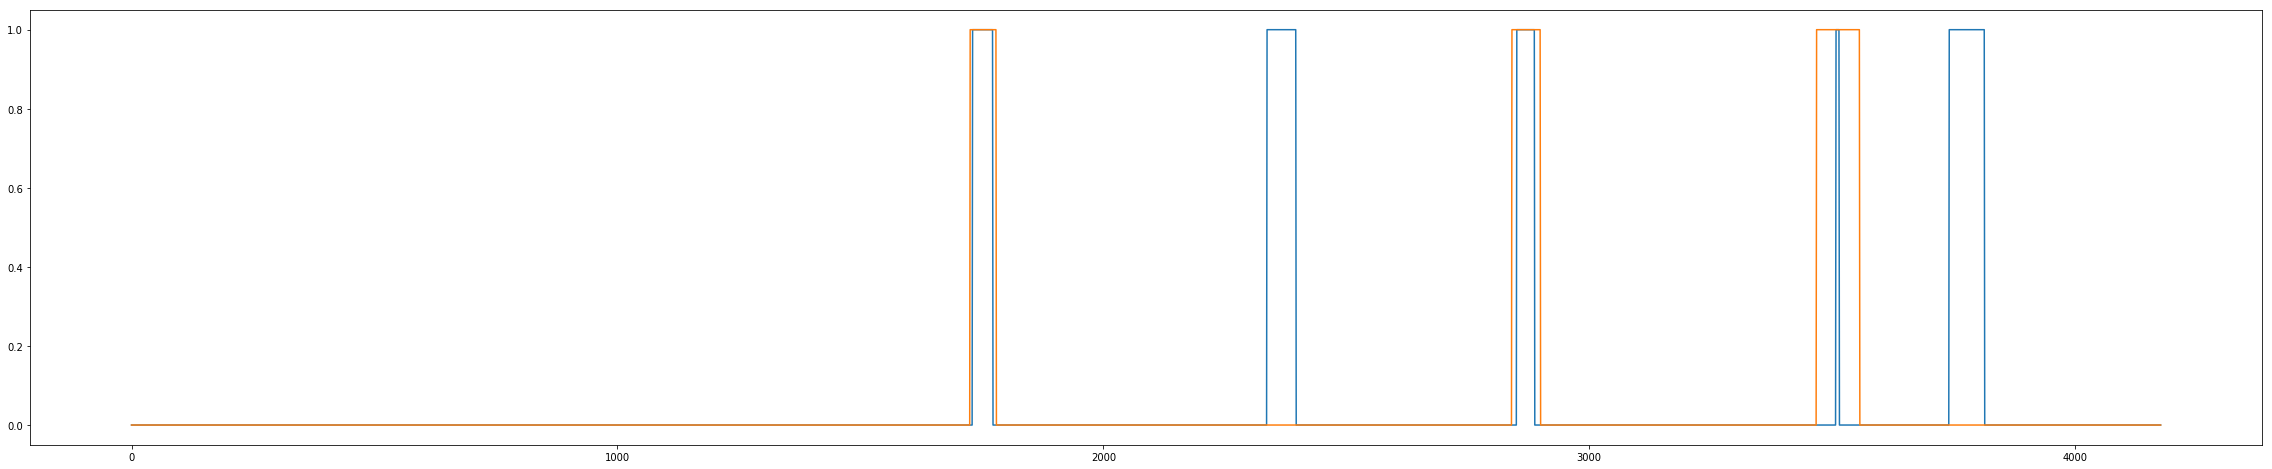

In [9]:
pre=np.zeros(len(data2))
for item in data2: 
    signal=data2[item]
    FP,pre1=dis_eva(signal,label2,2000,50)
    print FP  #use precision to select the sensors
    if FP>=0.6:
        print item
        pre=pre+pre1


[[3860   98]
 [  39  180]]
precision: 0.6474820143884892
recall: 0.821917808219178


0.6474820143884892

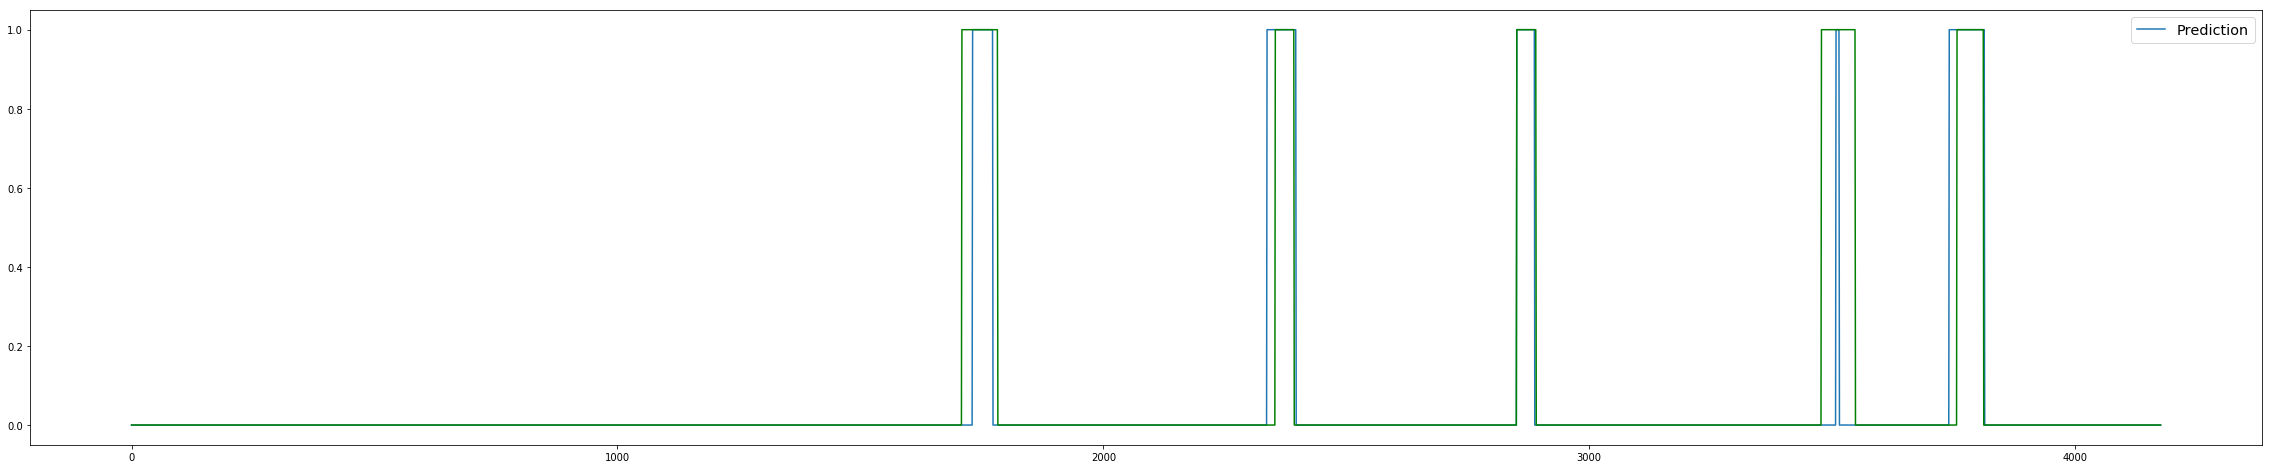

In [45]:
prediction2=(pre!=0)*1
plt.figure(figsize=(40,8))
plt.plot(label2)
plt.plot(prediction2,'g')
plt.legend(['Prediction'],fontsize='x-large')
evaluation(label2,prediction2)

# Convert test label

In [11]:
def parser2(x):
    return pd.datetime.strptime('2017'+x, '%Y%d/%m/%H %M')

data3 = read_csv('./BATADAL_test_dataset.csv', header=0, parse_dates=[0], squeeze=True,\
                  date_parser=parser2)
data3['label']=0

attack_info=['2017-01-16 17:09:00',70],['2017-01-30 17:08:00',65], ['2017-02-09 17:03:00',31],\
            ['2017-02-12 17:01:00',31],['2017-02-24 17:05:00',100],['2017-03-10 17:14:00',80],['2017-03-25 17:20:00',30]
for attack in attack_info:

    start_date = attack[0]
    duration = np.array(attack[1])
    
    a_index=data3[(data3.DATETIME==start_date)].index
    a_index=np.array(a_index)[0]
    
    data3.iloc[range(a_index,a_index+duration),-1]=1
    
test_label=np.array(data3['label'])  #get lables

The transition matrix is formed correctly.
[[1583   99]
 [ 407    0]]
precision: 0.0
recall: 0.0
0.0
The transition matrix is formed correctly.
[[1682    0]
 [ 358   49]]
precision: 1.0
recall: 0.12039312039312039
1.0
L_T2
The transition matrix is formed correctly.
[[1680    2]
 [ 357   50]]
precision: 0.9615384615384616
recall: 0.12285012285012285
0.9615384615384616
L_T3
The transition matrix is formed correctly.
[[1633   49]
 [ 407    0]]
precision: 0.0
recall: 0.0
0.0
The transition matrix is formed correctly.
[[ 616 1066]
 [ 171  236]]
precision: 0.18125960061443933
recall: 0.5798525798525799
0.18125960061443933
The transition matrix is formed correctly.
[[1629   53]
 [ 407    0]]
precision: 0.0
recall: 0.0
0.0
The transition matrix is formed correctly.
[[1633   49]
 [ 407    0]]
precision: 0.0
recall: 0.0
0.0
The transition matrix is formed correctly.
[[1605   77]
 [ 376   31]]
precision: 0.28703703703703703
recall: 0.07616707616707617
0.28703703703703703
The transition matrix is 

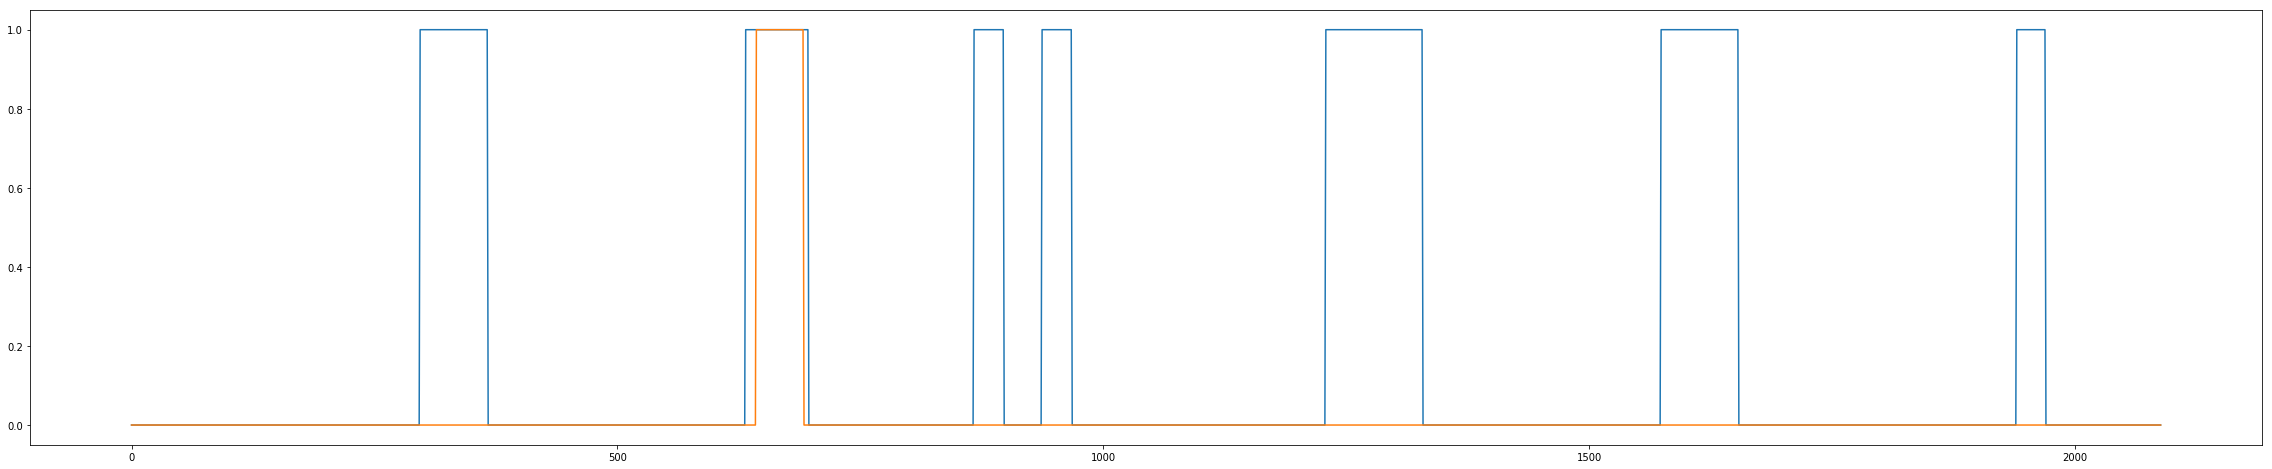

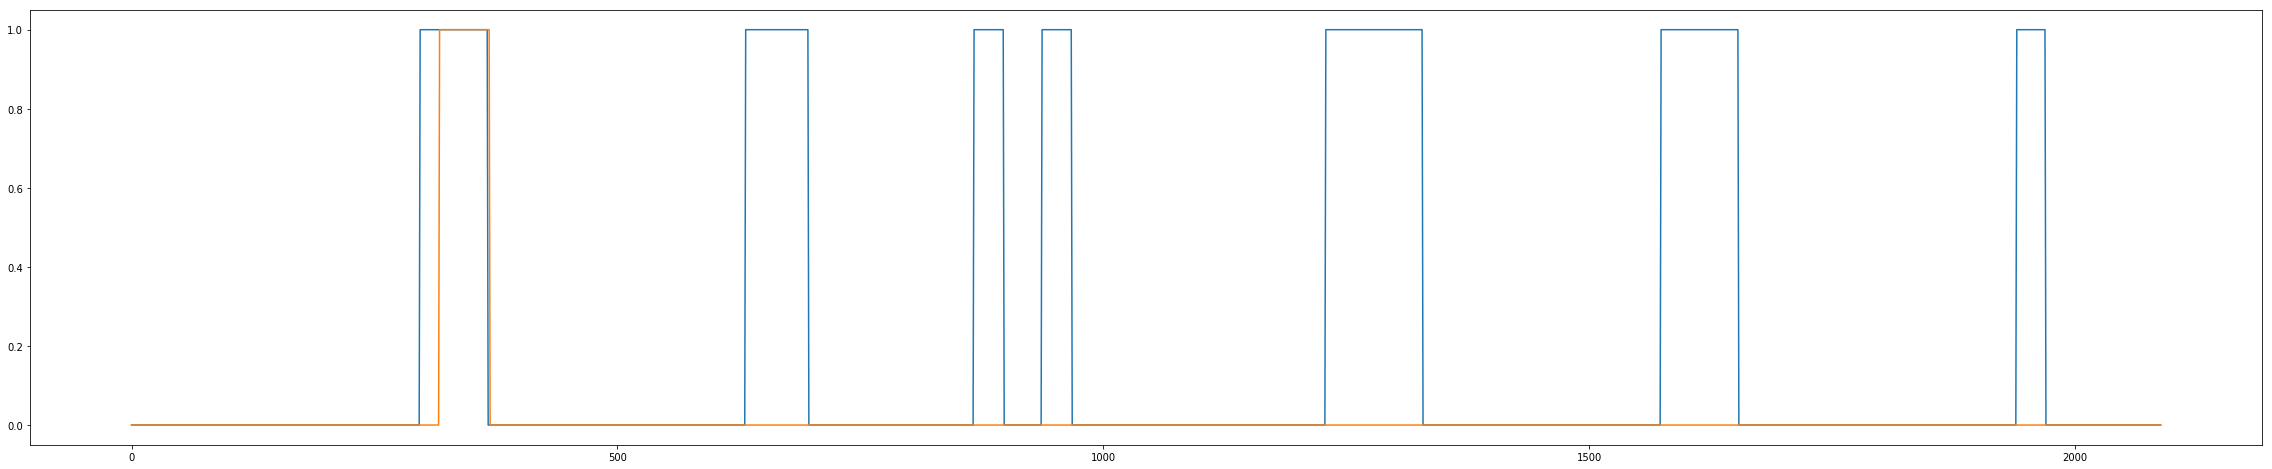

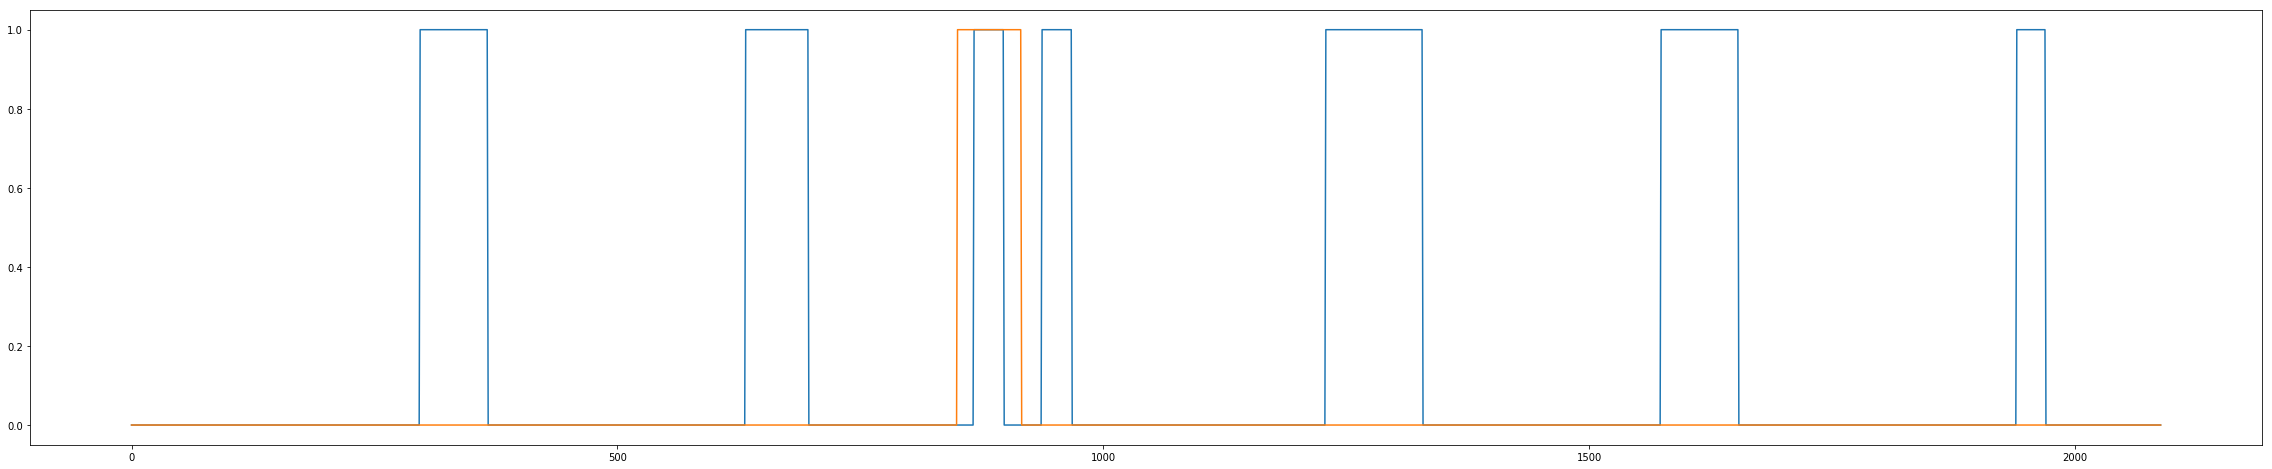

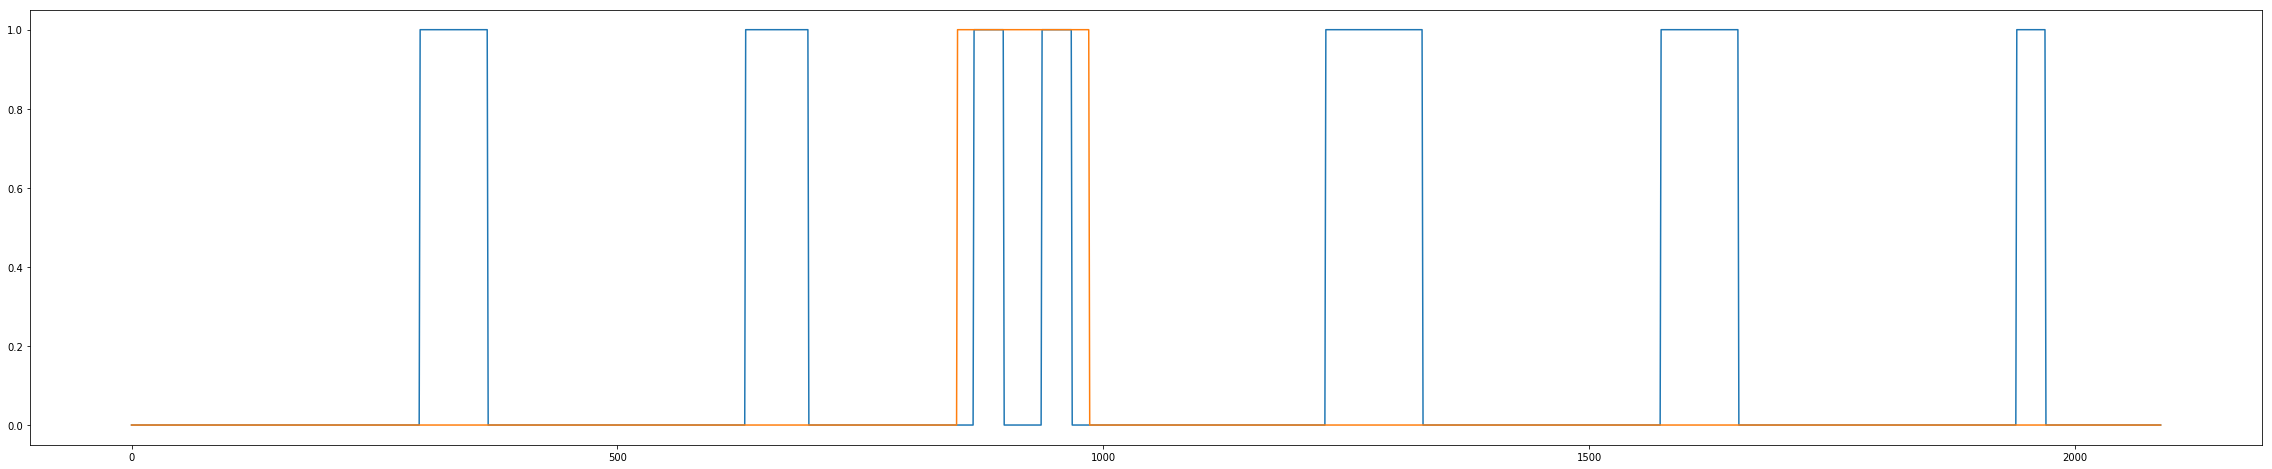

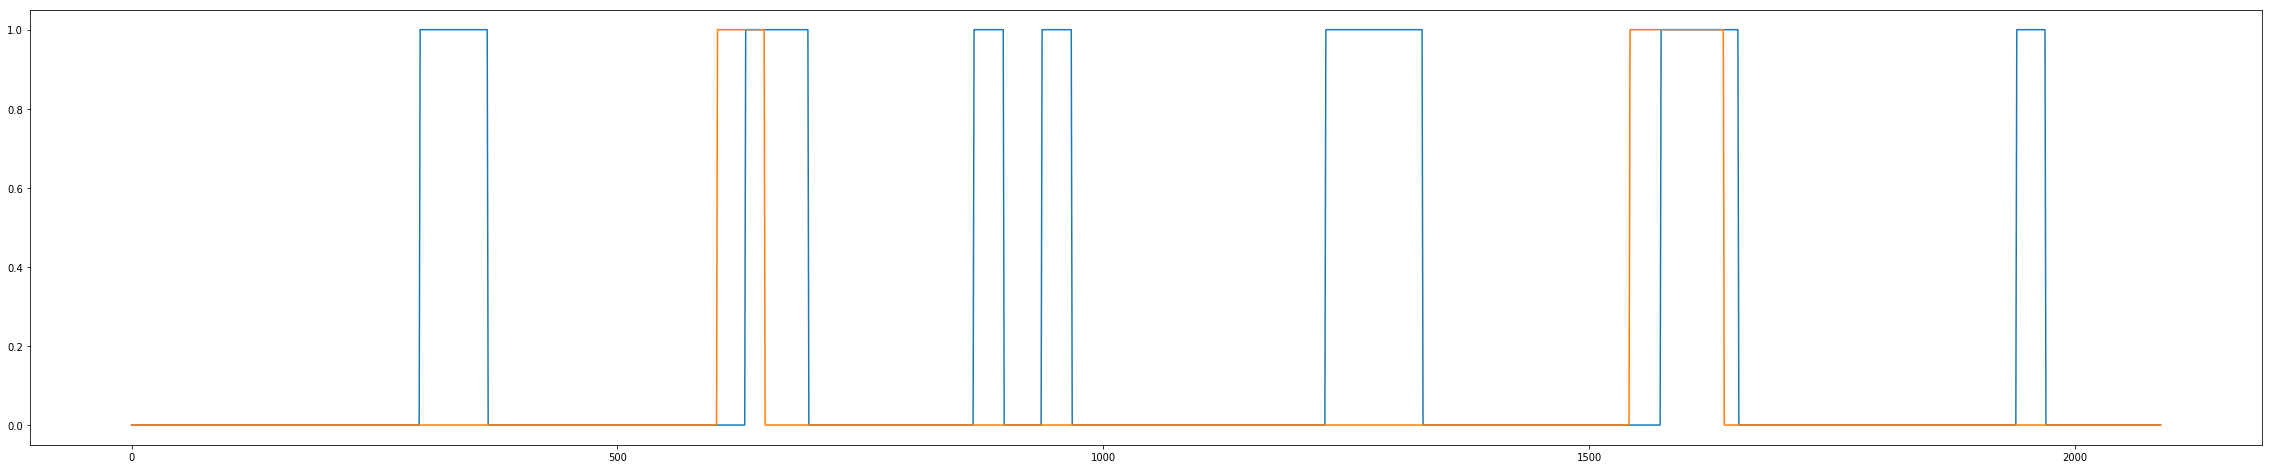

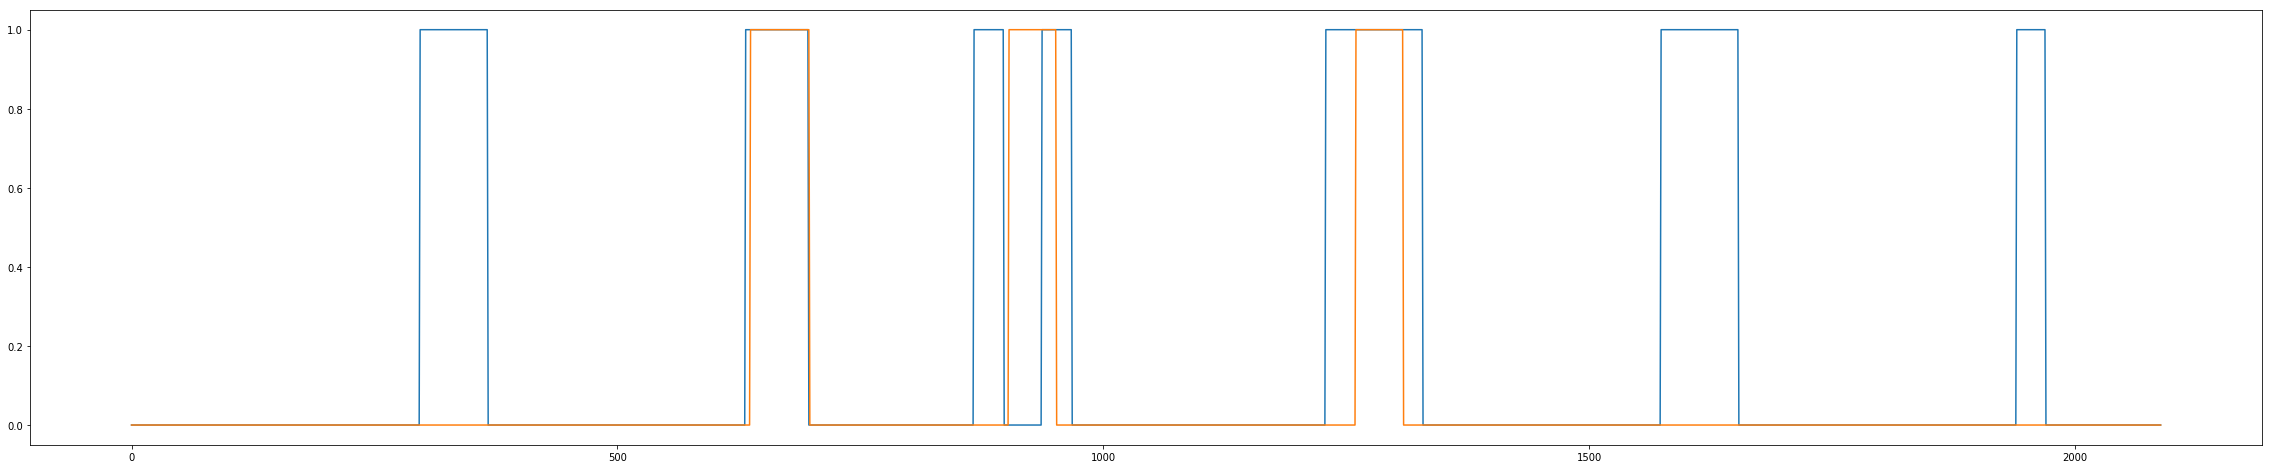

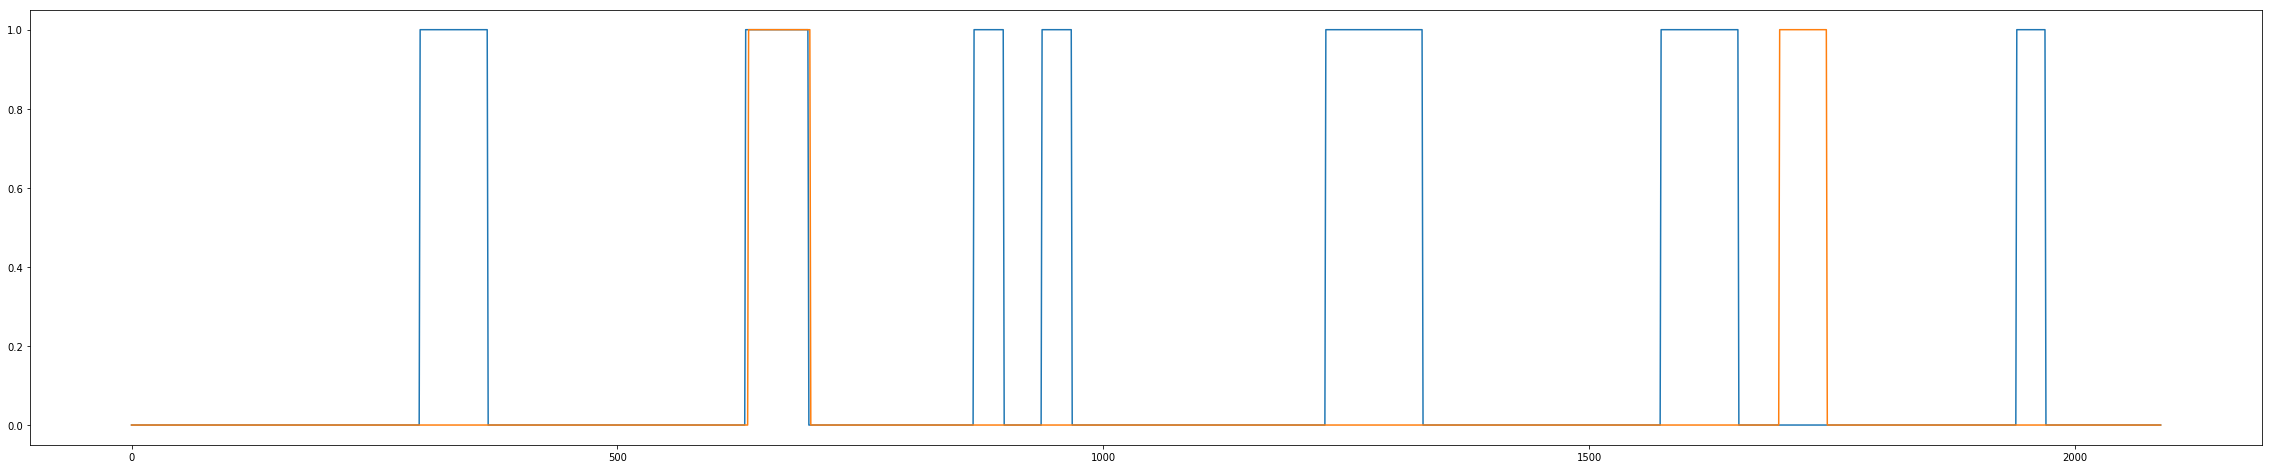

In [46]:
data3 = read_csv('./BATADAL_test_dataset.csv', header=0, parse_dates=[0] ,index_col=[0],squeeze=True,\
                  date_parser=parser)
sax_window_size=len(data2)/2000
n_test_seq=len(data3)/sax_window_size

pre_t=np.zeros(len(data3))

for item in data3: 
    signal=data3[item]
    FP,pre1=dis_eva(signal,test_label,n_test_seq,50) # the n_test_seq is the number of sequence in SAX, 
    #due to the length for data2 and test data is diffierent, the parameter should be diffierent 
    #in order to keep the windowsize (len(data)/n_seq) fix, so the parameter in both training data2
    #and test data are  the same  
    if FP>=0.6:  # consider we would prefer a high precision, we choose a higher precision as selection criterion
        print item
        pre_t=pre_t+pre1

[[1494  188]
 [ 116  291]]
precision: 0.6075156576200418
recall: 0.714987714987715


0.6075156576200418

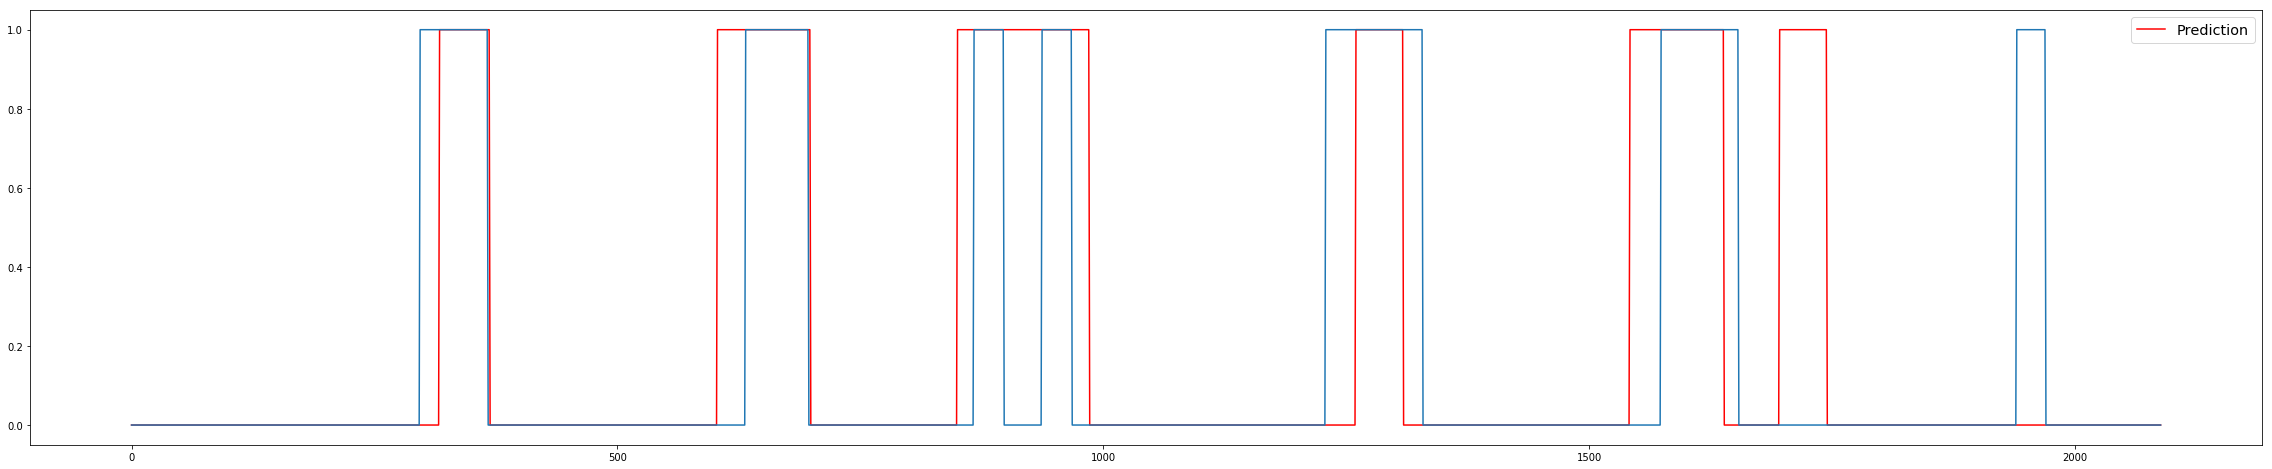

In [58]:
prediction_t=(pre_t!=0)*1
plt.figure(figsize=(40,8))
plt.plot(prediction_t,'r')
plt.plot(test_label)
plt.legend(['Prediction'],fontsize='x-large')
evaluation(test_label,prediction_t)

# PCA analysis

1.Normalization

In [14]:
data = read_csv('./BATADAL_dataset03.csv', header=0, parse_dates=[0] ,index_col=0,squeeze=True,\
                  date_parser=parser)
my_data=data.drop(['ATT_FLAG'],axis=1)
my_data=my_data.dropna(axis=0,how='any')
X_train = my_data.iloc[:, :].values
print my_data.shape
#standardize the training data
def standardize_(X_train):
    for c in range(X_train.shape[1]):
        x_std=X_train[:,c].std()
        x_mean=X_train[:,c].mean()
        scaler=StandardScaler().fit(X_train)
       # X_train[:,c] = (X_train[:,c]-x_mean)/x_std
        if x_std !=0:
            #print x_mean
            X_train[:,c] = (X_train[:,c]-x_mean)

    return X_train
X_train=standardize_(X_train)
sum(X_train[:,0])

(8761, 43)


-2.119637798614349e-12

In [15]:
from sklearn.decomposition import PCA
myModel=PCA(n_components=15)
low_data=myModel.fit_transform(X_train)
print X_train.shape

print 'This model captures {:0.0%} of variance'.format(sum(myModel.explained_variance_ratio_))

(8761, 43)
This model captures 100% of variance


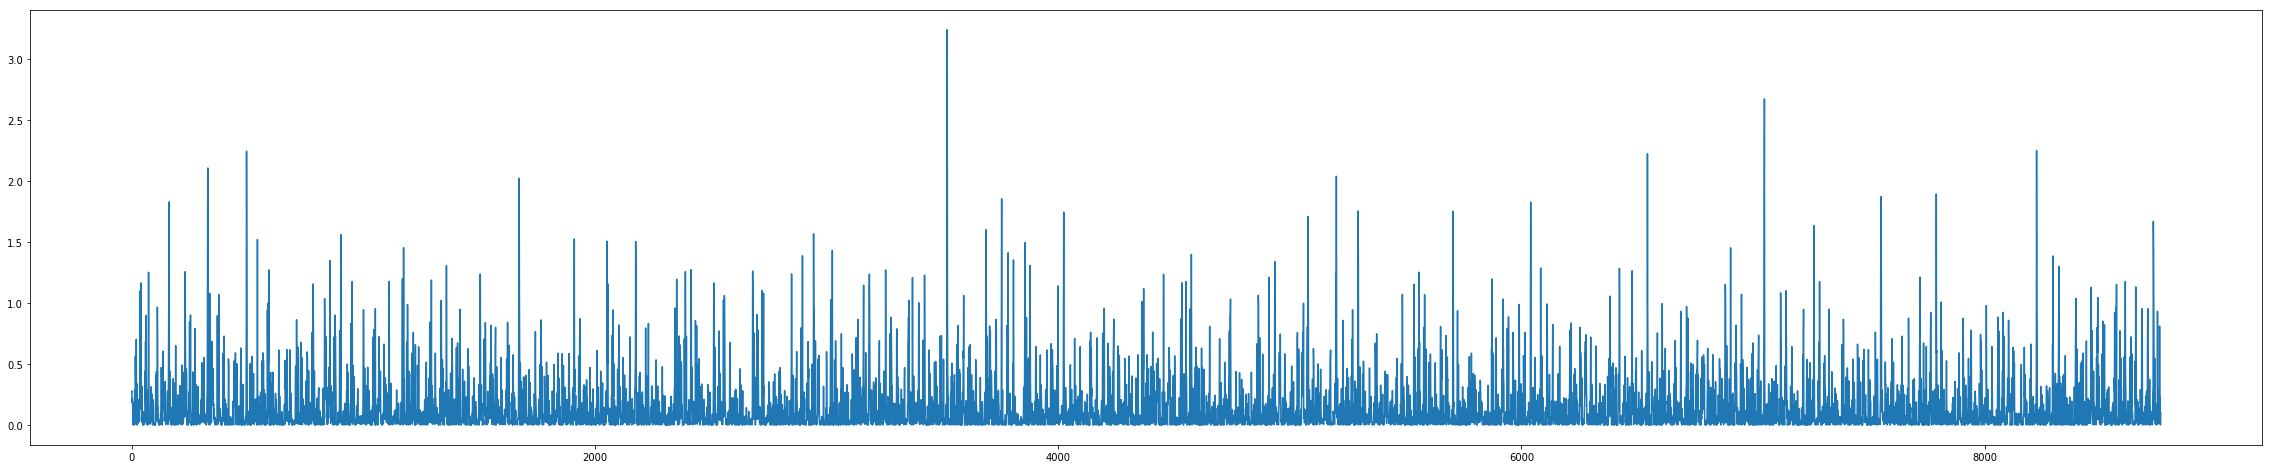

In [16]:
restore_data=myModel.inverse_transform(low_data)
res=np.array(X_train-restore_data)  # compute the residual
signal1=np.square(res[:,2])   # pick one certain signal to visualize the residual

plt.figure(figsize=(40,8))
plt.plot(signal1)


# optimize with dataset 2

In [17]:
data2 = read_csv('./BATADAL_dataset04.csv', header=0, parse_dates=[0], index_col=0, squeeze=True,\
                  date_parser=parser)
label=data2['ATT_FLAG']
label=np.array(label==1)*1
data2=data2.drop(['ATT_FLAG'],axis=1)

my_data2=data2.dropna(axis=0,how='any')
X_val = data2.iloc[:, :].values
#data2.head

In [18]:
def pca(X_val):
    X_val = standardize_(X_val)
    myModel=PCA(n_components=8)
    low_data2=myModel.fit_transform(X_val)
    print X_val.shape

    print 'This model captures {:0.0%} of variance'.format(sum(myModel.explained_variance_ratio_))
    restore_data2 = myModel.inverse_transform(low_data2) #restore data from pca
    res2 = np.array(X_val-restore_data2)  # compute the residual
    residual2 = np.sum(np.square(res2),axis=1)  #compute overall residuals
    plt.figure(figsize=(40,8))
    plt.plot(residual2)
    plt.savefig('residuals_on_val.jpg')
    evecs=myModel.components_  
    
    return residual2,evecs

(4177, 43)
This model captures 99% of variance


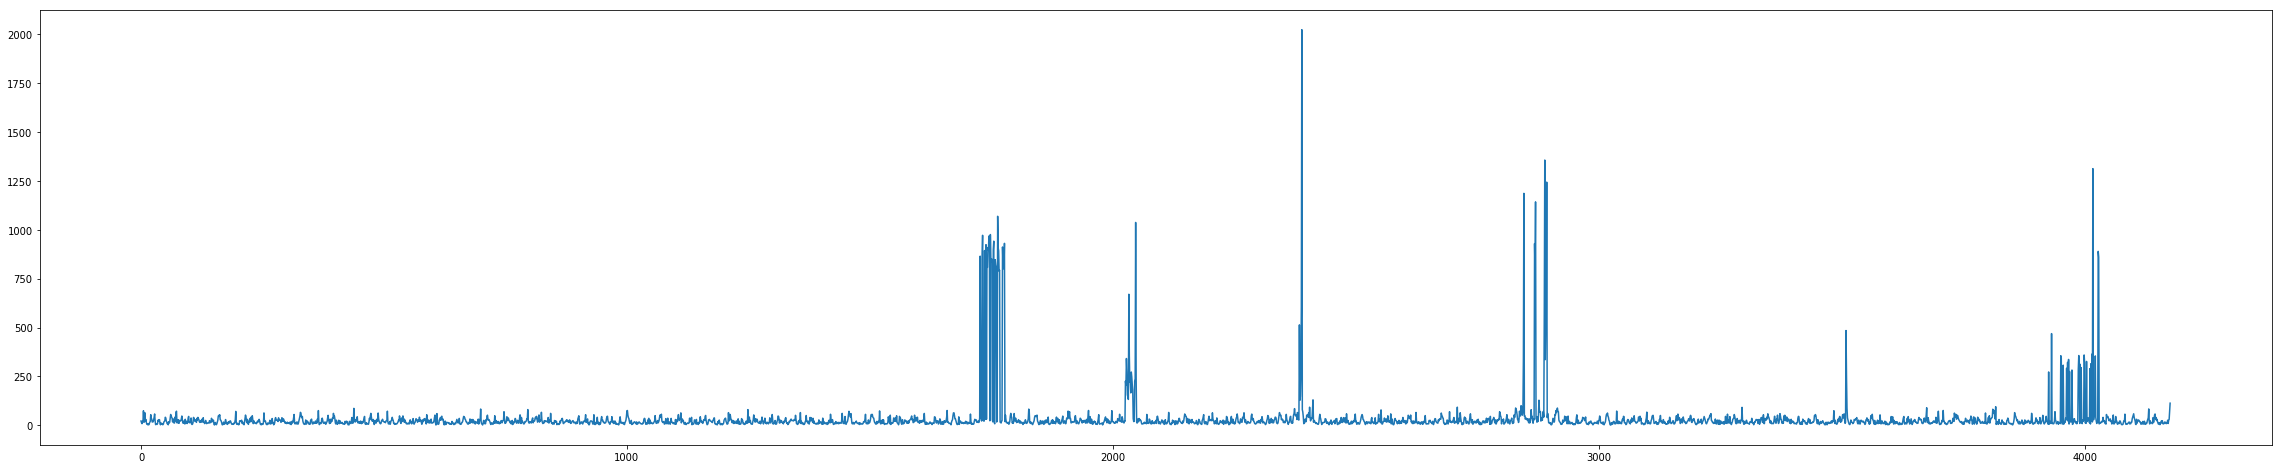

In [19]:
residual2,evecs2=pca(X_val)

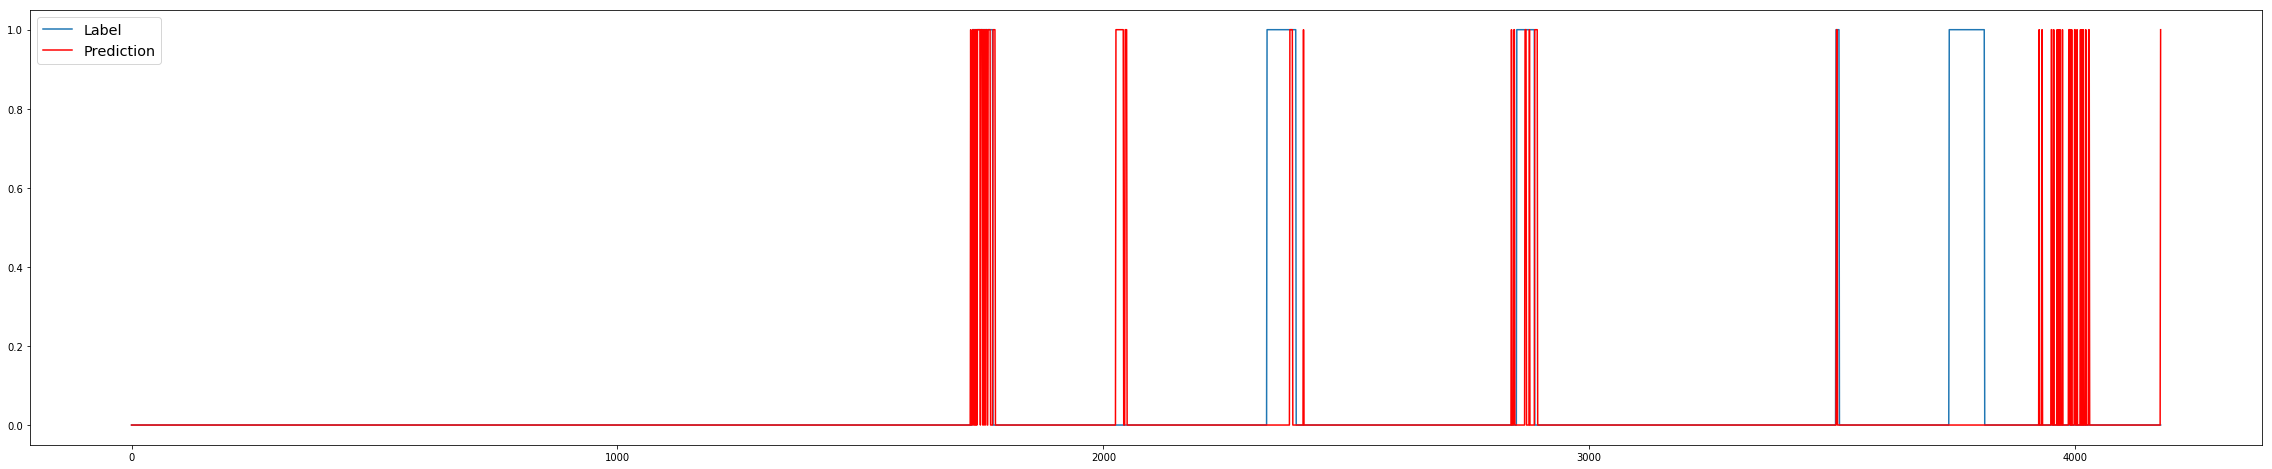

In [20]:
prediction=(residual2>100)*1
plt.figure(figsize=(40,8))
plt.plot(label)
plt.plot(prediction,'r')
plt.legend(['Label','Prediction'],fontsize='x-large')
plt.savefig('prediction_result.jpg')

#visulize the labels

#plt.figure(figsize=(40,8))


In [21]:
#  true negatives  false positives
#  false negatives  true positives
cm=confusion_matrix(label.astype(int),prediction)

#recall = cm[1][1]/(cm[0][1]+cm[1][1])
evaluation(label,prediction)

[[3896   62]
 [ 183   36]]
precision: 0.3673469387755102
recall: 0.3673469387755102


'0.3673469387755102'

In [22]:
#remove the unusual points to model normal behavior
print len(my_data2),len(prediction)
my_data2['residuals']=residual2

4177 4177


In [23]:
index=np.where(prediction==0)
index
X_val3 = X_val[index,:]
X_val3[0].shape

(4079, 43)

(4079, 43)
This model captures 100% of variance


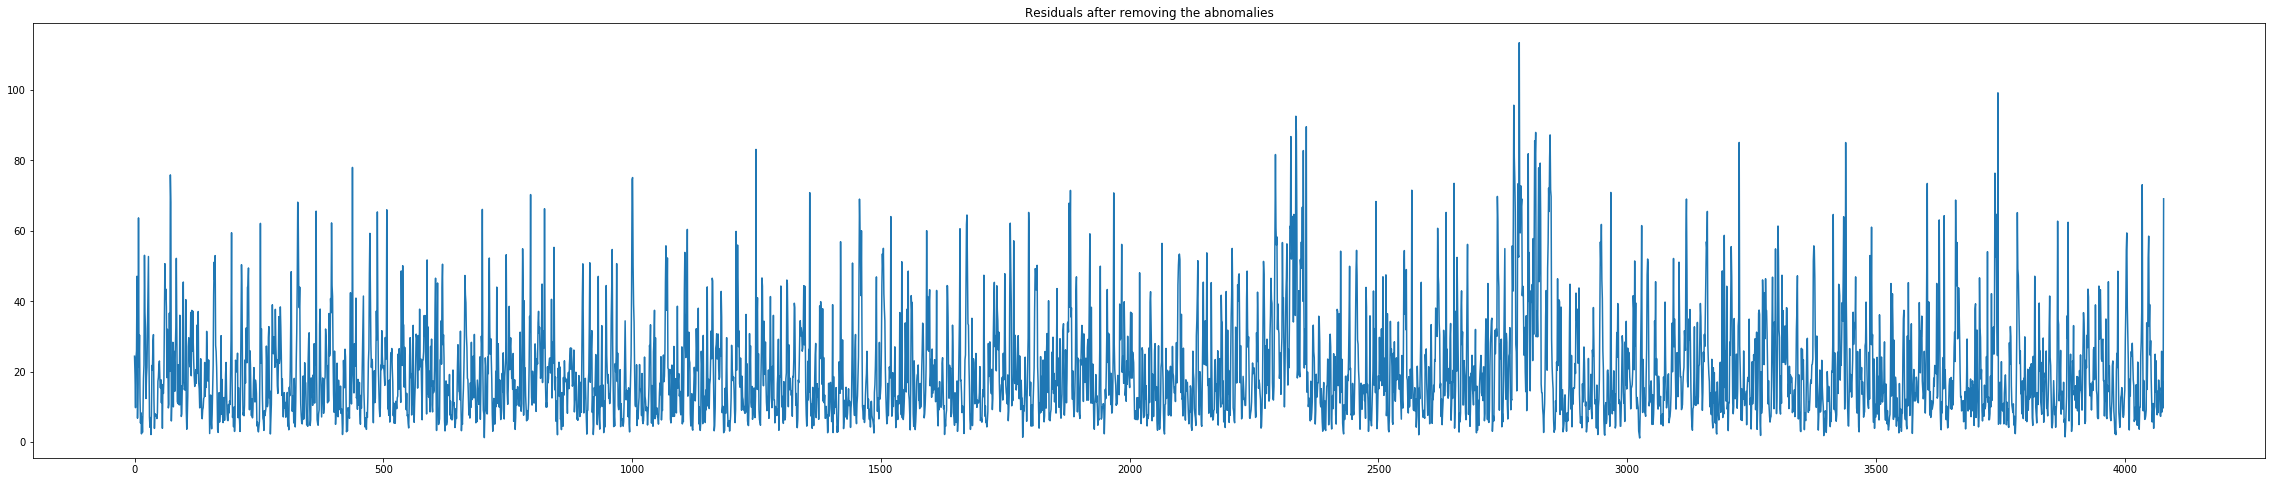

In [24]:
residual3,evecs3=pca(X_val3[0]) #get the eigen vectors
plt.title('Residuals after removing the abnomalies')
plt.savefig('residuals_after_removing.jpg')

# test on dataset_test

In [25]:
data3 = read_csv('./BATADAL_test_dataset.csv', header=0, parse_dates=[0], index_col=0, squeeze=True,\
                  date_parser=parser)
my_data3=data3.dropna(axis=0,how='any')
X_test = my_data3.iloc[:, :].values

In [26]:
X_test=standardize_(X_test)

(2089, 8)
(2089, 43)


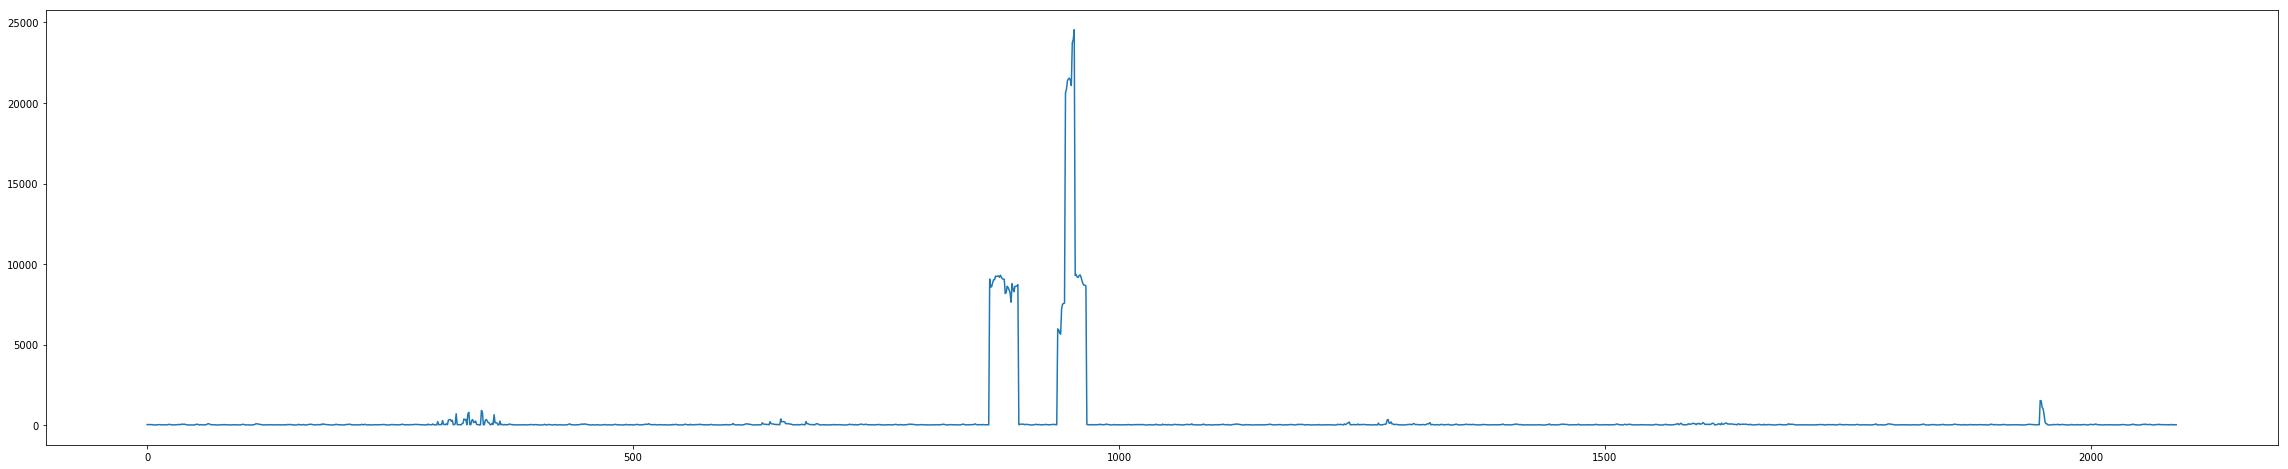

In [27]:
#use the eigen vectors obtained previously (evecs3) to reconstruct the data and compute residuals
low_test=np.dot(X_test,evecs3.T)
print low_test.shape
reconstruct=np.dot(low_test, evecs3)
print reconstruct.shape
residual_test=X_test-reconstruct
residuals2 = np.sum(np.square(residual_test),axis=1)
plt.figure(figsize=(40,8))
plt.plot(residuals2)
plt.savefig('test_res.png')

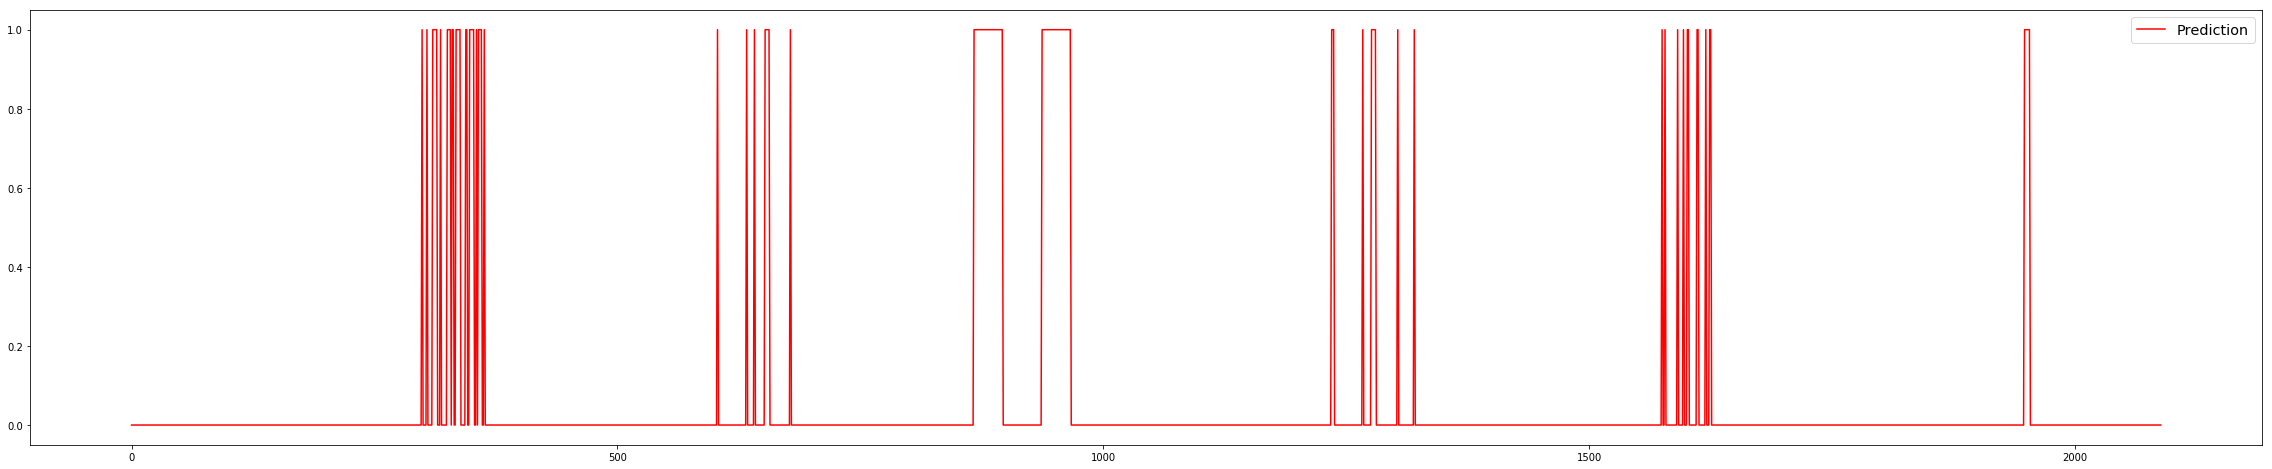

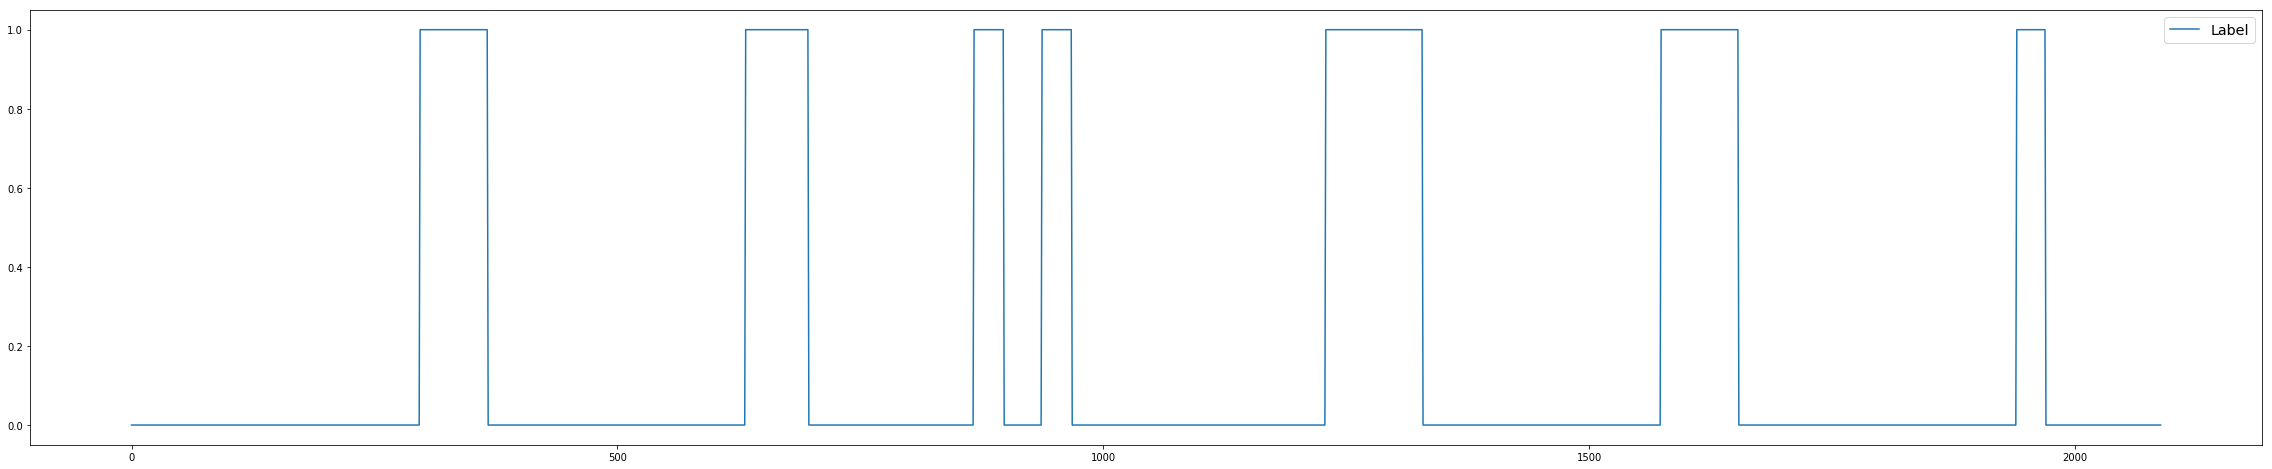

In [28]:
# plot the decision result
prediction_test=(residuals2>100)*1
plt.figure(figsize=(40,8))
plt.plot(prediction_test,'r')
plt.legend(['Prediction'],fontsize='x-large')
plt.savefig('test_prediction')
plt.figure(2)
plt.figure(figsize=(40,8))
plt.plot(test_label)
plt.legend(['Label'],fontsize='x-large')


In [29]:
evaluation(test_label,prediction_test)

[[1681    1]
 [ 279  128]]
precision: 0.9922480620155039
recall: 0.9922480620155039


'0.9922480620155039'